In [35]:
import datetime
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Input, Activation, Conv2D, Flatten, Dense, MaxPooling2D
from keras.models import Model, load_model
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
plt.style.use('dark_background')

# Load Dataset

In [36]:
x_train = np.load('dataset/x_train.npy').astype(np.float32)
y_train = np.load('dataset/y_train.npy').astype(np.float32)
x_val = np.load('dataset/x_val.npy').astype(np.float32)
y_val = np.load('dataset/y_val.npy').astype(np.float32)

print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

(480, 26, 34, 1) (480, 1)
(120, 26, 34, 1) (120, 1)


# Preview

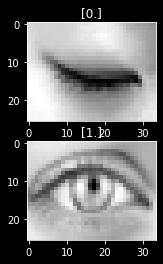

In [37]:
plt.subplot(2, 1, 1)
plt.title(str(y_train[0]))
plt.imshow(x_train[0].reshape((26, 34)), cmap='gray')
plt.subplot(2, 1, 2)
plt.title(str(y_val[4]))
plt.imshow(x_val[4].reshape((26, 34)), cmap='gray')

# Data Augmentation

In [38]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow(
    x=x_train, y=y_train,
    batch_size=32,
    shuffle=True
)

val_generator = val_datagen.flow(
    x=x_val, y=y_val,
    batch_size=32,
    shuffle=False
)

# Build Model

In [39]:
inputs = Input(shape=(26, 34, 1))

net = Conv2D(32, kernel_size=3, strides=1, padding='same', activation='relu')(inputs)
net = MaxPooling2D(pool_size=2)(net)

net = Conv2D(64, kernel_size=3, strides=1, padding='same', activation='relu')(net)
net = MaxPooling2D(pool_size=2)(net)

net = Conv2D(128, kernel_size=3, strides=1, padding='same', activation='relu')(net)
net = MaxPooling2D(pool_size=2)(net)

net = Flatten()(net)

net = Dense(512)(net)
net = Activation('relu')(net)
net = Dense(1)(net)
outputs = Activation('sigmoid')(net)

model = Model(inputs=inputs, outputs=outputs)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 26, 34, 1)]       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 26, 34, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 17, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 13, 17, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 6, 8, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 6, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 3, 4, 128)         0   

# Train

In [53]:
start_time = datetime.datetime.now().strftime('%Y_%m_%d_%H_%M_%S')

history=model.fit_generator(
    train_generator, epochs=10000, validation_data=val_generator,
    callbacks=[
        ModelCheckpoint('models/%s.h5' % (start_time), monitor='val_acc', save_best_only=True, mode='max', verbose=1),
        ReduceLROnPlateau(monitor='val_acc', factor=0.2, patience=10, verbose=1, mode='auto', min_lr=1e-05)
    ]
)

Epoch 1/10000
15/15 [==============================] - 1s 50ms/step - loss: 0.0146 - acc: 0.9937 - val_loss: 0.0102 - val_acc: 0.9917

Epoch 00001: val_acc improved from -inf to 0.99167, saving model to models\2021_12_20_09_35_44.h5
Epoch 2/10000
15/15 [==============================] - 1s 51ms/step - loss: 0.0069 - acc: 0.9979 - val_loss: 0.0104 - val_acc: 0.9917

Epoch 00002: val_acc did not improve from 0.99167
Epoch 3/10000
15/15 [==============================] - 1s 49ms/step - loss: 0.0099 - acc: 0.9979 - val_loss: 0.0102 - val_acc: 0.9917

Epoch 00003: val_acc did not improve from 0.99167
Epoch 4/10000
15/15 [==============================] - 1s 51ms/step - loss: 0.0066 - acc: 1.0000 - val_loss: 0.0100 - val_acc: 1.0000

Epoch 00004: val_acc improved from 0.99167 to 1.00000, saving model to models\2021_12_20_09_35_44.h5
Epoch 5/10000
15/15 [==============================] - 1s 48ms/step - loss: 0.0099 - acc: 0.9937 - val_loss: 0.0100 - val_acc: 1.0000

Epoch 00005: val_acc did n


Epoch 00044: val_acc did not improve from 1.00000
Epoch 45/10000
15/15 [==============================] - 1s 49ms/step - loss: 0.0075 - acc: 1.0000 - val_loss: 0.0099 - val_acc: 0.9917

Epoch 00045: val_acc did not improve from 1.00000
Epoch 46/10000
15/15 [==============================] - 1s 49ms/step - loss: 0.0045 - acc: 1.0000 - val_loss: 0.0098 - val_acc: 0.9917

Epoch 00046: val_acc did not improve from 1.00000
Epoch 47/10000
15/15 [==============================] - 1s 48ms/step - loss: 0.0103 - acc: 0.9979 - val_loss: 0.0098 - val_acc: 0.9917

Epoch 00047: val_acc did not improve from 1.00000
Epoch 48/10000
15/15 [==============================] - 1s 49ms/step - loss: 0.0081 - acc: 1.0000 - val_loss: 0.0097 - val_acc: 0.9917

Epoch 00048: val_acc did not improve from 1.00000
Epoch 49/10000
15/15 [==============================] - 1s 48ms/step - loss: 0.0111 - acc: 0.9958 - val_loss: 0.0092 - val_acc: 1.0000

Epoch 00049: val_acc did not improve from 1.00000
Epoch 50/10000
15/1

15/15 [==============================] - 1s 48ms/step - loss: 0.0055 - acc: 0.9979 - val_loss: 0.0079 - val_acc: 1.0000

Epoch 00089: val_acc did not improve from 1.00000
Epoch 90/10000
15/15 [==============================] - 1s 48ms/step - loss: 0.0044 - acc: 1.0000 - val_loss: 0.0079 - val_acc: 1.0000

Epoch 00090: val_acc did not improve from 1.00000
Epoch 91/10000
15/15 [==============================] - 1s 55ms/step - loss: 0.0056 - acc: 1.0000 - val_loss: 0.0080 - val_acc: 1.0000

Epoch 00091: val_acc did not improve from 1.00000
Epoch 92/10000
15/15 [==============================] - 1s 59ms/step - loss: 0.0080 - acc: 0.9958 - val_loss: 0.0082 - val_acc: 1.0000

Epoch 00092: val_acc did not improve from 1.00000
Epoch 93/10000
15/15 [==============================] - 1s 51ms/step - loss: 0.0055 - acc: 0.9979 - val_loss: 0.0081 - val_acc: 1.0000

Epoch 00093: val_acc did not improve from 1.00000
Epoch 94/10000
15/15 [==============================] - 1s 52ms/step - loss: 0.0081 -

15/15 [==============================] - 1s 48ms/step - loss: 0.0062 - acc: 0.9979 - val_loss: 0.0084 - val_acc: 1.0000

Epoch 00133: val_acc did not improve from 1.00000
Epoch 134/10000
15/15 [==============================] - 1s 47ms/step - loss: 0.0114 - acc: 0.9958 - val_loss: 0.0078 - val_acc: 1.0000

Epoch 00134: val_acc did not improve from 1.00000
Epoch 135/10000
15/15 [==============================] - 1s 49ms/step - loss: 0.0064 - acc: 0.9979 - val_loss: 0.0076 - val_acc: 1.0000

Epoch 00135: val_acc did not improve from 1.00000
Epoch 136/10000
15/15 [==============================] - 1s 47ms/step - loss: 0.0083 - acc: 0.9979 - val_loss: 0.0076 - val_acc: 1.0000

Epoch 00136: val_acc did not improve from 1.00000
Epoch 137/10000
15/15 [==============================] - 1s 48ms/step - loss: 0.0065 - acc: 0.9979 - val_loss: 0.0078 - val_acc: 1.0000

Epoch 00137: val_acc did not improve from 1.00000
Epoch 138/10000
15/15 [==============================] - 1s 48ms/step - loss: 0.0

15/15 [==============================] - 1s 53ms/step - loss: 0.0026 - acc: 1.0000 - val_loss: 0.0082 - val_acc: 1.0000

Epoch 00177: val_acc did not improve from 1.00000
Epoch 178/10000
15/15 [==============================] - 1s 47ms/step - loss: 0.0052 - acc: 1.0000 - val_loss: 0.0085 - val_acc: 0.9917

Epoch 00178: val_acc did not improve from 1.00000
Epoch 179/10000
15/15 [==============================] - 1s 47ms/step - loss: 0.0039 - acc: 1.0000 - val_loss: 0.0086 - val_acc: 0.9917

Epoch 00179: val_acc did not improve from 1.00000
Epoch 180/10000
15/15 [==============================] - 1s 49ms/step - loss: 0.0110 - acc: 0.9958 - val_loss: 0.0081 - val_acc: 1.0000

Epoch 00180: val_acc did not improve from 1.00000
Epoch 181/10000
15/15 [==============================] - 1s 47ms/step - loss: 0.0068 - acc: 0.9979 - val_loss: 0.0076 - val_acc: 1.0000

Epoch 00181: val_acc did not improve from 1.00000
Epoch 182/10000
15/15 [==============================] - 1s 50ms/step - loss: 0.0

15/15 [==============================] - 1s 49ms/step - loss: 0.0056 - acc: 0.9979 - val_loss: 0.0080 - val_acc: 0.9917

Epoch 00221: val_acc did not improve from 1.00000
Epoch 222/10000
15/15 [==============================] - 1s 49ms/step - loss: 0.0138 - acc: 0.9958 - val_loss: 0.0077 - val_acc: 1.0000

Epoch 00222: val_acc did not improve from 1.00000
Epoch 223/10000
15/15 [==============================] - 1s 49ms/step - loss: 0.0050 - acc: 1.0000 - val_loss: 0.0077 - val_acc: 1.0000

Epoch 00223: val_acc did not improve from 1.00000
Epoch 224/10000
15/15 [==============================] - 1s 49ms/step - loss: 0.0090 - acc: 0.9979 - val_loss: 0.0072 - val_acc: 1.0000

Epoch 00224: val_acc did not improve from 1.00000
Epoch 225/10000
15/15 [==============================] - 1s 49ms/step - loss: 0.0051 - acc: 1.0000 - val_loss: 0.0073 - val_acc: 1.0000

Epoch 00225: val_acc did not improve from 1.00000
Epoch 226/10000
15/15 [==============================] - 1s 48ms/step - loss: 0.0

15/15 [==============================] - 1s 50ms/step - loss: 0.0039 - acc: 1.0000 - val_loss: 0.0079 - val_acc: 1.0000

Epoch 00265: val_acc did not improve from 1.00000
Epoch 266/10000
15/15 [==============================] - 1s 48ms/step - loss: 0.0038 - acc: 1.0000 - val_loss: 0.0079 - val_acc: 1.0000

Epoch 00266: val_acc did not improve from 1.00000
Epoch 267/10000
15/15 [==============================] - 1s 49ms/step - loss: 0.0085 - acc: 0.9979 - val_loss: 0.0075 - val_acc: 1.0000

Epoch 00267: val_acc did not improve from 1.00000
Epoch 268/10000
15/15 [==============================] - 1s 49ms/step - loss: 0.0037 - acc: 1.0000 - val_loss: 0.0073 - val_acc: 1.0000

Epoch 00268: val_acc did not improve from 1.00000
Epoch 269/10000
15/15 [==============================] - 1s 48ms/step - loss: 0.0039 - acc: 1.0000 - val_loss: 0.0073 - val_acc: 1.0000

Epoch 00269: val_acc did not improve from 1.00000
Epoch 270/10000
15/15 [==============================] - 1s 50ms/step - loss: 0.0

15/15 [==============================] - 1s 80ms/step - loss: 0.0035 - acc: 1.0000 - val_loss: 0.0076 - val_acc: 1.0000

Epoch 00309: val_acc did not improve from 1.00000
Epoch 310/10000
15/15 [==============================] - ETA: 0s - loss: 0.0032 - acc: 1.000 - 1s 90ms/step - loss: 0.0032 - acc: 1.0000 - val_loss: 0.0078 - val_acc: 1.0000

Epoch 00310: val_acc did not improve from 1.00000
Epoch 311/10000
15/15 [==============================] - 1s 77ms/step - loss: 0.0048 - acc: 1.0000 - val_loss: 0.0076 - val_acc: 1.0000

Epoch 00311: val_acc did not improve from 1.00000
Epoch 312/10000
15/15 [==============================] - 1s 67ms/step - loss: 0.0062 - acc: 0.9979 - val_loss: 0.0079 - val_acc: 1.0000A: 0s - loss: 0.0068 - acc: 0.

Epoch 00312: val_acc did not improve from 1.00000
Epoch 313/10000
15/15 [==============================] - 1s 82ms/step - loss: 0.0038 - acc: 1.0000 - val_loss: 0.0082 - val_acc: 1.0000

Epoch 00313: val_acc did not improve from 1.00000
Epoch 314/100

15/15 [==============================] - 1s 71ms/step - loss: 0.0027 - acc: 1.0000 - val_loss: 0.0066 - val_acc: 1.0000

Epoch 00352: val_acc did not improve from 1.00000
Epoch 353/10000
15/15 [==============================] - 1s 81ms/step - loss: 0.0025 - acc: 1.0000 - val_loss: 0.0067 - val_acc: 1.0000

Epoch 00353: val_acc did not improve from 1.00000
Epoch 354/10000
15/15 [==============================] - 1s 58ms/step - loss: 0.0040 - acc: 1.0000 - val_loss: 0.0068 - val_acc: 1.0000

Epoch 00354: val_acc did not improve from 1.00000
Epoch 355/10000
15/15 [==============================] - 1s 56ms/step - loss: 0.0043 - acc: 1.0000 - val_loss: 0.0068 - val_acc: 1.0000

Epoch 00355: val_acc did not improve from 1.00000
Epoch 356/10000
15/15 [==============================] - 1s 55ms/step - loss: 0.0053 - acc: 0.9979 - val_loss: 0.0065 - val_acc: 1.0000

Epoch 00356: val_acc did not improve from 1.00000
Epoch 357/10000
15/15 [==============================] - 1s 53ms/step - loss: 0.0

15/15 [==============================] - 1s 53ms/step - loss: 0.0023 - acc: 1.0000 - val_loss: 0.0082 - val_acc: 0.9917

Epoch 00396: val_acc did not improve from 1.00000
Epoch 397/10000
15/15 [==============================] - 1s 50ms/step - loss: 0.0021 - acc: 1.0000 - val_loss: 0.0077 - val_acc: 0.9917

Epoch 00397: val_acc did not improve from 1.00000
Epoch 398/10000
15/15 [==============================] - 1s 52ms/step - loss: 0.0014 - acc: 1.0000 - val_loss: 0.0074 - val_acc: 1.0000

Epoch 00398: val_acc did not improve from 1.00000
Epoch 399/10000
15/15 [==============================] - 1s 48ms/step - loss: 0.0100 - acc: 0.9958 - val_loss: 0.0086 - val_acc: 0.9917

Epoch 00399: val_acc did not improve from 1.00000
Epoch 400/10000
15/15 [==============================] - 1s 53ms/step - loss: 0.0031 - acc: 1.0000 - val_loss: 0.0080 - val_acc: 0.9917

Epoch 00400: val_acc did not improve from 1.00000
Epoch 401/10000
15/15 [==============================] - 1s 54ms/step - loss: 0.0

Epoch 440/10000
15/15 [==============================] - 1s 65ms/step - loss: 0.0017 - acc: 1.0000 - val_loss: 0.0062 - val_acc: 1.0000

Epoch 00440: val_acc did not improve from 1.00000
Epoch 441/10000
15/15 [==============================] - 1s 61ms/step - loss: 0.0026 - acc: 1.0000 - val_loss: 0.0065 - val_acc: 1.0000

Epoch 00441: val_acc did not improve from 1.00000
Epoch 442/10000
15/15 [==============================] - 1s 59ms/step - loss: 0.0042 - acc: 1.0000 - val_loss: 0.0063 - val_acc: 1.0000

Epoch 00442: val_acc did not improve from 1.00000
Epoch 443/10000
15/15 [==============================] - 1s 50ms/step - loss: 0.0039 - acc: 0.9979 - val_loss: 0.0065 - val_acc: 1.0000

Epoch 00443: val_acc did not improve from 1.00000
Epoch 444/10000
15/15 [==============================] - 1s 52ms/step - loss: 0.0050 - acc: 0.9979 - val_loss: 0.0066 - val_acc: 1.0000

Epoch 00444: val_acc did not improve from 1.00000
Epoch 445/10000
15/15 [==============================] - 1s 50ms/

15/15 [==============================] - 1s 49ms/step - loss: 0.0027 - acc: 1.0000 - val_loss: 0.0068 - val_acc: 1.0000

Epoch 00484: val_acc did not improve from 1.00000
Epoch 485/10000
15/15 [==============================] - 1s 48ms/step - loss: 0.0013 - acc: 1.0000 - val_loss: 0.0074 - val_acc: 0.9917

Epoch 00485: val_acc did not improve from 1.00000
Epoch 486/10000
15/15 [==============================] - 1s 76ms/step - loss: 0.0015 - acc: 1.0000 - val_loss: 0.0079 - val_acc: 0.9917

Epoch 00486: val_acc did not improve from 1.00000
Epoch 487/10000
15/15 [==============================] - 1s 72ms/step - loss: 0.0059 - acc: 0.9979 - val_loss: 0.0083 - val_acc: 0.9917

Epoch 00487: val_acc did not improve from 1.00000
Epoch 488/10000
15/15 [==============================] - 1s 66ms/step - loss: 0.0061 - acc: 0.9979 - val_loss: 0.0080 - val_acc: 0.9917

Epoch 00488: val_acc did not improve from 1.00000
Epoch 489/10000
15/15 [==============================] - 1s 92ms/step - loss: 0.0

15/15 [==============================] - 1s 74ms/step - loss: 0.0083 - acc: 0.9958 - val_loss: 0.0073 - val_acc: 0.9917

Epoch 00528: val_acc did not improve from 1.00000
Epoch 529/10000
15/15 [==============================] - 1s 74ms/step - loss: 0.0014 - acc: 1.0000 - val_loss: 0.0061 - val_acc: 1.0000

Epoch 00529: val_acc did not improve from 1.00000
Epoch 530/10000
15/15 [==============================] - 1s 72ms/step - loss: 0.0090 - acc: 0.9958 - val_loss: 0.0060 - val_acc: 1.0000

Epoch 00530: val_acc did not improve from 1.00000
Epoch 531/10000
15/15 [==============================] - 1s 73ms/step - loss: 0.0037 - acc: 1.0000 - val_loss: 0.0058 - val_acc: 1.0000

Epoch 00531: val_acc did not improve from 1.00000
Epoch 532/10000
15/15 [==============================] - 1s 70ms/step - loss: 0.0030 - acc: 0.9979 - val_loss: 0.0058 - val_acc: 1.0000

Epoch 00532: val_acc did not improve from 1.00000
Epoch 533/10000
15/15 [==============================] - 1s 72ms/step - loss: 0.0


Epoch 00571: val_acc did not improve from 1.00000
Epoch 572/10000
15/15 [==============================] - ETA: 0s - loss: 0.0033 - acc: 0.997 - 1s 51ms/step - loss: 0.0030 - acc: 0.9979 - val_loss: 0.0064 - val_acc: 1.0000

Epoch 00572: val_acc did not improve from 1.00000
Epoch 573/10000
15/15 [==============================] - 1s 52ms/step - loss: 0.0149 - acc: 0.9979 - val_loss: 0.0059 - val_acc: 1.0000

Epoch 00573: val_acc did not improve from 1.00000
Epoch 574/10000
15/15 [==============================] - 1s 53ms/step - loss: 0.0036 - acc: 0.9979 - val_loss: 0.0059 - val_acc: 1.0000

Epoch 00574: val_acc did not improve from 1.00000
Epoch 575/10000
15/15 [==============================] - 1s 48ms/step - loss: 0.0067 - acc: 0.9979 - val_loss: 0.0068 - val_acc: 1.0000

Epoch 00575: val_acc did not improve from 1.00000
Epoch 576/10000
15/15 [==============================] - 1s 51ms/step - loss: 0.0012 - acc: 1.0000 - val_loss: 0.0070 - val_acc: 1.0000

Epoch 00576: val_acc did n

15/15 [==============================] - 1s 96ms/step - loss: 0.0042 - acc: 0.9979 - val_loss: 0.0071 - val_acc: 1.0000

Epoch 00615: val_acc did not improve from 1.00000
Epoch 616/10000
15/15 [==============================] - 1s 88ms/step - loss: 0.0029 - acc: 1.0000 - val_loss: 0.0069 - val_acc: 1.0000

Epoch 00616: val_acc did not improve from 1.00000
Epoch 617/10000
15/15 [==============================] - 1s 69ms/step - loss: 0.0064 - acc: 0.9979 - val_loss: 0.0072 - val_acc: 1.0000

Epoch 00617: val_acc did not improve from 1.00000
Epoch 618/10000
15/15 [==============================] - 1s 58ms/step - loss: 6.7534e-04 - acc: 1.0000 - val_loss: 0.0079 - val_acc: 0.9917

Epoch 00618: val_acc did not improve from 1.00000
Epoch 619/10000
15/15 [==============================] - 1s 61ms/step - loss: 0.0025 - acc: 1.0000 - val_loss: 0.0077 - val_acc: 0.9917

Epoch 00619: val_acc did not improve from 1.00000
Epoch 620/10000
15/15 [==============================] - 1s 68ms/step - loss:

15/15 [==============================] - 1s 69ms/step - loss: 0.0015 - acc: 1.0000 - val_loss: 0.0056 - val_acc: 1.0000

Epoch 00659: val_acc did not improve from 1.00000
Epoch 660/10000
15/15 [==============================] - 1s 93ms/step - loss: 0.0023 - acc: 1.0000 - val_loss: 0.0054 - val_acc: 1.0000

Epoch 00660: val_acc did not improve from 1.00000
Epoch 661/10000
15/15 [==============================] - 1s 64ms/step - loss: 0.0030 - acc: 1.0000 - val_loss: 0.0054 - val_acc: 1.0000

Epoch 00661: val_acc did not improve from 1.00000
Epoch 662/10000
15/15 [==============================] - 1s 60ms/step - loss: 7.4125e-04 - acc: 1.0000 - val_loss: 0.0054 - val_acc: 1.0000

Epoch 00662: val_acc did not improve from 1.00000
Epoch 663/10000
15/15 [==============================] - 1s 60ms/step - loss: 0.0018 - acc: 1.0000 - val_loss: 0.0053 - val_acc: 1.0000

Epoch 00663: val_acc did not improve from 1.00000
Epoch 664/10000
15/15 [==============================] - 1s 67ms/step - loss:

Epoch 703/10000
15/15 [==============================] - 1s 57ms/step - loss: 0.0032 - acc: 0.9979 - val_loss: 0.0077 - val_acc: 0.9917

Epoch 00703: val_acc did not improve from 1.00000
Epoch 704/10000
15/15 [==============================] - 1s 59ms/step - loss: 0.0020 - acc: 1.0000 - val_loss: 0.0073 - val_acc: 0.9917

Epoch 00704: val_acc did not improve from 1.00000
Epoch 705/10000
15/15 [==============================] - 1s 54ms/step - loss: 0.0019 - acc: 1.0000 - val_loss: 0.0069 - val_acc: 1.0000

Epoch 00705: val_acc did not improve from 1.00000
Epoch 706/10000
15/15 [==============================] - 1s 61ms/step - loss: 0.0012 - acc: 1.0000 - val_loss: 0.0070 - val_acc: 1.0000

Epoch 00706: val_acc did not improve from 1.00000
Epoch 707/10000
15/15 [==============================] - 1s 58ms/step - loss: 0.0014 - acc: 1.0000 - val_loss: 0.0072 - val_acc: 0.9917

Epoch 00707: val_acc did not improve from 1.00000
Epoch 708/10000
15/15 [==============================] - 1s 60ms/

15/15 [==============================] - 1s 67ms/step - loss: 0.0034 - acc: 0.9979 - val_loss: 0.0067 - val_acc: 1.0000

Epoch 00747: val_acc did not improve from 1.00000
Epoch 748/10000
15/15 [==============================] - 1s 66ms/step - loss: 0.0015 - acc: 1.0000 - val_loss: 0.0062 - val_acc: 1.0000

Epoch 00748: val_acc did not improve from 1.00000
Epoch 749/10000
15/15 [==============================] - 1s 63ms/step - loss: 0.0015 - acc: 1.0000 - val_loss: 0.0061 - val_acc: 1.0000

Epoch 00749: val_acc did not improve from 1.00000
Epoch 750/10000
15/15 [==============================] - 1s 76ms/step - loss: 0.0012 - acc: 1.0000 - val_loss: 0.0064 - val_acc: 1.0000

Epoch 00750: val_acc did not improve from 1.00000
Epoch 751/10000
15/15 [==============================] - 1s 65ms/step - loss: 0.0017 - acc: 1.0000 - val_loss: 0.0061 - val_acc: 1.0000

Epoch 00751: val_acc did not improve from 1.00000
Epoch 752/10000
15/15 [==============================] - 1s 69ms/step - loss: 0.0


Epoch 00790: val_acc did not improve from 1.00000
Epoch 791/10000
15/15 [==============================] - 1s 65ms/step - loss: 0.0017 - acc: 1.0000 - val_loss: 0.0060 - val_acc: 1.0000

Epoch 00791: val_acc did not improve from 1.00000
Epoch 792/10000
15/15 [==============================] - 1s 65ms/step - loss: 0.0020 - acc: 1.0000 - val_loss: 0.0064 - val_acc: 1.0000

Epoch 00792: val_acc did not improve from 1.00000
Epoch 793/10000
15/15 [==============================] - 1s 70ms/step - loss: 0.0018 - acc: 1.0000 - val_loss: 0.0065 - val_acc: 1.0000

Epoch 00793: val_acc did not improve from 1.00000
Epoch 794/10000
15/15 [==============================] - 1s 73ms/step - loss: 0.0011 - acc: 1.0000 - val_loss: 0.0062 - val_acc: 1.0000

Epoch 00794: val_acc did not improve from 1.00000
Epoch 795/10000
15/15 [==============================] - 1s 62ms/step - loss: 0.0022 - acc: 1.0000 - val_loss: 0.0060 - val_acc: 1.0000

Epoch 00795: val_acc did not improve from 1.00000
Epoch 796/1000

15/15 [==============================] - 1s 58ms/step - loss: 0.0025 - acc: 1.0000 - val_loss: 0.0079 - val_acc: 0.9917

Epoch 00834: val_acc did not improve from 1.00000
Epoch 835/10000
15/15 [==============================] - 1s 54ms/step - loss: 0.0016 - acc: 1.0000 - val_loss: 0.0081 - val_acc: 0.9917

Epoch 00835: val_acc did not improve from 1.00000
Epoch 836/10000
15/15 [==============================] - 1s 58ms/step - loss: 9.9460e-04 - acc: 1.0000 - val_loss: 0.0079 - val_acc: 0.9917

Epoch 00836: val_acc did not improve from 1.00000
Epoch 837/10000
15/15 [==============================] - 1s 59ms/step - loss: 0.0011 - acc: 1.0000 - val_loss: 0.0073 - val_acc: 0.9917

Epoch 00837: val_acc did not improve from 1.00000
Epoch 838/10000
15/15 [==============================] - 1s 54ms/step - loss: 0.0012 - acc: 1.0000 - val_loss: 0.0068 - val_acc: 1.0000

Epoch 00838: val_acc did not improve from 1.00000
Epoch 839/10000
15/15 [==============================] - 1s 53ms/step - loss:


Epoch 00877: val_acc did not improve from 1.00000
Epoch 878/10000
15/15 [==============================] - 1s 52ms/step - loss: 0.0032 - acc: 0.9979 - val_loss: 0.0069 - val_acc: 0.9917

Epoch 00878: val_acc did not improve from 1.00000
Epoch 879/10000
15/15 [==============================] - 1s 51ms/step - loss: 0.0019 - acc: 1.0000 - val_loss: 0.0067 - val_acc: 0.9917

Epoch 00879: val_acc did not improve from 1.00000
Epoch 880/10000
15/15 [==============================] - 1s 71ms/step - loss: 0.0016 - acc: 1.0000 - val_loss: 0.0061 - val_acc: 1.0000

Epoch 00880: val_acc did not improve from 1.00000
Epoch 881/10000
15/15 [==============================] - 1s 76ms/step - loss: 6.3493e-04 - acc: 1.0000 - val_loss: 0.0057 - val_acc: 1.0000

Epoch 00881: val_acc did not improve from 1.00000
Epoch 882/10000
15/15 [==============================] - 1s 54ms/step - loss: 0.0021 - acc: 1.0000 - val_loss: 0.0062 - val_acc: 1.0000

Epoch 00882: val_acc did not improve from 1.00000
Epoch 883/

15/15 [==============================] - 1s 48ms/step - loss: 0.0036 - acc: 0.9979 - val_loss: 0.0058 - val_acc: 1.0000

Epoch 00921: val_acc did not improve from 1.00000
Epoch 922/10000
15/15 [==============================] - 1s 53ms/step - loss: 0.0010 - acc: 1.0000 - val_loss: 0.0062 - val_acc: 1.0000

Epoch 00922: val_acc did not improve from 1.00000
Epoch 923/10000
15/15 [==============================] - 1s 61ms/step - loss: 0.0013 - acc: 1.0000 - val_loss: 0.0066 - val_acc: 1.0000

Epoch 00923: val_acc did not improve from 1.00000
Epoch 924/10000
15/15 [==============================] - 1s 55ms/step - loss: 0.0010 - acc: 1.0000 - val_loss: 0.0066 - val_acc: 1.0000

Epoch 00924: val_acc did not improve from 1.00000
Epoch 925/10000
15/15 [==============================] - 1s 58ms/step - loss: 0.0010 - acc: 1.0000 - val_loss: 0.0069 - val_acc: 1.0000

Epoch 00925: val_acc did not improve from 1.00000
Epoch 926/10000
15/15 [==============================] - 1s 54ms/step - loss: 0.0


Epoch 00964: val_acc did not improve from 1.00000
Epoch 965/10000
15/15 [==============================] - 1s 65ms/step - loss: 0.0012 - acc: 1.0000 - val_loss: 0.0068 - val_acc: 0.9917

Epoch 00965: val_acc did not improve from 1.00000
Epoch 966/10000
15/15 [==============================] - 1s 60ms/step - loss: 8.5017e-04 - acc: 1.0000 - val_loss: 0.0064 - val_acc: 1.0000

Epoch 00966: val_acc did not improve from 1.00000
Epoch 967/10000
15/15 [==============================] - 1s 54ms/step - loss: 7.3195e-04 - acc: 1.0000 - val_loss: 0.0062 - val_acc: 1.0000

Epoch 00967: val_acc did not improve from 1.00000
Epoch 968/10000
15/15 [==============================] - 1s 60ms/step - loss: 0.0011 - acc: 1.0000 - val_loss: 0.0060 - val_acc: 1.0000

Epoch 00968: val_acc did not improve from 1.00000
Epoch 969/10000
15/15 [==============================] - 1s 57ms/step - loss: 0.0017 - acc: 1.0000 - val_loss: 0.0056 - val_acc: 1.0000

Epoch 00969: val_acc did not improve from 1.00000
Epoch 

15/15 [==============================] - 1s 55ms/step - loss: 0.0050 - acc: 0.9979 - val_loss: 0.0077 - val_acc: 0.9917

Epoch 01008: val_acc did not improve from 1.00000
Epoch 1009/10000
15/15 [==============================] - 1s 56ms/step - loss: 8.8696e-04 - acc: 1.0000 - val_loss: 0.0076 - val_acc: 0.9917

Epoch 01009: val_acc did not improve from 1.00000
Epoch 1010/10000
15/15 [==============================] - 1s 54ms/step - loss: 8.3237e-04 - acc: 1.0000 - val_loss: 0.0072 - val_acc: 0.9917

Epoch 01010: val_acc did not improve from 1.00000
Epoch 1011/10000
15/15 [==============================] - 1s 55ms/step - loss: 0.0014 - acc: 1.0000 - val_loss: 0.0073 - val_acc: 0.9917

Epoch 01011: val_acc did not improve from 1.00000
Epoch 1012/10000
15/15 [==============================] - 1s 59ms/step - loss: 6.2399e-04 - acc: 1.0000 - val_loss: 0.0078 - val_acc: 0.9917

Epoch 01012: val_acc did not improve from 1.00000
Epoch 1013/10000
15/15 [==============================] - 1s 62ms

15/15 [==============================] - 1s 69ms/step - loss: 0.0014 - acc: 1.0000 - val_loss: 0.0059 - val_acc: 1.0000

Epoch 01051: val_acc did not improve from 1.00000
Epoch 1052/10000
15/15 [==============================] - 1s 63ms/step - loss: 9.6436e-04 - acc: 1.0000 - val_loss: 0.0057 - val_acc: 1.0000

Epoch 01052: val_acc did not improve from 1.00000
Epoch 1053/10000
15/15 [==============================] - 1s 64ms/step - loss: 0.0010 - acc: 1.0000 - val_loss: 0.0060 - val_acc: 1.0000

Epoch 01053: val_acc did not improve from 1.00000
Epoch 1054/10000
15/15 [==============================] - 1s 68ms/step - loss: 0.0017 - acc: 1.0000 - val_loss: 0.0065 - val_acc: 1.0000

Epoch 01054: val_acc did not improve from 1.00000
Epoch 1055/10000
15/15 [==============================] - 1s 68ms/step - loss: 7.3934e-04 - acc: 1.0000 - val_loss: 0.0066 - val_acc: 1.0000

Epoch 01055: val_acc did not improve from 1.00000
Epoch 1056/10000
15/15 [==============================] - 1s 65ms/ste

15/15 [==============================] - 1s 68ms/step - loss: 0.0016 - acc: 1.0000 - val_loss: 0.0075 - val_acc: 0.9917

Epoch 01094: val_acc did not improve from 1.00000
Epoch 1095/10000
15/15 [==============================] - 1s 61ms/step - loss: 6.8964e-04 - acc: 1.0000 - val_loss: 0.0082 - val_acc: 0.9917

Epoch 01095: val_acc did not improve from 1.00000
Epoch 1096/10000
15/15 [==============================] - 1s 59ms/step - loss: 0.0027 - acc: 0.9979 - val_loss: 0.0084 - val_acc: 0.9917

Epoch 01096: val_acc did not improve from 1.00000
Epoch 1097/10000
15/15 [==============================] - 1s 63ms/step - loss: 4.6621e-04 - acc: 1.0000 - val_loss: 0.0093 - val_acc: 0.9917

Epoch 01097: val_acc did not improve from 1.00000
Epoch 1098/10000
15/15 [==============================] - 1s 56ms/step - loss: 6.0704e-04 - acc: 1.0000 - val_loss: 0.0094 - val_acc: 0.9917

Epoch 01098: val_acc did not improve from 1.00000
Epoch 1099/10000
15/15 [==============================] - 1s 59ms

15/15 [==============================] - ETA: 0s - loss: 6.8271e-04 - acc: 1.000 - 1s 65ms/step - loss: 6.8271e-04 - acc: 1.0000 - val_loss: 0.0048 - val_acc: 1.0000

Epoch 01137: val_acc did not improve from 1.00000
Epoch 1138/10000
15/15 [==============================] - 1s 56ms/step - loss: 0.0024 - acc: 1.0000 - val_loss: 0.0052 - val_acc: 1.0000

Epoch 01138: val_acc did not improve from 1.00000
Epoch 1139/10000
15/15 [==============================] - 1s 61ms/step - loss: 9.9934e-04 - acc: 1.0000 - val_loss: 0.0055 - val_acc: 1.0000

Epoch 01139: val_acc did not improve from 1.00000
Epoch 1140/10000
15/15 [==============================] - 1s 59ms/step - loss: 0.0019 - acc: 1.0000 - val_loss: 0.0065 - val_acc: 0.9917

Epoch 01140: val_acc did not improve from 1.00000
Epoch 1141/10000
15/15 [==============================] - 1s 62ms/step - loss: 7.8070e-04 - acc: 1.0000 - val_loss: 0.0067 - val_acc: 0.9917

Epoch 01141: val_acc did not improve from 1.00000
Epoch 1142/10000
15/15 

15/15 [==============================] - 1s 57ms/step - loss: 6.0088e-04 - acc: 1.0000 - val_loss: 0.0069 - val_acc: 0.9917

Epoch 01180: val_acc did not improve from 1.00000
Epoch 1181/10000
15/15 [==============================] - 1s 55ms/step - loss: 5.7734e-04 - acc: 1.0000 - val_loss: 0.0064 - val_acc: 1.0000

Epoch 01181: val_acc did not improve from 1.00000
Epoch 1182/10000
15/15 [==============================] - 1s 52ms/step - loss: 0.0011 - acc: 1.0000 - val_loss: 0.0066 - val_acc: 1.0000

Epoch 01182: val_acc did not improve from 1.00000
Epoch 1183/10000
15/15 [==============================] - 1s 54ms/step - loss: 2.7024e-04 - acc: 1.0000 - val_loss: 0.0068 - val_acc: 1.0000

Epoch 01183: val_acc did not improve from 1.00000
Epoch 1184/10000
15/15 [==============================] - 1s 52ms/step - loss: 5.3367e-04 - acc: 1.0000 - val_loss: 0.0067 - val_acc: 1.0000

Epoch 01184: val_acc did not improve from 1.00000
Epoch 1185/10000
15/15 [==============================] - 1s 

15/15 [==============================] - 1s 56ms/step - loss: 9.7040e-04 - acc: 1.0000 - val_loss: 0.0051 - val_acc: 1.0000

Epoch 01223: val_acc did not improve from 1.00000
Epoch 1224/10000
15/15 [==============================] - 1s 59ms/step - loss: 0.0018 - acc: 1.0000 - val_loss: 0.0050 - val_acc: 1.0000

Epoch 01224: val_acc did not improve from 1.00000
Epoch 1225/10000
15/15 [==============================] - 1s 60ms/step - loss: 3.4799e-04 - acc: 1.0000 - val_loss: 0.0052 - val_acc: 1.0000

Epoch 01225: val_acc did not improve from 1.00000
Epoch 1226/10000
15/15 [==============================] - 1s 63ms/step - loss: 0.0019 - acc: 1.0000 - val_loss: 0.0057 - val_acc: 1.0000

Epoch 01226: val_acc did not improve from 1.00000
Epoch 1227/10000
15/15 [==============================] - 1s 55ms/step - loss: 4.8615e-04 - acc: 1.0000 - val_loss: 0.0061 - val_acc: 1.0000

Epoch 01227: val_acc did not improve from 1.00000
Epoch 1228/10000
15/15 [==============================] - 1s 59ms

15/15 [==============================] - 1s 64ms/step - loss: 0.0033 - acc: 0.9979 - val_loss: 0.0061 - val_acc: 1.0000

Epoch 01266: val_acc did not improve from 1.00000
Epoch 1267/10000
15/15 [==============================] - 1s 67ms/step - loss: 9.7107e-04 - acc: 1.0000 - val_loss: 0.0056 - val_acc: 1.0000

Epoch 01267: val_acc did not improve from 1.00000
Epoch 1268/10000
15/15 [==============================] - 1s 66ms/step - loss: 5.2473e-04 - acc: 1.0000 - val_loss: 0.0058 - val_acc: 1.0000

Epoch 01268: val_acc did not improve from 1.00000
Epoch 1269/10000
15/15 [==============================] - 1s 56ms/step - loss: 3.2543e-04 - acc: 1.0000 - val_loss: 0.0056 - val_acc: 1.0000

Epoch 01269: val_acc did not improve from 1.00000
Epoch 1270/10000
15/15 [==============================] - 1s 57ms/step - loss: 0.0016 - acc: 1.0000 - val_loss: 0.0055 - val_acc: 1.0000

Epoch 01270: val_acc did not improve from 1.00000
Epoch 1271/10000
15/15 [==============================] - 1s 54ms

15/15 [==============================] - 1s 61ms/step - loss: 0.0013 - acc: 1.0000 - val_loss: 0.0062 - val_acc: 1.0000

Epoch 01309: val_acc did not improve from 1.00000
Epoch 1310/10000
15/15 [==============================] - 1s 62ms/step - loss: 0.0018 - acc: 1.0000 - val_loss: 0.0067 - val_acc: 0.9917

Epoch 01310: val_acc did not improve from 1.00000
Epoch 1311/10000
15/15 [==============================] - 1s 59ms/step - loss: 7.6672e-04 - acc: 1.0000 - val_loss: 0.0067 - val_acc: 0.9917

Epoch 01311: val_acc did not improve from 1.00000
Epoch 1312/10000
15/15 [==============================] - 1s 57ms/step - loss: 5.8974e-04 - acc: 1.0000 - val_loss: 0.0066 - val_acc: 0.9917

Epoch 01312: val_acc did not improve from 1.00000
Epoch 1313/10000
15/15 [==============================] - 1s 55ms/step - loss: 4.5636e-04 - acc: 1.0000 - val_loss: 0.0067 - val_acc: 0.9917

Epoch 01313: val_acc did not improve from 1.00000
Epoch 1314/10000
15/15 [==============================] - 1s 53ms

15/15 [==============================] - 1s 59ms/step - loss: 4.3702e-04 - acc: 1.0000 - val_loss: 0.0056 - val_acc: 1.0000

Epoch 01352: val_acc did not improve from 1.00000
Epoch 1353/10000
15/15 [==============================] - 1s 58ms/step - loss: 3.0413e-04 - acc: 1.0000 - val_loss: 0.0057 - val_acc: 1.0000

Epoch 01353: val_acc did not improve from 1.00000
Epoch 1354/10000
15/15 [==============================] - 1s 56ms/step - loss: 5.5576e-04 - acc: 1.0000 - val_loss: 0.0058 - val_acc: 1.0000

Epoch 01354: val_acc did not improve from 1.00000
Epoch 1355/10000
15/15 [==============================] - 1s 55ms/step - loss: 1.6668e-04 - acc: 1.0000 - val_loss: 0.0059 - val_acc: 1.0000

Epoch 01355: val_acc did not improve from 1.00000
Epoch 1356/10000
15/15 [==============================] - 1s 63ms/step - loss: 0.0011 - acc: 1.0000 - val_loss: 0.0067 - val_acc: 0.9917

Epoch 01356: val_acc did not improve from 1.00000
Epoch 1357/10000
15/15 [==============================] - 1s 

15/15 [==============================] - 1s 59ms/step - loss: 4.1216e-04 - acc: 1.0000 - val_loss: 0.0079 - val_acc: 0.9917

Epoch 01395: val_acc did not improve from 1.00000
Epoch 1396/10000
15/15 [==============================] - 1s 59ms/step - loss: 9.2124e-04 - acc: 1.0000 - val_loss: 0.0070 - val_acc: 0.9917

Epoch 01396: val_acc did not improve from 1.00000
Epoch 1397/10000
15/15 [==============================] - 1s 54ms/step - loss: 3.7702e-04 - acc: 1.0000 - val_loss: 0.0065 - val_acc: 1.0000

Epoch 01397: val_acc did not improve from 1.00000
Epoch 1398/10000
15/15 [==============================] - 1s 55ms/step - loss: 7.2671e-04 - acc: 1.0000 - val_loss: 0.0069 - val_acc: 0.9917

Epoch 01398: val_acc did not improve from 1.00000
Epoch 1399/10000
15/15 [==============================] - 1s 56ms/step - loss: 3.3524e-04 - acc: 1.0000 - val_loss: 0.0070 - val_acc: 0.9917

Epoch 01399: val_acc did not improve from 1.00000
Epoch 1400/10000
15/15 [==============================] -

15/15 [==============================] - 1s 68ms/step - loss: 2.1587e-04 - acc: 1.0000 - val_loss: 0.0057 - val_acc: 1.0000

Epoch 01438: val_acc did not improve from 1.00000
Epoch 1439/10000
15/15 [==============================] - 1s 61ms/step - loss: 9.9070e-04 - acc: 1.0000 - val_loss: 0.0061 - val_acc: 1.0000

Epoch 01439: val_acc did not improve from 1.00000
Epoch 1440/10000
15/15 [==============================] - 1s 59ms/step - loss: 0.0011 - acc: 1.0000 - val_loss: 0.0062 - val_acc: 1.0000

Epoch 01440: val_acc did not improve from 1.00000
Epoch 1441/10000
15/15 [==============================] - 1s 61ms/step - loss: 3.3727e-04 - acc: 1.0000 - val_loss: 0.0062 - val_acc: 1.0000

Epoch 01441: val_acc did not improve from 1.00000
Epoch 1442/10000
15/15 [==============================] - 1s 60ms/step - loss: 1.8131e-04 - acc: 1.0000 - val_loss: 0.0063 - val_acc: 1.0000

Epoch 01442: val_acc did not improve from 1.00000
Epoch 1443/10000
15/15 [==============================] - 1s 


Epoch 01480: val_acc did not improve from 1.00000
Epoch 1481/10000
15/15 [==============================] - 1s 49ms/step - loss: 5.2284e-04 - acc: 1.0000 - val_loss: 0.0051 - val_acc: 1.0000

Epoch 01481: val_acc did not improve from 1.00000
Epoch 1482/10000
15/15 [==============================] - 1s 52ms/step - loss: 4.8300e-04 - acc: 1.0000 - val_loss: 0.0047 - val_acc: 1.0000

Epoch 01482: val_acc did not improve from 1.00000
Epoch 1483/10000
15/15 [==============================] - 1s 53ms/step - loss: 7.2718e-04 - acc: 1.0000 - val_loss: 0.0045 - val_acc: 1.0000

Epoch 01483: val_acc did not improve from 1.00000
Epoch 1484/10000
15/15 [==============================] - 1s 57ms/step - loss: 3.0616e-04 - acc: 1.0000 - val_loss: 0.0043 - val_acc: 1.0000

Epoch 01484: val_acc did not improve from 1.00000
Epoch 1485/10000
15/15 [==============================] - 1s 53ms/step - loss: 2.2294e-04 - acc: 1.0000 - val_loss: 0.0043 - val_acc: 1.0000

Epoch 01485: val_acc did not improve fr


Epoch 01523: val_acc did not improve from 1.00000
Epoch 1524/10000
15/15 [==============================] - 1s 54ms/step - loss: 7.3864e-04 - acc: 1.0000 - val_loss: 0.0057 - val_acc: 1.0000

Epoch 01524: val_acc did not improve from 1.00000
Epoch 1525/10000
15/15 [==============================] - 1s 70ms/step - loss: 3.0953e-04 - acc: 1.0000 - val_loss: 0.0052 - val_acc: 1.0000

Epoch 01525: val_acc did not improve from 1.00000
Epoch 1526/10000
15/15 [==============================] - 1s 61ms/step - loss: 5.1926e-04 - acc: 1.0000 - val_loss: 0.0054 - val_acc: 1.0000

Epoch 01526: val_acc did not improve from 1.00000
Epoch 1527/10000
15/15 [==============================] - 1s 61ms/step - loss: 3.4024e-04 - acc: 1.0000 - val_loss: 0.0056 - val_acc: 1.0000

Epoch 01527: val_acc did not improve from 1.00000
Epoch 1528/10000
15/15 [==============================] - 1s 70ms/step - loss: 2.0885e-04 - acc: 1.0000 - val_loss: 0.0057 - val_acc: 1.0000

Epoch 01528: val_acc did not improve fr

15/15 [==============================] - 1s 58ms/step - loss: 2.2169e-04 - acc: 1.0000 - val_loss: 0.0042 - val_acc: 1.0000

Epoch 01566: val_acc did not improve from 1.00000
Epoch 1567/10000
15/15 [==============================] - 1s 59ms/step - loss: 3.1199e-04 - acc: 1.0000 - val_loss: 0.0042 - val_acc: 1.0000

Epoch 01567: val_acc did not improve from 1.00000
Epoch 1568/10000
15/15 [==============================] - 1s 55ms/step - loss: 7.1629e-04 - acc: 1.0000 - val_loss: 0.0042 - val_acc: 1.0000

Epoch 01568: val_acc did not improve from 1.00000
Epoch 1569/10000
15/15 [==============================] - 1s 58ms/step - loss: 8.0226e-04 - acc: 1.0000 - val_loss: 0.0049 - val_acc: 1.0000

Epoch 01569: val_acc did not improve from 1.00000
Epoch 1570/10000
15/15 [==============================] - 1s 59ms/step - loss: 7.7099e-04 - acc: 1.0000 - val_loss: 0.0048 - val_acc: 1.0000

Epoch 01570: val_acc did not improve from 1.00000
Epoch 1571/10000
15/15 [==============================] -

15/15 [==============================] - 1s 52ms/step - loss: 4.7437e-04 - acc: 1.0000 - val_loss: 0.0068 - val_acc: 0.9917

Epoch 01609: val_acc did not improve from 1.00000
Epoch 1610/10000
15/15 [==============================] - 1s 48ms/step - loss: 5.9994e-04 - acc: 1.0000 - val_loss: 0.0072 - val_acc: 0.9917

Epoch 01610: val_acc did not improve from 1.00000
Epoch 1611/10000
15/15 [==============================] - 1s 49ms/step - loss: 0.0012 - acc: 1.0000 - val_loss: 0.0053 - val_acc: 1.0000

Epoch 01611: val_acc did not improve from 1.00000
Epoch 1612/10000
15/15 [==============================] - 1s 50ms/step - loss: 3.1682e-04 - acc: 1.0000 - val_loss: 0.0050 - val_acc: 1.0000

Epoch 01612: val_acc did not improve from 1.00000
Epoch 1613/10000
15/15 [==============================] - 1s 51ms/step - loss: 0.0025 - acc: 0.9979 - val_loss: 0.0058 - val_acc: 1.0000

Epoch 01613: val_acc did not improve from 1.00000
Epoch 1614/10000
15/15 [==============================] - 1s 49ms

15/15 [==============================] - 1s 98ms/step - loss: 5.9867e-04 - acc: 1.0000 - val_loss: 0.0045 - val_acc: 1.0000

Epoch 01652: val_acc did not improve from 1.00000
Epoch 1653/10000
15/15 [==============================] - 1s 71ms/step - loss: 4.2096e-04 - acc: 1.0000 - val_loss: 0.0041 - val_acc: 1.0000

Epoch 01653: val_acc did not improve from 1.00000
Epoch 1654/10000
15/15 [==============================] - 1s 59ms/step - loss: 1.8575e-04 - acc: 1.0000 - val_loss: 0.0042 - val_acc: 1.0000

Epoch 01654: val_acc did not improve from 1.00000
Epoch 1655/10000
15/15 [==============================] - 1s 65ms/step - loss: 1.8320e-04 - acc: 1.0000 - val_loss: 0.0043 - val_acc: 1.0000

Epoch 01655: val_acc did not improve from 1.00000
Epoch 1656/10000
15/15 [==============================] - 1s 59ms/step - loss: 2.2032e-04 - acc: 1.0000 - val_loss: 0.0045 - val_acc: 1.0000

Epoch 01656: val_acc did not improve from 1.00000
Epoch 1657/10000
15/15 [==============================] -

Epoch 1695/10000
15/15 [==============================] - 1s 74ms/step - loss: 1.9734e-04 - acc: 1.0000 - val_loss: 0.0068 - val_acc: 0.9917

Epoch 01695: val_acc did not improve from 1.00000
Epoch 1696/10000
15/15 [==============================] - 1s 63ms/step - loss: 1.9263e-04 - acc: 1.0000 - val_loss: 0.0067 - val_acc: 0.9917

Epoch 01696: val_acc did not improve from 1.00000
Epoch 1697/10000
15/15 [==============================] - 1s 71ms/step - loss: 1.0355e-04 - acc: 1.0000 - val_loss: 0.0064 - val_acc: 0.9917

Epoch 01697: val_acc did not improve from 1.00000
Epoch 1698/10000
15/15 [==============================] - 1s 67ms/step - loss: 6.8287e-04 - acc: 1.0000 - val_loss: 0.0063 - val_acc: 0.9917

Epoch 01698: val_acc did not improve from 1.00000
Epoch 1699/10000
15/15 [==============================] - 1s 75ms/step - loss: 0.0014 - acc: 1.0000 - val_loss: 0.0045 - val_acc: 1.0000

Epoch 01699: val_acc did not improve from 1.00000
Epoch 1700/10000
15/15 [====================


Epoch 01737: val_acc did not improve from 1.00000
Epoch 1738/10000
15/15 [==============================] - 1s 69ms/step - loss: 3.6611e-04 - acc: 1.0000 - val_loss: 0.0056 - val_acc: 1.0000

Epoch 01738: val_acc did not improve from 1.00000
Epoch 1739/10000
15/15 [==============================] - 1s 61ms/step - loss: 2.9402e-04 - acc: 1.0000 - val_loss: 0.0060 - val_acc: 1.0000

Epoch 01739: val_acc did not improve from 1.00000
Epoch 1740/10000
15/15 [==============================] - 1s 73ms/step - loss: 1.7835e-04 - acc: 1.0000 - val_loss: 0.0061 - val_acc: 1.0000

Epoch 01740: val_acc did not improve from 1.00000
Epoch 1741/10000
15/15 [==============================] - 1s 75ms/step - loss: 4.9643e-04 - acc: 1.0000 - val_loss: 0.0065 - val_acc: 1.0000

Epoch 01741: val_acc did not improve from 1.00000
Epoch 1742/10000
15/15 [==============================] - 1s 77ms/step - loss: 4.9990e-04 - acc: 1.0000 - val_loss: 0.0070 - val_acc: 0.9917

Epoch 01742: val_acc did not improve fr

15/15 [==============================] - 1s 75ms/step - loss: 3.0128e-04 - acc: 1.0000 - val_loss: 0.0075 - val_acc: 0.9917

Epoch 01779: val_acc did not improve from 1.00000
Epoch 1780/10000
15/15 [==============================] - 1s 72ms/step - loss: 3.9988e-04 - acc: 1.0000 - val_loss: 0.0076 - val_acc: 0.9917

Epoch 01780: val_acc did not improve from 1.00000
Epoch 1781/10000
15/15 [==============================] - 1s 67ms/step - loss: 2.6375e-04 - acc: 1.0000 - val_loss: 0.0069 - val_acc: 0.9917

Epoch 01781: val_acc did not improve from 1.00000
Epoch 1782/10000
15/15 [==============================] - 1s 66ms/step - loss: 2.5198e-04 - acc: 1.0000 - val_loss: 0.0067 - val_acc: 0.9917

Epoch 01782: val_acc did not improve from 1.00000
Epoch 1783/10000
15/15 [==============================] - 1s 56ms/step - loss: 2.7461e-04 - acc: 1.0000 - val_loss: 0.0069 - val_acc: 0.9917

Epoch 01783: val_acc did not improve from 1.00000
Epoch 1784/10000
15/15 [==============================] -

Epoch 1822/10000
15/15 [==============================] - 1s 66ms/step - loss: 0.0010 - acc: 1.0000 - val_loss: 0.0070 - val_acc: 0.9917

Epoch 01822: val_acc did not improve from 1.00000
Epoch 1823/10000
15/15 [==============================] - 1s 65ms/step - loss: 0.0027 - acc: 0.9979 - val_loss: 0.0038 - val_acc: 1.0000

Epoch 01823: val_acc did not improve from 1.00000
Epoch 1824/10000
15/15 [==============================] - 1s 62ms/step - loss: 0.0013 - acc: 1.0000 - val_loss: 0.0039 - val_acc: 1.0000

Epoch 01824: val_acc did not improve from 1.00000
Epoch 1825/10000
15/15 [==============================] - 1s 63ms/step - loss: 2.0278e-04 - acc: 1.0000 - val_loss: 0.0049 - val_acc: 1.0000

Epoch 01825: val_acc did not improve from 1.00000
Epoch 1826/10000
15/15 [==============================] - 1s 72ms/step - loss: 2.4588e-04 - acc: 1.0000 - val_loss: 0.0055 - val_acc: 1.0000

Epoch 01826: val_acc did not improve from 1.00000
Epoch 1827/10000
15/15 [============================

15/15 [==============================] - 1s 69ms/step - loss: 6.7878e-04 - acc: 1.0000 - val_loss: 0.0047 - val_acc: 1.0000

Epoch 01865: val_acc did not improve from 1.00000
Epoch 1866/10000
15/15 [==============================] - 1s 62ms/step - loss: 3.5096e-04 - acc: 1.0000 - val_loss: 0.0043 - val_acc: 1.0000

Epoch 01866: val_acc did not improve from 1.00000
Epoch 1867/10000
15/15 [==============================] - 1s 59ms/step - loss: 1.0899e-04 - acc: 1.0000 - val_loss: 0.0043 - val_acc: 1.0000

Epoch 01867: val_acc did not improve from 1.00000
Epoch 1868/10000
15/15 [==============================] - 1s 69ms/step - loss: 1.7527e-04 - acc: 1.0000 - val_loss: 0.0043 - val_acc: 1.0000

Epoch 01868: val_acc did not improve from 1.00000
Epoch 1869/10000
15/15 [==============================] - 1s 54ms/step - loss: 0.0011 - acc: 1.0000 - val_loss: 0.0051 - val_acc: 1.0000

Epoch 01869: val_acc did not improve from 1.00000
Epoch 1870/10000
15/15 [==============================] - 1s 

15/15 [==============================] - 1s 57ms/step - loss: 1.5259e-04 - acc: 1.0000 - val_loss: 0.0043 - val_acc: 1.0000

Epoch 01908: val_acc did not improve from 1.00000
Epoch 1909/10000
15/15 [==============================] - 1s 59ms/step - loss: 1.3873e-04 - acc: 1.0000 - val_loss: 0.0044 - val_acc: 1.0000

Epoch 01909: val_acc did not improve from 1.00000
Epoch 1910/10000
15/15 [==============================] - 1s 65ms/step - loss: 2.3014e-04 - acc: 1.0000 - val_loss: 0.0047 - val_acc: 1.0000

Epoch 01910: val_acc did not improve from 1.00000
Epoch 1911/10000
15/15 [==============================] - 1s 67ms/step - loss: 4.2122e-04 - acc: 1.0000 - val_loss: 0.0060 - val_acc: 1.0000

Epoch 01911: val_acc did not improve from 1.00000
Epoch 1912/10000
15/15 [==============================] - 1s 75ms/step - loss: 3.1695e-04 - acc: 1.0000 - val_loss: 0.0063 - val_acc: 1.0000

Epoch 01912: val_acc did not improve from 1.00000
Epoch 1913/10000
15/15 [==============================] -

15/15 [==============================] - 1s 72ms/step - loss: 1.0970e-04 - acc: 1.0000 - val_loss: 0.0057 - val_acc: 1.0000

Epoch 01951: val_acc did not improve from 1.00000
Epoch 1952/10000
15/15 [==============================] - 1s 64ms/step - loss: 1.2968e-04 - acc: 1.0000 - val_loss: 0.0057 - val_acc: 1.0000

Epoch 01952: val_acc did not improve from 1.00000
Epoch 1953/10000
15/15 [==============================] - 1s 65ms/step - loss: 2.2266e-04 - acc: 1.0000 - val_loss: 0.0058 - val_acc: 1.0000

Epoch 01953: val_acc did not improve from 1.00000
Epoch 1954/10000
15/15 [==============================] - 1s 57ms/step - loss: 2.0698e-04 - acc: 1.0000 - val_loss: 0.0059 - val_acc: 1.0000

Epoch 01954: val_acc did not improve from 1.00000
Epoch 1955/10000
15/15 [==============================] - 1s 64ms/step - loss: 3.2775e-04 - acc: 1.0000 - val_loss: 0.0058 - val_acc: 1.0000

Epoch 01955: val_acc did not improve from 1.00000
Epoch 1956/10000
15/15 [==============================] -

15/15 [==============================] - 1s 61ms/step - loss: 9.5761e-05 - acc: 1.0000 - val_loss: 0.0082 - val_acc: 0.9917

Epoch 01994: val_acc did not improve from 1.00000
Epoch 1995/10000
15/15 [==============================] - 1s 68ms/step - loss: 8.1941e-05 - acc: 1.0000 - val_loss: 0.0080 - val_acc: 0.9917

Epoch 01995: val_acc did not improve from 1.00000
Epoch 1996/10000
15/15 [==============================] - 1s 67ms/step - loss: 5.1475e-05 - acc: 1.0000 - val_loss: 0.0078 - val_acc: 0.9917

Epoch 01996: val_acc did not improve from 1.00000
Epoch 1997/10000
15/15 [==============================] - 1s 64ms/step - loss: 5.0918e-04 - acc: 1.0000 - val_loss: 0.0069 - val_acc: 1.0000

Epoch 01997: val_acc did not improve from 1.00000
Epoch 1998/10000
15/15 [==============================] - 1s 68ms/step - loss: 2.2332e-04 - acc: 1.0000 - val_loss: 0.0065 - val_acc: 1.0000

Epoch 01998: val_acc did not improve from 1.00000
Epoch 1999/10000
15/15 [==============================] -

15/15 [==============================] - 1s 68ms/step - loss: 2.9751e-04 - acc: 1.0000 - val_loss: 0.0051 - val_acc: 1.0000

Epoch 02037: val_acc did not improve from 1.00000
Epoch 2038/10000
15/15 [==============================] - 1s 67ms/step - loss: 1.3539e-04 - acc: 1.0000 - val_loss: 0.0052 - val_acc: 1.0000

Epoch 02038: val_acc did not improve from 1.00000
Epoch 2039/10000
15/15 [==============================] - 1s 64ms/step - loss: 1.3620e-04 - acc: 1.0000 - val_loss: 0.0051 - val_acc: 1.0000

Epoch 02039: val_acc did not improve from 1.00000
Epoch 2040/10000
15/15 [==============================] - 1s 71ms/step - loss: 6.4819e-04 - acc: 1.0000 - val_loss: 0.0046 - val_acc: 1.0000

Epoch 02040: val_acc did not improve from 1.00000
Epoch 2041/10000
15/15 [==============================] - 1s 64ms/step - loss: 1.5218e-04 - acc: 1.0000 - val_loss: 0.0042 - val_acc: 1.0000

Epoch 02041: val_acc did not improve from 1.00000
Epoch 2042/10000
15/15 [==============================] -

15/15 [==============================] - 1s 66ms/step - loss: 1.5163e-04 - acc: 1.0000 - val_loss: 0.0058 - val_acc: 1.0000

Epoch 02080: val_acc did not improve from 1.00000
Epoch 2081/10000
15/15 [==============================] - 1s 62ms/step - loss: 2.7866e-04 - acc: 1.0000 - val_loss: 0.0051 - val_acc: 1.0000

Epoch 02081: val_acc did not improve from 1.00000
Epoch 2082/10000
15/15 [==============================] - 1s 64ms/step - loss: 4.0438e-04 - acc: 1.0000 - val_loss: 0.0052 - val_acc: 1.0000

Epoch 02082: val_acc did not improve from 1.00000
Epoch 2083/10000
15/15 [==============================] - 1s 60ms/step - loss: 5.7584e-04 - acc: 1.0000 - val_loss: 0.0052 - val_acc: 1.0000

Epoch 02083: val_acc did not improve from 1.00000
Epoch 2084/10000
15/15 [==============================] - 1s 59ms/step - loss: 1.5655e-04 - acc: 1.0000 - val_loss: 0.0047 - val_acc: 1.0000

Epoch 02084: val_acc did not improve from 1.00000
Epoch 2085/10000
15/15 [==============================] -

15/15 [==============================] - 1s 66ms/step - loss: 1.5680e-04 - acc: 1.0000 - val_loss: 0.0044 - val_acc: 1.0000

Epoch 02123: val_acc did not improve from 1.00000
Epoch 2124/10000
15/15 [==============================] - 1s 68ms/step - loss: 4.5229e-04 - acc: 1.0000 - val_loss: 0.0049 - val_acc: 1.0000

Epoch 02124: val_acc did not improve from 1.00000
Epoch 2125/10000
15/15 [==============================] - 1s 65ms/step - loss: 1.2690e-04 - acc: 1.0000 - val_loss: 0.0054 - val_acc: 1.0000

Epoch 02125: val_acc did not improve from 1.00000
Epoch 2126/10000
15/15 [==============================] - 1s 74ms/step - loss: 3.2481e-04 - acc: 1.0000 - val_loss: 0.0049 - val_acc: 1.0000

Epoch 02126: val_acc did not improve from 1.00000
Epoch 2127/10000
15/15 [==============================] - 1s 72ms/step - loss: 1.4448e-04 - acc: 1.0000 - val_loss: 0.0046 - val_acc: 1.0000

Epoch 02127: val_acc did not improve from 1.00000
Epoch 2128/10000
15/15 [==============================] -

15/15 [==============================] - 1s 61ms/step - loss: 3.4856e-04 - acc: 1.0000 - val_loss: 0.0048 - val_acc: 1.0000

Epoch 02166: val_acc did not improve from 1.00000
Epoch 2167/10000
15/15 [==============================] - 1s 70ms/step - loss: 9.8824e-05 - acc: 1.0000 - val_loss: 0.0053 - val_acc: 1.0000

Epoch 02167: val_acc did not improve from 1.00000
Epoch 2168/10000
15/15 [==============================] - 1s 61ms/step - loss: 1.2423e-04 - acc: 1.0000 - val_loss: 0.0057 - val_acc: 1.0000

Epoch 02168: val_acc did not improve from 1.00000
Epoch 2169/10000
15/15 [==============================] - 1s 63ms/step - loss: 1.2894e-04 - acc: 1.0000 - val_loss: 0.0061 - val_acc: 1.0000

Epoch 02169: val_acc did not improve from 1.00000
Epoch 2170/10000
15/15 [==============================] - 1s 59ms/step - loss: 1.0520e-04 - acc: 1.0000 - val_loss: 0.0061 - val_acc: 1.0000

Epoch 02170: val_acc did not improve from 1.00000
Epoch 2171/10000
15/15 [==============================] -

15/15 [==============================] - 1s 66ms/step - loss: 1.2522e-04 - acc: 1.0000 - val_loss: 0.0062 - val_acc: 1.0000

Epoch 02209: val_acc did not improve from 1.00000
Epoch 2210/10000
15/15 [==============================] - 1s 63ms/step - loss: 5.2377e-05 - acc: 1.0000 - val_loss: 0.0058 - val_acc: 1.0000

Epoch 02210: val_acc did not improve from 1.00000
Epoch 2211/10000
15/15 [==============================] - 1s 63ms/step - loss: 1.2005e-04 - acc: 1.0000 - val_loss: 0.0054 - val_acc: 1.0000

Epoch 02211: val_acc did not improve from 1.00000
Epoch 2212/10000
15/15 [==============================] - 1s 66ms/step - loss: 3.4491e-04 - acc: 1.0000 - val_loss: 0.0059 - val_acc: 1.0000

Epoch 02212: val_acc did not improve from 1.00000
Epoch 2213/10000
15/15 [==============================] - 1s 63ms/step - loss: 1.9335e-04 - acc: 1.0000 - val_loss: 0.0065 - val_acc: 0.9917

Epoch 02213: val_acc did not improve from 1.00000
Epoch 2214/10000
15/15 [==============================] -

15/15 [==============================] - 1s 61ms/step - loss: 1.4723e-04 - acc: 1.0000 - val_loss: 0.0064 - val_acc: 0.9917

Epoch 02252: val_acc did not improve from 1.00000
Epoch 2253/10000
15/15 [==============================] - 1s 64ms/step - loss: 8.9507e-05 - acc: 1.0000 - val_loss: 0.0066 - val_acc: 0.9917

Epoch 02253: val_acc did not improve from 1.00000
Epoch 2254/10000
15/15 [==============================] - 1s 63ms/step - loss: 1.5472e-04 - acc: 1.0000 - val_loss: 0.0064 - val_acc: 1.0000

Epoch 02254: val_acc did not improve from 1.00000
Epoch 2255/10000
15/15 [==============================] - 1s 60ms/step - loss: 4.3784e-04 - acc: 1.0000 - val_loss: 0.0044 - val_acc: 1.0000

Epoch 02255: val_acc did not improve from 1.00000
Epoch 2256/10000
15/15 [==============================] - 1s 64ms/step - loss: 2.5065e-04 - acc: 1.0000 - val_loss: 0.0044 - val_acc: 1.0000

Epoch 02256: val_acc did not improve from 1.00000
Epoch 2257/10000
15/15 [==============================] -

15/15 [==============================] - 1s 66ms/step - loss: 8.2798e-05 - acc: 1.0000 - val_loss: 0.0062 - val_acc: 1.0000

Epoch 02295: val_acc did not improve from 1.00000
Epoch 2296/10000
15/15 [==============================] - 1s 64ms/step - loss: 1.2212e-04 - acc: 1.0000 - val_loss: 0.0060 - val_acc: 1.0000

Epoch 02296: val_acc did not improve from 1.00000
Epoch 2297/10000
15/15 [==============================] - 1s 70ms/step - loss: 1.5038e-04 - acc: 1.0000 - val_loss: 0.0058 - val_acc: 1.0000

Epoch 02297: val_acc did not improve from 1.00000
Epoch 2298/10000
15/15 [==============================] - 1s 60ms/step - loss: 5.8317e-05 - acc: 1.0000 - val_loss: 0.0055 - val_acc: 1.0000

Epoch 02298: val_acc did not improve from 1.00000
Epoch 2299/10000
15/15 [==============================] - 1s 64ms/step - loss: 6.6330e-05 - acc: 1.0000 - val_loss: 0.0056 - val_acc: 1.0000

Epoch 02299: val_acc did not improve from 1.00000
Epoch 2300/10000
15/15 [==============================] -

15/15 [==============================] - 1s 68ms/step - loss: 6.3625e-05 - acc: 1.0000 - val_loss: 0.0041 - val_acc: 1.0000

Epoch 02338: val_acc did not improve from 1.00000
Epoch 2339/10000
15/15 [==============================] - 1s 62ms/step - loss: 6.2093e-05 - acc: 1.0000 - val_loss: 0.0042 - val_acc: 1.0000

Epoch 02339: val_acc did not improve from 1.00000
Epoch 2340/10000
15/15 [==============================] - 1s 63ms/step - loss: 1.4276e-04 - acc: 1.0000 - val_loss: 0.0042 - val_acc: 1.0000

Epoch 02340: val_acc did not improve from 1.00000
Epoch 2341/10000
15/15 [==============================] - 1s 65ms/step - loss: 1.9014e-04 - acc: 1.0000 - val_loss: 0.0049 - val_acc: 1.0000

Epoch 02341: val_acc did not improve from 1.00000
Epoch 2342/10000
15/15 [==============================] - 1s 65ms/step - loss: 6.9485e-05 - acc: 1.0000 - val_loss: 0.0051 - val_acc: 1.0000

Epoch 02342: val_acc did not improve from 1.00000
Epoch 2343/10000
15/15 [==============================] -

15/15 [==============================] - 1s 60ms/step - loss: 5.5558e-05 - acc: 1.0000 - val_loss: 0.0048 - val_acc: 1.0000

Epoch 02381: val_acc did not improve from 1.00000
Epoch 2382/10000
15/15 [==============================] - 1s 60ms/step - loss: 1.1485e-04 - acc: 1.0000 - val_loss: 0.0047 - val_acc: 1.0000

Epoch 02382: val_acc did not improve from 1.00000
Epoch 2383/10000
15/15 [==============================] - 1s 59ms/step - loss: 7.8167e-05 - acc: 1.0000 - val_loss: 0.0049 - val_acc: 1.0000

Epoch 02383: val_acc did not improve from 1.00000
Epoch 2384/10000
15/15 [==============================] - 1s 62ms/step - loss: 6.9621e-05 - acc: 1.0000 - val_loss: 0.0046 - val_acc: 1.0000

Epoch 02384: val_acc did not improve from 1.00000
Epoch 2385/10000
15/15 [==============================] - 1s 78ms/step - loss: 1.1698e-04 - acc: 1.0000 - val_loss: 0.0049 - val_acc: 1.0000

Epoch 02385: val_acc did not improve from 1.00000
Epoch 2386/10000
15/15 [==============================] -

15/15 [==============================] - 1s 55ms/step - loss: 7.2489e-05 - acc: 1.0000 - val_loss: 0.0042 - val_acc: 1.0000

Epoch 02424: val_acc did not improve from 1.00000
Epoch 2425/10000
15/15 [==============================] - 1s 61ms/step - loss: 5.6436e-05 - acc: 1.0000 - val_loss: 0.0041 - val_acc: 1.0000

Epoch 02425: val_acc did not improve from 1.00000
Epoch 2426/10000
15/15 [==============================] - 1s 63ms/step - loss: 6.8207e-05 - acc: 1.0000 - val_loss: 0.0037 - val_acc: 1.0000

Epoch 02426: val_acc did not improve from 1.00000
Epoch 2427/10000
15/15 [==============================] - 1s 59ms/step - loss: 3.3230e-05 - acc: 1.0000 - val_loss: 0.0036 - val_acc: 1.0000

Epoch 02427: val_acc did not improve from 1.00000
Epoch 2428/10000
15/15 [==============================] - 1s 53ms/step - loss: 9.3441e-05 - acc: 1.0000 - val_loss: 0.0039 - val_acc: 1.0000

Epoch 02428: val_acc did not improve from 1.00000
Epoch 2429/10000
15/15 [==============================] -

15/15 [==============================] - 1s 62ms/step - loss: 1.0232e-04 - acc: 1.0000 - val_loss: 0.0043 - val_acc: 1.0000

Epoch 02466: val_acc did not improve from 1.00000
Epoch 2467/10000
15/15 [==============================] - 1s 54ms/step - loss: 8.6818e-05 - acc: 1.0000 - val_loss: 0.0040 - val_acc: 1.0000

Epoch 02467: val_acc did not improve from 1.00000
Epoch 2468/10000
15/15 [==============================] - 1s 53ms/step - loss: 7.0638e-05 - acc: 1.0000 - val_loss: 0.0039 - val_acc: 1.0000

Epoch 02468: val_acc did not improve from 1.00000
Epoch 2469/10000
15/15 [==============================] - 1s 56ms/step - loss: 1.7337e-04 - acc: 1.0000 - val_loss: 0.0040 - val_acc: 1.0000

Epoch 02469: val_acc did not improve from 1.00000
Epoch 2470/10000
15/15 [==============================] - 1s 53ms/step - loss: 5.1316e-05 - acc: 1.0000 - val_loss: 0.0045 - val_acc: 1.0000

Epoch 02470: val_acc did not improve from 1.00000
Epoch 2471/10000
15/15 [==============================] -

15/15 [==============================] - 1s 74ms/step - loss: 7.8850e-05 - acc: 1.0000 - val_loss: 0.0096 - val_acc: 0.9917

Epoch 02509: val_acc did not improve from 1.00000
Epoch 2510/10000
15/15 [==============================] - 1s 64ms/step - loss: 5.0659e-05 - acc: 1.0000 - val_loss: 0.0099 - val_acc: 0.9917

Epoch 02510: val_acc did not improve from 1.00000
Epoch 2511/10000
15/15 [==============================] - 1s 67ms/step - loss: 0.0010 - acc: 1.0000 - val_loss: 0.0051 - val_acc: 1.0000

Epoch 02511: val_acc did not improve from 1.00000
Epoch 2512/10000
15/15 [==============================] - 1s 63ms/step - loss: 7.4646e-05 - acc: 1.0000 - val_loss: 0.0042 - val_acc: 1.0000

Epoch 02512: val_acc did not improve from 1.00000
Epoch 2513/10000
15/15 [==============================] - 1s 54ms/step - loss: 1.5321e-04 - acc: 1.0000 - val_loss: 0.0042 - val_acc: 1.0000

Epoch 02513: val_acc did not improve from 1.00000
Epoch 2514/10000
15/15 [==============================] - 1s 

15/15 [==============================] - 1s 59ms/step - loss: 3.1127e-05 - acc: 1.0000 - val_loss: 0.0049 - val_acc: 1.0000

Epoch 02552: val_acc did not improve from 1.00000
Epoch 2553/10000
15/15 [==============================] - 1s 62ms/step - loss: 1.4944e-04 - acc: 1.0000 - val_loss: 0.0043 - val_acc: 1.0000

Epoch 02553: val_acc did not improve from 1.00000
Epoch 2554/10000
15/15 [==============================] - 1s 75ms/step - loss: 1.9762e-04 - acc: 1.0000 - val_loss: 0.0048 - val_acc: 1.0000

Epoch 02554: val_acc did not improve from 1.00000
Epoch 2555/10000
15/15 [==============================] - 1s 60ms/step - loss: 8.5103e-05 - acc: 1.0000 - val_loss: 0.0052 - val_acc: 1.0000

Epoch 02555: val_acc did not improve from 1.00000
Epoch 2556/10000
15/15 [==============================] - 1s 66ms/step - loss: 3.1736e-04 - acc: 1.0000 - val_loss: 0.0048 - val_acc: 1.0000

Epoch 02556: val_acc did not improve from 1.00000
Epoch 2557/10000
15/15 [==============================] -

15/15 [==============================] - 1s 61ms/step - loss: 6.5856e-05 - acc: 1.0000 - val_loss: 0.0082 - val_acc: 0.9917

Epoch 02595: val_acc did not improve from 1.00000
Epoch 2596/10000
15/15 [==============================] - 1s 59ms/step - loss: 1.0732e-04 - acc: 1.0000 - val_loss: 0.0088 - val_acc: 0.9917

Epoch 02596: val_acc did not improve from 1.00000
Epoch 2597/10000
15/15 [==============================] - 1s 59ms/step - loss: 3.8480e-04 - acc: 1.0000 - val_loss: 0.0057 - val_acc: 1.0000

Epoch 02597: val_acc did not improve from 1.00000
Epoch 2598/10000
15/15 [==============================] - 1s 57ms/step - loss: 5.9056e-05 - acc: 1.0000 - val_loss: 0.0048 - val_acc: 1.0000

Epoch 02598: val_acc did not improve from 1.00000
Epoch 2599/10000
15/15 [==============================] - 1s 56ms/step - loss: 9.8241e-05 - acc: 1.0000 - val_loss: 0.0047 - val_acc: 1.0000

Epoch 02599: val_acc did not improve from 1.00000
Epoch 2600/10000
15/15 [==============================] -

15/15 [==============================] - 1s 58ms/step - loss: 6.2255e-05 - acc: 1.0000 - val_loss: 0.0034 - val_acc: 1.0000

Epoch 02638: val_acc did not improve from 1.00000
Epoch 2639/10000
15/15 [==============================] - 1s 62ms/step - loss: 1.6070e-04 - acc: 1.0000 - val_loss: 0.0036 - val_acc: 1.0000

Epoch 02639: val_acc did not improve from 1.00000
Epoch 2640/10000
15/15 [==============================] - 1s 58ms/step - loss: 3.2358e-05 - acc: 1.0000 - val_loss: 0.0037 - val_acc: 1.0000

Epoch 02640: val_acc did not improve from 1.00000
Epoch 2641/10000
15/15 [==============================] - 1s 59ms/step - loss: 3.5904e-05 - acc: 1.0000 - val_loss: 0.0036 - val_acc: 1.0000

Epoch 02641: val_acc did not improve from 1.00000
Epoch 2642/10000
15/15 [==============================] - 1s 61ms/step - loss: 7.0527e-05 - acc: 1.0000 - val_loss: 0.0037 - val_acc: 1.0000

Epoch 02642: val_acc did not improve from 1.00000
Epoch 2643/10000
15/15 [==============================] -

15/15 [==============================] - 1s 57ms/step - loss: 3.2796e-05 - acc: 1.0000 - val_loss: 0.0036 - val_acc: 1.0000

Epoch 02681: val_acc did not improve from 1.00000
Epoch 2682/10000
15/15 [==============================] - 1s 59ms/step - loss: 6.1964e-05 - acc: 1.0000 - val_loss: 0.0036 - val_acc: 1.0000

Epoch 02682: val_acc did not improve from 1.00000
Epoch 2683/10000
15/15 [==============================] - 1s 60ms/step - loss: 9.7837e-05 - acc: 1.0000 - val_loss: 0.0039 - val_acc: 1.0000

Epoch 02683: val_acc did not improve from 1.00000
Epoch 2684/10000
15/15 [==============================] - 1s 63ms/step - loss: 2.9441e-05 - acc: 1.0000 - val_loss: 0.0039 - val_acc: 1.0000

Epoch 02684: val_acc did not improve from 1.00000
Epoch 2685/10000
15/15 [==============================] - 1s 58ms/step - loss: 1.6510e-04 - acc: 1.0000 - val_loss: 0.0037 - val_acc: 1.0000

Epoch 02685: val_acc did not improve from 1.00000
Epoch 2686/10000
15/15 [==============================] -

15/15 [==============================] - 1s 61ms/step - loss: 8.3086e-05 - acc: 1.0000 - val_loss: 0.0041 - val_acc: 1.0000

Epoch 02724: val_acc did not improve from 1.00000
Epoch 2725/10000
15/15 [==============================] - 1s 61ms/step - loss: 2.8124e-05 - acc: 1.0000 - val_loss: 0.0039 - val_acc: 1.0000

Epoch 02725: val_acc did not improve from 1.00000
Epoch 2726/10000
15/15 [==============================] - 1s 65ms/step - loss: 2.2566e-05 - acc: 1.0000 - val_loss: 0.0039 - val_acc: 1.0000

Epoch 02726: val_acc did not improve from 1.00000
Epoch 2727/10000
15/15 [==============================] - 1s 63ms/step - loss: 1.5363e-04 - acc: 1.0000 - val_loss: 0.0040 - val_acc: 1.0000

Epoch 02727: val_acc did not improve from 1.00000
Epoch 2728/10000
15/15 [==============================] - 1s 62ms/step - loss: 3.5457e-05 - acc: 1.0000 - val_loss: 0.0043 - val_acc: 1.0000

Epoch 02728: val_acc did not improve from 1.00000
Epoch 2729/10000
15/15 [==============================] -

15/15 [==============================] - 1s 87ms/step - loss: 2.5466e-05 - acc: 1.0000 - val_loss: 0.0035 - val_acc: 1.0000

Epoch 02767: val_acc did not improve from 1.00000
Epoch 2768/10000
15/15 [==============================] - 1s 65ms/step - loss: 6.5355e-05 - acc: 1.0000 - val_loss: 0.0033 - val_acc: 1.0000

Epoch 02768: val_acc did not improve from 1.00000
Epoch 2769/10000
15/15 [==============================] - 1s 79ms/step - loss: 6.4553e-04 - acc: 1.0000 - val_loss: 0.0048 - val_acc: 1.0000

Epoch 02769: val_acc did not improve from 1.00000
Epoch 2770/10000
15/15 [==============================] - 1s 70ms/step - loss: 8.6424e-05 - acc: 1.0000 - val_loss: 0.0047 - val_acc: 1.0000

Epoch 02770: val_acc did not improve from 1.00000
Epoch 2771/10000
15/15 [==============================] - 1s 61ms/step - loss: 1.3001e-04 - acc: 1.0000 - val_loss: 0.0036 - val_acc: 1.0000

Epoch 02771: val_acc did not improve from 1.00000
Epoch 2772/10000
15/15 [==============================] -

15/15 [==============================] - 1s 64ms/step - loss: 5.1490e-05 - acc: 1.0000 - val_loss: 0.0032 - val_acc: 1.0000

Epoch 02810: val_acc did not improve from 1.00000
Epoch 2811/10000
15/15 [==============================] - 1s 65ms/step - loss: 2.9263e-05 - acc: 1.0000 - val_loss: 0.0032 - val_acc: 1.0000

Epoch 02811: val_acc did not improve from 1.00000
Epoch 2812/10000
15/15 [==============================] - 1s 56ms/step - loss: 4.2336e-05 - acc: 1.0000 - val_loss: 0.0032 - val_acc: 1.0000

Epoch 02812: val_acc did not improve from 1.00000
Epoch 2813/10000
15/15 [==============================] - 1s 64ms/step - loss: 2.5112e-05 - acc: 1.0000 - val_loss: 0.0031 - val_acc: 1.0000

Epoch 02813: val_acc did not improve from 1.00000
Epoch 2814/10000
15/15 [==============================] - 1s 61ms/step - loss: 0.0015 - acc: 0.9979 - val_loss: 0.0072 - val_acc: 0.9917

Epoch 02814: val_acc did not improve from 1.00000
Epoch 2815/10000
15/15 [==============================] - 1s 

15/15 [==============================] - 1s 57ms/step - loss: 5.5530e-05 - acc: 1.0000 - val_loss: 0.0037 - val_acc: 1.0000

Epoch 02853: val_acc did not improve from 1.00000
Epoch 2854/10000
15/15 [==============================] - 1s 68ms/step - loss: 2.9005e-05 - acc: 1.0000 - val_loss: 0.0038 - val_acc: 1.0000

Epoch 02854: val_acc did not improve from 1.00000
Epoch 2855/10000
15/15 [==============================] - 1s 69ms/step - loss: 6.3857e-05 - acc: 1.0000 - val_loss: 0.0038 - val_acc: 1.0000

Epoch 02855: val_acc did not improve from 1.00000
Epoch 2856/10000
15/15 [==============================] - 1s 55ms/step - loss: 2.7121e-05 - acc: 1.0000 - val_loss: 0.0039 - val_acc: 1.0000

Epoch 02856: val_acc did not improve from 1.00000
Epoch 2857/10000
15/15 [==============================] - 1s 57ms/step - loss: 1.2691e-04 - acc: 1.0000 - val_loss: 0.0040 - val_acc: 1.0000

Epoch 02857: val_acc did not improve from 1.00000
Epoch 2858/10000
15/15 [==============================] -

15/15 [==============================] - 1s 66ms/step - loss: 8.2260e-05 - acc: 1.0000 - val_loss: 0.0041 - val_acc: 1.0000

Epoch 02896: val_acc did not improve from 1.00000
Epoch 2897/10000
15/15 [==============================] - 1s 74ms/step - loss: 1.5319e-04 - acc: 1.0000 - val_loss: 0.0041 - val_acc: 1.0000

Epoch 02897: val_acc did not improve from 1.00000
Epoch 2898/10000
15/15 [==============================] - 1s 64ms/step - loss: 2.0959e-05 - acc: 1.0000 - val_loss: 0.0041 - val_acc: 1.0000

Epoch 02898: val_acc did not improve from 1.00000
Epoch 2899/10000
15/15 [==============================] - 1s 65ms/step - loss: 6.1724e-05 - acc: 1.0000 - val_loss: 0.0043 - val_acc: 1.0000

Epoch 02899: val_acc did not improve from 1.00000
Epoch 2900/10000
15/15 [==============================] - 1s 62ms/step - loss: 2.9350e-05 - acc: 1.0000 - val_loss: 0.0043 - val_acc: 1.0000

Epoch 02900: val_acc did not improve from 1.00000
Epoch 2901/10000
15/15 [==============================] -

Epoch 2939/10000
15/15 [==============================] - 1s 73ms/step - loss: 2.2411e-05 - acc: 1.0000 - val_loss: 0.0053 - val_acc: 1.0000

Epoch 02939: val_acc did not improve from 1.00000
Epoch 2940/10000
15/15 [==============================] - 1s 72ms/step - loss: 5.1686e-05 - acc: 1.0000 - val_loss: 0.0054 - val_acc: 1.0000

Epoch 02940: val_acc did not improve from 1.00000
Epoch 2941/10000
15/15 [==============================] - 1s 72ms/step - loss: 3.4770e-05 - acc: 1.0000 - val_loss: 0.0054 - val_acc: 1.0000

Epoch 02941: val_acc did not improve from 1.00000
Epoch 2942/10000
15/15 [==============================] - 1s 72ms/step - loss: 1.6798e-04 - acc: 1.0000 - val_loss: 0.0052 - val_acc: 1.0000

Epoch 02942: val_acc did not improve from 1.00000
Epoch 2943/10000
15/15 [==============================] - 1s 71ms/step - loss: 6.3128e-05 - acc: 1.0000 - val_loss: 0.0050 - val_acc: 1.0000

Epoch 02943: val_acc did not improve from 1.00000
Epoch 2944/10000
15/15 [================


Epoch 02981: val_acc did not improve from 1.00000
Epoch 2982/10000
15/15 [==============================] - 1s 61ms/step - loss: 2.3606e-04 - acc: 1.0000 - val_loss: 0.0065 - val_acc: 1.0000

Epoch 02982: val_acc did not improve from 1.00000
Epoch 2983/10000
15/15 [==============================] - 1s 70ms/step - loss: 6.5460e-05 - acc: 1.0000 - val_loss: 0.0064 - val_acc: 1.0000

Epoch 02983: val_acc did not improve from 1.00000
Epoch 2984/10000
15/15 [==============================] - 1s 52ms/step - loss: 1.3956e-04 - acc: 1.0000 - val_loss: 0.0057 - val_acc: 1.0000

Epoch 02984: val_acc did not improve from 1.00000
Epoch 2985/10000
15/15 [==============================] - 1s 68ms/step - loss: 2.3965e-05 - acc: 1.0000 - val_loss: 0.0057 - val_acc: 1.0000

Epoch 02985: val_acc did not improve from 1.00000
Epoch 2986/10000
15/15 [==============================] - 1s 74ms/step - loss: 2.7847e-05 - acc: 1.0000 - val_loss: 0.0057 - val_acc: 1.0000

Epoch 02986: val_acc did not improve fr

15/15 [==============================] - 1s 61ms/step - loss: 2.8167e-05 - acc: 1.0000 - val_loss: 0.0058 - val_acc: 1.0000

Epoch 03024: val_acc did not improve from 1.00000
Epoch 3025/10000
15/15 [==============================] - 1s 54ms/step - loss: 8.3425e-05 - acc: 1.0000 - val_loss: 0.0055 - val_acc: 1.0000

Epoch 03025: val_acc did not improve from 1.00000
Epoch 3026/10000
15/15 [==============================] - 1s 64ms/step - loss: 5.3030e-05 - acc: 1.0000 - val_loss: 0.0051 - val_acc: 1.0000

Epoch 03026: val_acc did not improve from 1.00000
Epoch 3027/10000
15/15 [==============================] - 1s 63ms/step - loss: 2.4738e-05 - acc: 1.0000 - val_loss: 0.0049 - val_acc: 1.0000

Epoch 03027: val_acc did not improve from 1.00000
Epoch 3028/10000
15/15 [==============================] - 1s 67ms/step - loss: 1.7645e-05 - acc: 1.0000 - val_loss: 0.0049 - val_acc: 1.0000

Epoch 03028: val_acc did not improve from 1.00000
Epoch 3029/10000
15/15 [==============================] -

Epoch 03066: val_acc did not improve from 1.00000
Epoch 3067/10000
15/15 [==============================] - 1s 63ms/step - loss: 5.9461e-05 - acc: 1.0000 - val_loss: 0.0053 - val_acc: 1.0000

Epoch 03067: val_acc did not improve from 1.00000
Epoch 3068/10000
15/15 [==============================] - 1s 66ms/step - loss: 7.1697e-05 - acc: 1.0000 - val_loss: 0.0058 - val_acc: 1.0000

Epoch 03068: val_acc did not improve from 1.00000
Epoch 3069/10000
15/15 [==============================] - 1s 60ms/step - loss: 9.1926e-05 - acc: 1.0000 - val_loss: 0.0048 - val_acc: 1.0000

Epoch 03069: val_acc did not improve from 1.00000
Epoch 3070/10000
15/15 [==============================] - 1s 57ms/step - loss: 9.0192e-06 - acc: 1.0000 - val_loss: 0.0046 - val_acc: 1.0000

Epoch 03070: val_acc did not improve from 1.00000
Epoch 3071/10000
15/15 [==============================] - 1s 57ms/step - loss: 3.3178e-05 - acc: 1.0000 - val_loss: 0.0046 - val_acc: 1.0000

Epoch 03071: val_acc did not improve fro

15/15 [==============================] - 1s 62ms/step - loss: 2.5311e-05 - acc: 1.0000 - val_loss: 0.0040 - val_acc: 1.0000

Epoch 03109: val_acc did not improve from 1.00000
Epoch 3110/10000
15/15 [==============================] - 1s 59ms/step - loss: 6.6298e-05 - acc: 1.0000 - val_loss: 0.0038 - val_acc: 1.0000

Epoch 03110: val_acc did not improve from 1.00000
Epoch 3111/10000
15/15 [==============================] - 1s 59ms/step - loss: 3.3331e-05 - acc: 1.0000 - val_loss: 0.0037 - val_acc: 1.0000

Epoch 03111: val_acc did not improve from 1.00000
Epoch 3112/10000
15/15 [==============================] - 1s 57ms/step - loss: 9.5060e-05 - acc: 1.0000 - val_loss: 0.0042 - val_acc: 1.0000

Epoch 03112: val_acc did not improve from 1.00000
Epoch 3113/10000
15/15 [==============================] - 1s 58ms/step - loss: 1.0681e-04 - acc: 1.0000 - val_loss: 0.0045 - val_acc: 1.0000

Epoch 03113: val_acc did not improve from 1.00000
Epoch 3114/10000
15/15 [==============================] -

15/15 [==============================] - 1s 65ms/step - loss: 3.9200e-05 - acc: 1.0000 - val_loss: 0.0035 - val_acc: 1.0000

Epoch 03152: val_acc did not improve from 1.00000
Epoch 3153/10000
15/15 [==============================] - 1s 68ms/step - loss: 3.1414e-05 - acc: 1.0000 - val_loss: 0.0035 - val_acc: 1.0000

Epoch 03153: val_acc did not improve from 1.00000
Epoch 3154/10000
15/15 [==============================] - 1s 65ms/step - loss: 4.3988e-05 - acc: 1.0000 - val_loss: 0.0034 - val_acc: 1.0000

Epoch 03154: val_acc did not improve from 1.00000
Epoch 3155/10000
15/15 [==============================] - 1s 61ms/step - loss: 6.2950e-05 - acc: 1.0000 - val_loss: 0.0037 - val_acc: 1.0000

Epoch 03155: val_acc did not improve from 1.00000
Epoch 3156/10000
15/15 [==============================] - 1s 66ms/step - loss: 4.3189e-05 - acc: 1.0000 - val_loss: 0.0038 - val_acc: 1.0000

Epoch 03156: val_acc did not improve from 1.00000
Epoch 3157/10000
15/15 [==============================] -

15/15 [==============================] - 1s 60ms/step - loss: 5.5191e-05 - acc: 1.0000 - val_loss: 0.0032 - val_acc: 1.0000

Epoch 03195: val_acc did not improve from 1.00000
Epoch 3196/10000
15/15 [==============================] - 1s 65ms/step - loss: 3.9425e-05 - acc: 1.0000 - val_loss: 0.0036 - val_acc: 1.0000

Epoch 03196: val_acc did not improve from 1.00000
Epoch 3197/10000
15/15 [==============================] - 1s 60ms/step - loss: 4.0894e-05 - acc: 1.0000 - val_loss: 0.0039 - val_acc: 1.0000

Epoch 03197: val_acc did not improve from 1.00000
Epoch 3198/10000
15/15 [==============================] - 1s 57ms/step - loss: 2.8968e-05 - acc: 1.0000 - val_loss: 0.0042 - val_acc: 1.0000

Epoch 03198: val_acc did not improve from 1.00000
Epoch 3199/10000
15/15 [==============================] - 1s 61ms/step - loss: 2.0183e-05 - acc: 1.0000 - val_loss: 0.0043 - val_acc: 1.0000

Epoch 03199: val_acc did not improve from 1.00000
Epoch 3200/10000
15/15 [==============================] -

Epoch 03237: val_acc did not improve from 1.00000
Epoch 3238/10000
15/15 [==============================] - 1s 61ms/step - loss: 1.9456e-04 - acc: 1.0000 - val_loss: 0.0070 - val_acc: 0.9917

Epoch 03238: val_acc did not improve from 1.00000
Epoch 3239/10000
15/15 [==============================] - 1s 65ms/step - loss: 2.6988e-05 - acc: 1.0000 - val_loss: 0.0084 - val_acc: 0.9917

Epoch 03239: val_acc did not improve from 1.00000
Epoch 3240/10000
15/15 [==============================] - 1s 62ms/step - loss: 4.8715e-04 - acc: 1.0000 - val_loss: 0.0025 - val_acc: 1.0000

Epoch 03240: val_acc did not improve from 1.00000
Epoch 3241/10000
15/15 [==============================] - 1s 68ms/step - loss: 5.8148e-04 - acc: 1.0000 - val_loss: 0.0028 - val_acc: 1.0000

Epoch 03241: val_acc did not improve from 1.00000
Epoch 3242/10000
15/15 [==============================] - 1s 61ms/step - loss: 5.2140e-05 - acc: 1.0000 - val_loss: 0.0048 - val_acc: 1.0000

Epoch 03242: val_acc did not improve fro

15/15 [==============================] - 1s 57ms/step - loss: 0.0012 - acc: 1.0000 - val_loss: 0.0062 - val_acc: 0.9917

Epoch 03280: val_acc did not improve from 1.00000
Epoch 3281/10000
15/15 [==============================] - 1s 57ms/step - loss: 9.6260e-05 - acc: 1.0000 - val_loss: 0.0072 - val_acc: 0.9917

Epoch 03281: val_acc did not improve from 1.00000
Epoch 3282/10000
15/15 [==============================] - 1s 59ms/step - loss: 1.5748e-04 - acc: 1.0000 - val_loss: 0.0058 - val_acc: 1.0000

Epoch 03282: val_acc did not improve from 1.00000
Epoch 3283/10000
15/15 [==============================] - 1s 57ms/step - loss: 4.3216e-05 - acc: 1.0000 - val_loss: 0.0044 - val_acc: 1.0000

Epoch 03283: val_acc did not improve from 1.00000
Epoch 3284/10000
15/15 [==============================] - 1s 55ms/step - loss: 6.2119e-05 - acc: 1.0000 - val_loss: 0.0038 - val_acc: 1.0000

Epoch 03284: val_acc did not improve from 1.00000
Epoch 3285/10000
15/15 [==============================] - 1s 

Epoch 3323/10000
15/15 [==============================] - 1s 65ms/step - loss: 1.9689e-05 - acc: 1.0000 - val_loss: 0.0038 - val_acc: 1.0000

Epoch 03323: val_acc did not improve from 1.00000
Epoch 3324/10000
15/15 [==============================] - 1s 64ms/step - loss: 1.6392e-05 - acc: 1.0000 - val_loss: 0.0037 - val_acc: 1.0000

Epoch 03324: val_acc did not improve from 1.00000
Epoch 3325/10000
15/15 [==============================] - 1s 65ms/step - loss: 3.7500e-05 - acc: 1.0000 - val_loss: 0.0035 - val_acc: 1.0000

Epoch 03325: val_acc did not improve from 1.00000
Epoch 3326/10000
15/15 [==============================] - 1s 64ms/step - loss: 2.4054e-05 - acc: 1.0000 - val_loss: 0.0035 - val_acc: 1.0000

Epoch 03326: val_acc did not improve from 1.00000
Epoch 3327/10000
15/15 [==============================] - 1s 65ms/step - loss: 4.9597e-05 - acc: 1.0000 - val_loss: 0.0033 - val_acc: 1.0000

Epoch 03327: val_acc did not improve from 1.00000
Epoch 3328/10000
15/15 [================

15/15 [==============================] - 1s 79ms/step - loss: 3.9454e-05 - acc: 1.0000 - val_loss: 0.0042 - val_acc: 1.0000

Epoch 03365: val_acc did not improve from 1.00000
Epoch 3366/10000
15/15 [==============================] - 1s 64ms/step - loss: 1.0967e-04 - acc: 1.0000 - val_loss: 0.0035 - val_acc: 1.0000

Epoch 03366: val_acc did not improve from 1.00000
Epoch 3367/10000
15/15 [==============================] - 1s 75ms/step - loss: 4.5425e-05 - acc: 1.0000 - val_loss: 0.0031 - val_acc: 1.0000

Epoch 03367: val_acc did not improve from 1.00000
Epoch 3368/10000
15/15 [==============================] - 1s 72ms/step - loss: 1.0493e-04 - acc: 1.0000 - val_loss: 0.0033 - val_acc: 1.0000

Epoch 03368: val_acc did not improve from 1.00000
Epoch 3369/10000
15/15 [==============================] - 1s 62ms/step - loss: 2.4042e-05 - acc: 1.0000 - val_loss: 0.0038 - val_acc: 1.0000

Epoch 03369: val_acc did not improve from 1.00000
Epoch 3370/10000
15/15 [==============================] -

15/15 [==============================] - 1s 94ms/step - loss: 2.8407e-05 - acc: 1.0000 - val_loss: 0.0025 - val_acc: 1.0000

Epoch 03408: val_acc did not improve from 1.00000
Epoch 3409/10000
15/15 [==============================] - 1s 73ms/step - loss: 3.6569e-05 - acc: 1.0000 - val_loss: 0.0025 - val_acc: 1.0000

Epoch 03409: val_acc did not improve from 1.00000
Epoch 3410/10000
15/15 [==============================] - 1s 59ms/step - loss: 1.2314e-05 - acc: 1.0000 - val_loss: 0.0025 - val_acc: 1.0000

Epoch 03410: val_acc did not improve from 1.00000
Epoch 3411/10000
15/15 [==============================] - 1s 53ms/step - loss: 1.8063e-05 - acc: 1.0000 - val_loss: 0.0025 - val_acc: 1.0000

Epoch 03411: val_acc did not improve from 1.00000
Epoch 3412/10000
15/15 [==============================] - 1s 55ms/step - loss: 2.2886e-05 - acc: 1.0000 - val_loss: 0.0025 - val_acc: 1.0000

Epoch 03412: val_acc did not improve from 1.00000
Epoch 3413/10000
15/15 [==============================] -

15/15 [==============================] - 1s 75ms/step - loss: 3.5882e-05 - acc: 1.0000 - val_loss: 0.0031 - val_acc: 1.0000

Epoch 03450: val_acc did not improve from 1.00000
Epoch 3451/10000
15/15 [==============================] - 2s 103ms/step - loss: 2.0548e-05 - acc: 1.0000 - val_loss: 0.0030 - val_acc: 1.0000

Epoch 03451: val_acc did not improve from 1.00000
Epoch 3452/10000
15/15 [==============================] - 1s 75ms/step - loss: 3.8569e-05 - acc: 1.0000 - val_loss: 0.0032 - val_acc: 1.0000

Epoch 03452: val_acc did not improve from 1.00000
Epoch 3453/10000
15/15 [==============================] - 1s 80ms/step - loss: 1.1449e-05 - acc: 1.0000 - val_loss: 0.0033 - val_acc: 1.0000

Epoch 03453: val_acc did not improve from 1.00000
Epoch 3454/10000
15/15 [==============================] - 1s 64ms/step - loss: 2.3897e-05 - acc: 1.0000 - val_loss: 0.0034 - val_acc: 1.0000

Epoch 03454: val_acc did not improve from 1.00000
Epoch 3455/10000
15/15 [==============================] 

15/15 [==============================] - 1s 57ms/step - loss: 1.2998e-05 - acc: 1.0000 - val_loss: 0.0032 - val_acc: 1.0000

Epoch 03493: val_acc did not improve from 1.00000
Epoch 3494/10000
15/15 [==============================] - 1s 60ms/step - loss: 3.7273e-05 - acc: 1.0000 - val_loss: 0.0032 - val_acc: 1.0000

Epoch 03494: val_acc did not improve from 1.00000
Epoch 3495/10000
15/15 [==============================] - 1s 92ms/step - loss: 1.0490e-05 - acc: 1.0000 - val_loss: 0.0034 - val_acc: 1.0000

Epoch 03495: val_acc did not improve from 1.00000
Epoch 3496/10000
15/15 [==============================] - 1s 65ms/step - loss: 2.6103e-05 - acc: 1.0000 - val_loss: 0.0036 - val_acc: 1.0000

Epoch 03496: val_acc did not improve from 1.00000
Epoch 3497/10000
15/15 [==============================] - 1s 59ms/step - loss: 2.8446e-05 - acc: 1.0000 - val_loss: 0.0038 - val_acc: 1.0000

Epoch 03497: val_acc did not improve from 1.00000
Epoch 3498/10000
15/15 [==============================] -

15/15 [==============================] - 1s 75ms/step - loss: 1.4469e-05 - acc: 1.0000 - val_loss: 0.0026 - val_acc: 1.0000

Epoch 03536: val_acc did not improve from 1.00000
Epoch 3537/10000
15/15 [==============================] - 1s 72ms/step - loss: 1.4801e-05 - acc: 1.0000 - val_loss: 0.0026 - val_acc: 1.0000

Epoch 03537: val_acc did not improve from 1.00000
Epoch 3538/10000
15/15 [==============================] - 1s 61ms/step - loss: 2.6422e-04 - acc: 1.0000 - val_loss: 0.0036 - val_acc: 1.0000

Epoch 03538: val_acc did not improve from 1.00000
Epoch 3539/10000
15/15 [==============================] - 1s 60ms/step - loss: 2.5275e-05 - acc: 1.0000 - val_loss: 0.0083 - val_acc: 0.9917

Epoch 03539: val_acc did not improve from 1.00000
Epoch 3540/10000
15/15 [==============================] - 1s 61ms/step - loss: 1.6559e-04 - acc: 1.0000 - val_loss: 0.0066 - val_acc: 0.9917

Epoch 03540: val_acc did not improve from 1.00000
Epoch 3541/10000
15/15 [==============================] -

15/15 [==============================] - 1s 65ms/step - loss: 1.1986e-05 - acc: 1.0000 - val_loss: 0.0030 - val_acc: 1.0000

Epoch 03579: val_acc did not improve from 1.00000
Epoch 3580/10000
15/15 [==============================] - 1s 61ms/step - loss: 2.0699e-05 - acc: 1.0000 - val_loss: 0.0031 - val_acc: 1.0000

Epoch 03580: val_acc did not improve from 1.00000
Epoch 3581/10000
15/15 [==============================] - 1s 63ms/step - loss: 2.5591e-05 - acc: 1.0000 - val_loss: 0.0033 - val_acc: 1.0000

Epoch 03581: val_acc did not improve from 1.00000
Epoch 3582/10000
15/15 [==============================] - 1s 64ms/step - loss: 2.3272e-05 - acc: 1.0000 - val_loss: 0.0031 - val_acc: 1.0000

Epoch 03582: val_acc did not improve from 1.00000
Epoch 3583/10000
15/15 [==============================] - 1s 66ms/step - loss: 3.6243e-04 - acc: 1.0000 - val_loss: 0.0056 - val_acc: 1.0000

Epoch 03583: val_acc did not improve from 1.00000
Epoch 3584/10000
15/15 [==============================] -

15/15 [==============================] - 1s 67ms/step - loss: 1.6017e-05 - acc: 1.0000 - val_loss: 0.0045 - val_acc: 1.0000

Epoch 03622: val_acc did not improve from 1.00000
Epoch 3623/10000
15/15 [==============================] - 1s 63ms/step - loss: 9.5220e-06 - acc: 1.0000 - val_loss: 0.0046 - val_acc: 1.0000

Epoch 03623: val_acc did not improve from 1.00000
Epoch 3624/10000
15/15 [==============================] - 1s 61ms/step - loss: 2.0181e-05 - acc: 1.0000 - val_loss: 0.0045 - val_acc: 1.0000

Epoch 03624: val_acc did not improve from 1.00000
Epoch 3625/10000
15/15 [==============================] - 1s 83ms/step - loss: 4.6811e-06 - acc: 1.0000 - val_loss: 0.0044 - val_acc: 1.0000

Epoch 03625: val_acc did not improve from 1.00000
Epoch 3626/10000
15/15 [==============================] - 1s 61ms/step - loss: 1.4807e-04 - acc: 1.0000 - val_loss: 0.0026 - val_acc: 1.0000

Epoch 03626: val_acc did not improve from 1.00000
Epoch 3627/10000
15/15 [==============================] -


Epoch 03664: val_acc did not improve from 1.00000
Epoch 3665/10000
15/15 [==============================] - 1s 65ms/step - loss: 1.4138e-05 - acc: 1.0000 - val_loss: 0.0029 - val_acc: 1.0000

Epoch 03665: val_acc did not improve from 1.00000
Epoch 3666/10000
15/15 [==============================] - 1s 62ms/step - loss: 4.7487e-05 - acc: 1.0000 - val_loss: 0.0029 - val_acc: 1.0000

Epoch 03666: val_acc did not improve from 1.00000
Epoch 3667/10000
15/15 [==============================] - 1s 60ms/step - loss: 5.9042e-05 - acc: 1.0000 - val_loss: 0.0031 - val_acc: 1.0000

Epoch 03667: val_acc did not improve from 1.00000
Epoch 3668/10000
15/15 [==============================] - 1s 64ms/step - loss: 4.3714e-05 - acc: 1.0000 - val_loss: 0.0038 - val_acc: 1.0000

Epoch 03668: val_acc did not improve from 1.00000
Epoch 3669/10000
15/15 [==============================] - 1s 62ms/step - loss: 1.4595e-05 - acc: 1.0000 - val_loss: 0.0038 - val_acc: 1.0000

Epoch 03669: val_acc did not improve fr

15/15 [==============================] - 1s 73ms/step - loss: 6.8745e-06 - acc: 1.0000 - val_loss: 0.0031 - val_acc: 1.0000

Epoch 03707: val_acc did not improve from 1.00000
Epoch 3708/10000
15/15 [==============================] - 1s 66ms/step - loss: 1.8864e-05 - acc: 1.0000 - val_loss: 0.0031 - val_acc: 1.0000

Epoch 03708: val_acc did not improve from 1.00000
Epoch 3709/10000
15/15 [==============================] - 1s 75ms/step - loss: 2.3270e-05 - acc: 1.0000 - val_loss: 0.0033 - val_acc: 1.0000

Epoch 03709: val_acc did not improve from 1.00000
Epoch 3710/10000
15/15 [==============================] - 1s 63ms/step - loss: 7.5204e-06 - acc: 1.0000 - val_loss: 0.0035 - val_acc: 1.0000

Epoch 03710: val_acc did not improve from 1.00000
Epoch 3711/10000
15/15 [==============================] - 1s 61ms/step - loss: 1.7485e-05 - acc: 1.0000 - val_loss: 0.0035 - val_acc: 1.0000

Epoch 03711: val_acc did not improve from 1.00000
Epoch 3712/10000
15/15 [==============================] -

15/15 [==============================] - 1s 64ms/step - loss: 2.2540e-04 - acc: 1.0000 - val_loss: 0.0022 - val_acc: 1.0000

Epoch 03750: val_acc did not improve from 1.00000
Epoch 3751/10000
15/15 [==============================] - 1s 60ms/step - loss: 3.0454e-05 - acc: 1.0000 - val_loss: 0.0022 - val_acc: 1.0000

Epoch 03751: val_acc did not improve from 1.00000
Epoch 3752/10000
15/15 [==============================] - 1s 68ms/step - loss: 2.0934e-04 - acc: 1.0000 - val_loss: 0.0037 - val_acc: 1.0000

Epoch 03752: val_acc did not improve from 1.00000
Epoch 3753/10000
15/15 [==============================] - 1s 61ms/step - loss: 2.9731e-05 - acc: 1.0000 - val_loss: 0.0047 - val_acc: 1.0000

Epoch 03753: val_acc did not improve from 1.00000
Epoch 3754/10000
15/15 [==============================] - 1s 68ms/step - loss: 3.4966e-05 - acc: 1.0000 - val_loss: 0.0039 - val_acc: 1.0000

Epoch 03754: val_acc did not improve from 1.00000
Epoch 3755/10000
15/15 [==============================] -

15/15 [==============================] - 1s 65ms/step - loss: 1.1242e-05 - acc: 1.0000 - val_loss: 0.0028 - val_acc: 1.0000

Epoch 03793: val_acc did not improve from 1.00000
Epoch 3794/10000
15/15 [==============================] - 1s 71ms/step - loss: 8.4461e-06 - acc: 1.0000 - val_loss: 0.0027 - val_acc: 1.0000

Epoch 03794: val_acc did not improve from 1.00000
Epoch 3795/10000
15/15 [==============================] - 1s 62ms/step - loss: 5.1350e-06 - acc: 1.0000 - val_loss: 0.0028 - val_acc: 1.0000

Epoch 03795: val_acc did not improve from 1.00000
Epoch 3796/10000
15/15 [==============================] - 1s 58ms/step - loss: 9.0779e-06 - acc: 1.0000 - val_loss: 0.0029 - val_acc: 1.0000

Epoch 03796: val_acc did not improve from 1.00000
Epoch 3797/10000
15/15 [==============================] - 1s 61ms/step - loss: 1.7508e-05 - acc: 1.0000 - val_loss: 0.0030 - val_acc: 1.0000

Epoch 03797: val_acc did not improve from 1.00000
Epoch 3798/10000
15/15 [==============================] -

15/15 [==============================] - 1s 53ms/step - loss: 5.4759e-04 - acc: 1.0000 - val_loss: 0.0022 - val_acc: 1.0000

Epoch 03836: val_acc did not improve from 1.00000
Epoch 3837/10000
15/15 [==============================] - 1s 54ms/step - loss: 3.3549e-05 - acc: 1.0000 - val_loss: 0.0019 - val_acc: 1.0000

Epoch 03837: val_acc did not improve from 1.00000
Epoch 3838/10000
15/15 [==============================] - 1s 55ms/step - loss: 2.4816e-05 - acc: 1.0000 - val_loss: 0.0019 - val_acc: 1.0000

Epoch 03838: val_acc did not improve from 1.00000
Epoch 3839/10000
15/15 [==============================] - 1s 52ms/step - loss: 2.9379e-05 - acc: 1.0000 - val_loss: 0.0019 - val_acc: 1.0000

Epoch 03839: val_acc did not improve from 1.00000
Epoch 3840/10000
15/15 [==============================] - 1s 54ms/step - loss: 1.0765e-05 - acc: 1.0000 - val_loss: 0.0020 - val_acc: 1.0000

Epoch 03840: val_acc did not improve from 1.00000
Epoch 3841/10000
15/15 [==============================] -

15/15 [==============================] - 1s 58ms/step - loss: 1.9439e-05 - acc: 1.0000 - val_loss: 0.0030 - val_acc: 1.0000

Epoch 03879: val_acc did not improve from 1.00000
Epoch 3880/10000
15/15 [==============================] - 1s 57ms/step - loss: 3.3091e-05 - acc: 1.0000 - val_loss: 0.0032 - val_acc: 1.0000

Epoch 03880: val_acc did not improve from 1.00000
Epoch 3881/10000
15/15 [==============================] - 1s 63ms/step - loss: 2.0671e-05 - acc: 1.0000 - val_loss: 0.0032 - val_acc: 1.0000

Epoch 03881: val_acc did not improve from 1.00000
Epoch 3882/10000
15/15 [==============================] - 1s 60ms/step - loss: 3.9434e-05 - acc: 1.0000 - val_loss: 0.0033 - val_acc: 1.0000

Epoch 03882: val_acc did not improve from 1.00000
Epoch 3883/10000
15/15 [==============================] - 1s 63ms/step - loss: 2.5006e-05 - acc: 1.0000 - val_loss: 0.0033 - val_acc: 1.0000

Epoch 03883: val_acc did not improve from 1.00000
Epoch 3884/10000
15/15 [==============================] -

15/15 [==============================] - 1s 80ms/step - loss: 1.0468e-05 - acc: 1.0000 - val_loss: 0.0054 - val_acc: 1.0000

Epoch 03922: val_acc did not improve from 1.00000
Epoch 3923/10000
15/15 [==============================] - 1s 77ms/step - loss: 1.6335e-05 - acc: 1.0000 - val_loss: 0.0052 - val_acc: 1.0000

Epoch 03923: val_acc did not improve from 1.00000
Epoch 3924/10000
15/15 [==============================] - 1s 69ms/step - loss: 1.7382e-05 - acc: 1.0000 - val_loss: 0.0050 - val_acc: 1.0000

Epoch 03924: val_acc did not improve from 1.00000
Epoch 3925/10000
15/15 [==============================] - 1s 64ms/step - loss: 1.3064e-04 - acc: 1.0000 - val_loss: 0.0059 - val_acc: 1.0000

Epoch 03925: val_acc did not improve from 1.00000
Epoch 3926/10000
15/15 [==============================] - 1s 74ms/step - loss: 2.9428e-05 - acc: 1.0000 - val_loss: 0.0064 - val_acc: 0.9917

Epoch 03926: val_acc did not improve from 1.00000
Epoch 3927/10000
15/15 [==============================] -

Epoch 3965/10000
15/15 [==============================] - 1s 64ms/step - loss: 6.4815e-05 - acc: 1.0000 - val_loss: 0.0035 - val_acc: 1.0000

Epoch 03965: val_acc did not improve from 1.00000
Epoch 3966/10000
15/15 [==============================] - 1s 62ms/step - loss: 8.2418e-06 - acc: 1.0000 - val_loss: 0.0042 - val_acc: 1.0000

Epoch 03966: val_acc did not improve from 1.00000
Epoch 3967/10000
15/15 [==============================] - 1s 67ms/step - loss: 1.4700e-05 - acc: 1.0000 - val_loss: 0.0042 - val_acc: 1.0000

Epoch 03967: val_acc did not improve from 1.00000
Epoch 3968/10000
15/15 [==============================] - 1s 72ms/step - loss: 9.7811e-06 - acc: 1.0000 - val_loss: 0.0040 - val_acc: 1.0000

Epoch 03968: val_acc did not improve from 1.00000
Epoch 3969/10000
15/15 [==============================] - 1s 78ms/step - loss: 1.7707e-04 - acc: 1.0000 - val_loss: 0.0026 - val_acc: 1.0000

Epoch 03969: val_acc did not improve from 1.00000
Epoch 3970/10000
15/15 [================

15/15 [==============================] - 1s 96ms/step - loss: 2.4444e-05 - acc: 1.0000 - val_loss: 0.0051 - val_acc: 1.0000

Epoch 04007: val_acc did not improve from 1.00000
Epoch 4008/10000
15/15 [==============================] - 1s 72ms/step - loss: 3.5553e-05 - acc: 1.0000 - val_loss: 0.0043 - val_acc: 1.0000

Epoch 04008: val_acc did not improve from 1.00000
Epoch 4009/10000
15/15 [==============================] - 1s 93ms/step - loss: 3.7852e-05 - acc: 1.0000 - val_loss: 0.0038 - val_acc: 1.0000

Epoch 04009: val_acc did not improve from 1.00000
Epoch 4010/10000
15/15 [==============================] - 1s 81ms/step - loss: 3.9807e-05 - acc: 1.0000 - val_loss: 0.0032 - val_acc: 1.0000

Epoch 04010: val_acc did not improve from 1.00000
Epoch 4011/10000
15/15 [==============================] - 1s 75ms/step - loss: 2.4649e-05 - acc: 1.0000 - val_loss: 0.0032 - val_acc: 1.0000

Epoch 04011: val_acc did not improve from 1.00000
Epoch 4012/10000
15/15 [==============================] -

15/15 [==============================] - 1s 97ms/step - loss: 3.1533e-05 - acc: 1.0000 - val_loss: 0.0034 - val_acc: 1.0000

Epoch 04049: val_acc did not improve from 1.00000
Epoch 4050/10000
15/15 [==============================] - 1s 65ms/step - loss: 1.0077e-05 - acc: 1.0000 - val_loss: 0.0032 - val_acc: 1.0000

Epoch 04050: val_acc did not improve from 1.00000
Epoch 4051/10000
15/15 [==============================] - 1s 63ms/step - loss: 4.9208e-06 - acc: 1.0000 - val_loss: 0.0031 - val_acc: 1.0000

Epoch 04051: val_acc did not improve from 1.00000
Epoch 4052/10000
15/15 [==============================] - 1s 70ms/step - loss: 8.1113e-06 - acc: 1.0000 - val_loss: 0.0030 - val_acc: 1.0000

Epoch 04052: val_acc did not improve from 1.00000
Epoch 4053/10000
15/15 [==============================] - 1s 75ms/step - loss: 7.9842e-05 - acc: 1.0000 - val_loss: 0.0038 - val_acc: 1.0000

Epoch 04053: val_acc did not improve from 1.00000
Epoch 4054/10000
15/15 [==============================] -

15/15 [==============================] - 1s 69ms/step - loss: 5.3395e-06 - acc: 1.0000 - val_loss: 0.0033 - val_acc: 1.0000

Epoch 04092: val_acc did not improve from 1.00000
Epoch 4093/10000
15/15 [==============================] - 1s 67ms/step - loss: 7.9177e-06 - acc: 1.0000 - val_loss: 0.0031 - val_acc: 1.0000

Epoch 04093: val_acc did not improve from 1.00000
Epoch 4094/10000
15/15 [==============================] - 1s 77ms/step - loss: 1.8180e-05 - acc: 1.0000 - val_loss: 0.0034 - val_acc: 1.0000

Epoch 04094: val_acc did not improve from 1.00000
Epoch 4095/10000
15/15 [==============================] - 1s 70ms/step - loss: 2.0117e-05 - acc: 1.0000 - val_loss: 0.0034 - val_acc: 1.0000

Epoch 04095: val_acc did not improve from 1.00000
Epoch 4096/10000
15/15 [==============================] - 1s 66ms/step - loss: 7.9777e-06 - acc: 1.0000 - val_loss: 0.0033 - val_acc: 1.0000

Epoch 04096: val_acc did not improve from 1.00000
Epoch 4097/10000
15/15 [==============================] -

15/15 [==============================] - 1s 72ms/step - loss: 2.6523e-05 - acc: 1.0000 - val_loss: 0.0027 - val_acc: 1.0000

Epoch 04135: val_acc did not improve from 1.00000
Epoch 4136/10000
15/15 [==============================] - 1s 87ms/step - loss: 6.2304e-06 - acc: 1.0000 - val_loss: 0.0025 - val_acc: 1.0000

Epoch 04136: val_acc did not improve from 1.00000
Epoch 4137/10000
15/15 [==============================] - 1s 72ms/step - loss: 1.0651e-05 - acc: 1.0000 - val_loss: 0.0025 - val_acc: 1.0000

Epoch 04137: val_acc did not improve from 1.00000
Epoch 4138/10000
15/15 [==============================] - 1s 66ms/step - loss: 7.8508e-06 - acc: 1.0000 - val_loss: 0.0025 - val_acc: 1.0000

Epoch 04138: val_acc did not improve from 1.00000
Epoch 4139/10000
15/15 [==============================] - 1s 58ms/step - loss: 1.8541e-05 - acc: 1.0000 - val_loss: 0.0025 - val_acc: 1.0000

Epoch 04139: val_acc did not improve from 1.00000
Epoch 4140/10000
15/15 [==============================] -

15/15 [==============================] - 1s 70ms/step - loss: 1.1121e-05 - acc: 1.0000 - val_loss: 0.0028 - val_acc: 1.0000

Epoch 04178: val_acc did not improve from 1.00000
Epoch 4179/10000
15/15 [==============================] - 1s 67ms/step - loss: 4.9054e-06 - acc: 1.0000 - val_loss: 0.0028 - val_acc: 1.0000

Epoch 04179: val_acc did not improve from 1.00000
Epoch 4180/10000
15/15 [==============================] - 1s 61ms/step - loss: 9.0692e-06 - acc: 1.0000 - val_loss: 0.0026 - val_acc: 1.0000

Epoch 04180: val_acc did not improve from 1.00000
Epoch 4181/10000
15/15 [==============================] - 1s 71ms/step - loss: 2.0529e-05 - acc: 1.0000 - val_loss: 0.0026 - val_acc: 1.0000

Epoch 04181: val_acc did not improve from 1.00000
Epoch 4182/10000
15/15 [==============================] - 1s 67ms/step - loss: 1.6527e-05 - acc: 1.0000 - val_loss: 0.0030 - val_acc: 1.0000

Epoch 04182: val_acc did not improve from 1.00000
Epoch 4183/10000
15/15 [==============================] -

15/15 [==============================] - 1s 64ms/step - loss: 5.2319e-06 - acc: 1.0000 - val_loss: 0.0022 - val_acc: 1.0000

Epoch 04221: val_acc did not improve from 1.00000
Epoch 4222/10000
15/15 [==============================] - 1s 67ms/step - loss: 1.8951e-05 - acc: 1.0000 - val_loss: 0.0023 - val_acc: 1.0000

Epoch 04222: val_acc did not improve from 1.00000
Epoch 4223/10000
15/15 [==============================] - 1s 63ms/step - loss: 5.4972e-06 - acc: 1.0000 - val_loss: 0.0023 - val_acc: 1.0000

Epoch 04223: val_acc did not improve from 1.00000
Epoch 4224/10000
15/15 [==============================] - 1s 63ms/step - loss: 3.8063e-06 - acc: 1.0000 - val_loss: 0.0023 - val_acc: 1.0000

Epoch 04224: val_acc did not improve from 1.00000
Epoch 4225/10000
15/15 [==============================] - 1s 69ms/step - loss: 1.1438e-05 - acc: 1.0000 - val_loss: 0.0023 - val_acc: 1.0000

Epoch 04225: val_acc did not improve from 1.00000
Epoch 4226/10000
15/15 [==============================] -

15/15 [==============================] - 1s 56ms/step - loss: 1.2255e-05 - acc: 1.0000 - val_loss: 0.0031 - val_acc: 1.0000

Epoch 04264: val_acc did not improve from 1.00000
Epoch 4265/10000
15/15 [==============================] - 1s 56ms/step - loss: 1.4331e-05 - acc: 1.0000 - val_loss: 0.0032 - val_acc: 1.0000

Epoch 04265: val_acc did not improve from 1.00000
Epoch 4266/10000
15/15 [==============================] - 1s 58ms/step - loss: 5.4222e-06 - acc: 1.0000 - val_loss: 0.0032 - val_acc: 1.0000

Epoch 04266: val_acc did not improve from 1.00000
Epoch 4267/10000
15/15 [==============================] - 1s 60ms/step - loss: 2.1829e-05 - acc: 1.0000 - val_loss: 0.0029 - val_acc: 1.0000

Epoch 04267: val_acc did not improve from 1.00000
Epoch 4268/10000
15/15 [==============================] - 1s 57ms/step - loss: 3.5342e-06 - acc: 1.0000 - val_loss: 0.0027 - val_acc: 1.0000

Epoch 04268: val_acc did not improve from 1.00000
Epoch 4269/10000
15/15 [==============================] -

15/15 [==============================] - 1s 68ms/step - loss: 1.1028e-05 - acc: 1.0000 - val_loss: 0.0071 - val_acc: 0.9917

Epoch 04307: val_acc did not improve from 1.00000
Epoch 4308/10000
15/15 [==============================] - 1s 64ms/step - loss: 5.6626e-06 - acc: 1.0000 - val_loss: 0.0072 - val_acc: 0.9917

Epoch 04308: val_acc did not improve from 1.00000
Epoch 4309/10000
15/15 [==============================] - 1s 65ms/step - loss: 1.1600e-05 - acc: 1.0000 - val_loss: 0.0066 - val_acc: 0.9917

Epoch 04309: val_acc did not improve from 1.00000
Epoch 4310/10000
15/15 [==============================] - 1s 61ms/step - loss: 1.0690e-05 - acc: 1.0000 - val_loss: 0.0057 - val_acc: 1.0000

Epoch 04310: val_acc did not improve from 1.00000
Epoch 4311/10000
15/15 [==============================] - 1s 63ms/step - loss: 5.9500e-06 - acc: 1.0000 - val_loss: 0.0053 - val_acc: 1.0000

Epoch 04311: val_acc did not improve from 1.00000
Epoch 4312/10000
15/15 [==============================] -

15/15 [==============================] - 1s 66ms/step - loss: 5.6692e-06 - acc: 1.0000 - val_loss: 0.0025 - val_acc: 1.0000

Epoch 04350: val_acc did not improve from 1.00000
Epoch 4351/10000
15/15 [==============================] - 1s 75ms/step - loss: 5.2525e-05 - acc: 1.0000 - val_loss: 0.0024 - val_acc: 1.0000

Epoch 04351: val_acc did not improve from 1.00000
Epoch 4352/10000
15/15 [==============================] - 1s 66ms/step - loss: 3.6350e-06 - acc: 1.0000 - val_loss: 0.0026 - val_acc: 1.0000

Epoch 04352: val_acc did not improve from 1.00000
Epoch 4353/10000
15/15 [==============================] - 1s 68ms/step - loss: 1.5249e-05 - acc: 1.0000 - val_loss: 0.0025 - val_acc: 1.0000

Epoch 04353: val_acc did not improve from 1.00000
Epoch 4354/10000
15/15 [==============================] - 1s 65ms/step - loss: 1.6371e-05 - acc: 1.0000 - val_loss: 0.0026 - val_acc: 1.0000

Epoch 04354: val_acc did not improve from 1.00000
Epoch 4355/10000
15/15 [==============================] -


Epoch 04392: val_acc did not improve from 1.00000
Epoch 4393/10000
15/15 [==============================] - 1s 65ms/step - loss: 2.5193e-05 - acc: 1.0000 - val_loss: 0.0041 - val_acc: 1.0000

Epoch 04393: val_acc did not improve from 1.00000
Epoch 4394/10000
15/15 [==============================] - 1s 64ms/step - loss: 6.4702e-06 - acc: 1.0000 - val_loss: 0.0042 - val_acc: 1.0000

Epoch 04394: val_acc did not improve from 1.00000
Epoch 4395/10000
15/15 [==============================] - 1s 68ms/step - loss: 6.3706e-06 - acc: 1.0000 - val_loss: 0.0042 - val_acc: 1.0000

Epoch 04395: val_acc did not improve from 1.00000
Epoch 4396/10000
15/15 [==============================] - 1s 66ms/step - loss: 5.3567e-06 - acc: 1.0000 - val_loss: 0.0042 - val_acc: 1.0000

Epoch 04396: val_acc did not improve from 1.00000
Epoch 4397/10000
15/15 [==============================] - 1s 71ms/step - loss: 1.1820e-05 - acc: 1.0000 - val_loss: 0.0041 - val_acc: 1.0000

Epoch 04397: val_acc did not improve fr

15/15 [==============================] - ETA: 0s - loss: 3.5211e-05 - acc: 1.000 - 1s 96ms/step - loss: 3.5211e-05 - acc: 1.0000 - val_loss: 0.0053 - val_acc: 1.0000

Epoch 04435: val_acc did not improve from 1.00000
Epoch 4436/10000
15/15 [==============================] - 1s 85ms/step - loss: 1.3232e-05 - acc: 1.0000 - val_loss: 0.0052 - val_acc: 1.0000

Epoch 04436: val_acc did not improve from 1.00000
Epoch 4437/10000
15/15 [==============================] - 1s 83ms/step - loss: 9.7132e-06 - acc: 1.0000 - val_loss: 0.0050 - val_acc: 1.0000

Epoch 04437: val_acc did not improve from 1.00000
Epoch 4438/10000
15/15 [==============================] - 1s 64ms/step - loss: 6.7601e-06 - acc: 1.0000 - val_loss: 0.0049 - val_acc: 1.0000

Epoch 04438: val_acc did not improve from 1.00000
Epoch 4439/10000
15/15 [==============================] - 1s 63ms/step - loss: 8.7292e-06 - acc: 1.0000 - val_loss: 0.0047 - val_acc: 1.0000

Epoch 04439: val_acc did not improve from 1.00000
Epoch 4440/1000


Epoch 04477: val_acc did not improve from 1.00000
Epoch 4478/10000
15/15 [==============================] - 1s 99ms/step - loss: 1.2197e-05 - acc: 1.0000 - val_loss: 0.0043 - val_acc: 1.0000

Epoch 04478: val_acc did not improve from 1.00000
Epoch 4479/10000
15/15 [==============================] - 1s 75ms/step - loss: 1.2223e-05 - acc: 1.0000 - val_loss: 0.0042 - val_acc: 1.0000

Epoch 04479: val_acc did not improve from 1.00000
Epoch 4480/10000
15/15 [==============================] - 1s 79ms/step - loss: 3.8272e-06 - acc: 1.0000 - val_loss: 0.0042 - val_acc: 1.0000

Epoch 04480: val_acc did not improve from 1.00000
Epoch 4481/10000
15/15 [==============================] - 1s 76ms/step - loss: 6.9706e-05 - acc: 1.0000 - val_loss: 0.0043 - val_acc: 1.0000

Epoch 04481: val_acc did not improve from 1.00000
Epoch 4482/10000
15/15 [==============================] - 1s 74ms/step - loss: 1.5910e-05 - acc: 1.0000 - val_loss: 0.0046 - val_acc: 1.0000

Epoch 04482: val_acc did not improve fr

15/15 [==============================] - 1s 100ms/step - loss: 4.1390e-05 - acc: 1.0000 - val_loss: 0.0027 - val_acc: 1.0000

Epoch 04520: val_acc did not improve from 1.00000
Epoch 4521/10000
15/15 [==============================] - 1s 61ms/step - loss: 7.7630e-06 - acc: 1.0000 - val_loss: 0.0027 - val_acc: 1.0000

Epoch 04521: val_acc did not improve from 1.00000
Epoch 4522/10000
15/15 [==============================] - 1s 62ms/step - loss: 4.1288e-06 - acc: 1.0000 - val_loss: 0.0027 - val_acc: 1.0000

Epoch 04522: val_acc did not improve from 1.00000
Epoch 4523/10000
15/15 [==============================] - 1s 76ms/step - loss: 9.5350e-06 - acc: 1.0000 - val_loss: 0.0027 - val_acc: 1.0000

Epoch 04523: val_acc did not improve from 1.00000
Epoch 4524/10000
15/15 [==============================] - 1s 65ms/step - loss: 3.2535e-06 - acc: 1.0000 - val_loss: 0.0027 - val_acc: 1.0000

Epoch 04524: val_acc did not improve from 1.00000
Epoch 4525/10000
15/15 [==============================] 

Epoch 4563/10000
15/15 [==============================] - 1s 65ms/step - loss: 5.8147e-06 - acc: 1.0000 - val_loss: 0.0026 - val_acc: 1.0000

Epoch 04563: val_acc did not improve from 1.00000
Epoch 4564/10000
15/15 [==============================] - 1s 62ms/step - loss: 2.4792e-05 - acc: 1.0000 - val_loss: 0.0025 - val_acc: 1.0000

Epoch 04564: val_acc did not improve from 1.00000
Epoch 4565/10000
15/15 [==============================] - 1s 60ms/step - loss: 5.1388e-06 - acc: 1.0000 - val_loss: 0.0025 - val_acc: 1.0000

Epoch 04565: val_acc did not improve from 1.00000
Epoch 4566/10000
15/15 [==============================] - 1s 64ms/step - loss: 3.7419e-05 - acc: 1.0000 - val_loss: 0.0021 - val_acc: 1.0000

Epoch 04566: val_acc did not improve from 1.00000
Epoch 4567/10000
15/15 [==============================] - 1s 64ms/step - loss: 3.0554e-05 - acc: 1.0000 - val_loss: 0.0021 - val_acc: 1.0000

Epoch 04567: val_acc did not improve from 1.00000
Epoch 4568/10000
15/15 [================


Epoch 04605: val_acc did not improve from 1.00000
Epoch 4606/10000
15/15 [==============================] - 1s 58ms/step - loss: 9.4815e-06 - acc: 1.0000 - val_loss: 0.0029 - val_acc: 1.0000

Epoch 04606: val_acc did not improve from 1.00000
Epoch 4607/10000
15/15 [==============================] - 1s 64ms/step - loss: 5.2309e-05 - acc: 1.0000 - val_loss: 0.0034 - val_acc: 1.0000

Epoch 04607: val_acc did not improve from 1.00000
Epoch 4608/10000
15/15 [==============================] - 1s 58ms/step - loss: 8.5290e-06 - acc: 1.0000 - val_loss: 0.0038 - val_acc: 1.0000

Epoch 04608: val_acc did not improve from 1.00000
Epoch 4609/10000
15/15 [==============================] - 1s 62ms/step - loss: 2.3259e-05 - acc: 1.0000 - val_loss: 0.0036 - val_acc: 1.0000

Epoch 04609: val_acc did not improve from 1.00000
Epoch 4610/10000
15/15 [==============================] - 1s 64ms/step - loss: 1.2207e-05 - acc: 1.0000 - val_loss: 0.0034 - val_acc: 1.0000

Epoch 04610: val_acc did not improve fr


Epoch 04647: val_acc did not improve from 1.00000
Epoch 4648/10000
15/15 [==============================] - 1s 72ms/step - loss: 6.2975e-06 - acc: 1.0000 - val_loss: 0.0023 - val_acc: 1.0000

Epoch 04648: val_acc did not improve from 1.00000
Epoch 4649/10000
15/15 [==============================] - 1s 69ms/step - loss: 4.1323e-05 - acc: 1.0000 - val_loss: 0.0030 - val_acc: 1.0000

Epoch 04649: val_acc did not improve from 1.00000
Epoch 4650/10000
15/15 [==============================] - 1s 68ms/step - loss: 6.4088e-05 - acc: 1.0000 - val_loss: 0.0023 - val_acc: 1.0000

Epoch 04650: val_acc did not improve from 1.00000
Epoch 4651/10000
15/15 [==============================] - 1s 71ms/step - loss: 6.5064e-06 - acc: 1.0000 - val_loss: 0.0021 - val_acc: 1.0000

Epoch 04651: val_acc did not improve from 1.00000
Epoch 4652/10000
15/15 [==============================] - 2s 135ms/step - loss: 1.1823e-05 - acc: 1.0000 - val_loss: 0.0021 - val_acc: 1.0000

Epoch 04652: val_acc did not improve f

15/15 [==============================] - 1s 68ms/step - loss: 3.3052e-05 - acc: 1.0000 - val_loss: 0.0025 - val_acc: 1.0000

Epoch 04690: val_acc did not improve from 1.00000
Epoch 4691/10000
15/15 [==============================] - 1s 74ms/step - loss: 4.1297e-06 - acc: 1.0000 - val_loss: 0.0023 - val_acc: 1.0000

Epoch 04691: val_acc did not improve from 1.00000
Epoch 4692/10000
15/15 [==============================] - 1s 66ms/step - loss: 7.8918e-06 - acc: 1.0000 - val_loss: 0.0022 - val_acc: 1.0000

Epoch 04692: val_acc did not improve from 1.00000
Epoch 4693/10000
15/15 [==============================] - 1s 59ms/step - loss: 2.1199e-05 - acc: 1.0000 - val_loss: 0.0027 - val_acc: 1.0000

Epoch 04693: val_acc did not improve from 1.00000
Epoch 4694/10000
15/15 [==============================] - 1s 59ms/step - loss: 3.0227e-06 - acc: 1.0000 - val_loss: 0.0030 - val_acc: 1.0000

Epoch 04694: val_acc did not improve from 1.00000
Epoch 4695/10000
15/15 [==============================] -

15/15 [==============================] - 1s 77ms/step - loss: 6.4055e-06 - acc: 1.0000 - val_loss: 0.0022 - val_acc: 1.0000

Epoch 04733: val_acc did not improve from 1.00000
Epoch 4734/10000
15/15 [==============================] - 1s 71ms/step - loss: 2.2549e-06 - acc: 1.0000 - val_loss: 0.0022 - val_acc: 1.0000

Epoch 04734: val_acc did not improve from 1.00000
Epoch 4735/10000
15/15 [==============================] - 1s 81ms/step - loss: 5.6795e-06 - acc: 1.0000 - val_loss: 0.0024 - val_acc: 1.0000

Epoch 04735: val_acc did not improve from 1.00000
Epoch 4736/10000
15/15 [==============================] - 1s 85ms/step - loss: 2.8494e-06 - acc: 1.0000 - val_loss: 0.0025 - val_acc: 1.0000

Epoch 04736: val_acc did not improve from 1.00000
Epoch 4737/10000
15/15 [==============================] - 2s 111ms/step - loss: 5.2562e-06 - acc: 1.0000 - val_loss: 0.0025 - val_acc: 1.0000

Epoch 04737: val_acc did not improve from 1.00000
Epoch 4738/10000
15/15 [==============================] 


Epoch 04775: val_acc did not improve from 1.00000
Epoch 4776/10000
15/15 [==============================] - 1s 65ms/step - loss: 2.9967e-06 - acc: 1.0000 - val_loss: 0.0018 - val_acc: 1.0000

Epoch 04776: val_acc did not improve from 1.00000
Epoch 4777/10000
15/15 [==============================] - 1s 58ms/step - loss: 3.8387e-06 - acc: 1.0000 - val_loss: 0.0019 - val_acc: 1.0000

Epoch 04777: val_acc did not improve from 1.00000
Epoch 4778/10000
15/15 [==============================] - 1s 68ms/step - loss: 1.3539e-05 - acc: 1.0000 - val_loss: 0.0021 - val_acc: 1.0000

Epoch 04778: val_acc did not improve from 1.00000
Epoch 4779/10000
15/15 [==============================] - 1s 97ms/step - loss: 1.3774e-05 - acc: 1.0000 - val_loss: 0.0019 - val_acc: 1.0000

Epoch 04779: val_acc did not improve from 1.00000
Epoch 4780/10000
15/15 [==============================] - 1s 70ms/step - loss: 4.4290e-06 - acc: 1.0000 - val_loss: 0.0019 - val_acc: 1.0000

Epoch 04780: val_acc did not improve fr

15/15 [==============================] - 1s 72ms/step - loss: 5.5869e-06 - acc: 1.0000 - val_loss: 0.0025 - val_acc: 1.0000

Epoch 04818: val_acc did not improve from 1.00000
Epoch 4819/10000
15/15 [==============================] - 1s 68ms/step - loss: 2.1035e-06 - acc: 1.0000 - val_loss: 0.0025 - val_acc: 1.0000

Epoch 04819: val_acc did not improve from 1.00000
Epoch 4820/10000
15/15 [==============================] - 1s 81ms/step - loss: 2.2813e-06 - acc: 1.0000 - val_loss: 0.0025 - val_acc: 1.0000

Epoch 04820: val_acc did not improve from 1.00000
Epoch 4821/10000
15/15 [==============================] - 1s 81ms/step - loss: 3.7350e-06 - acc: 1.0000 - val_loss: 0.0025 - val_acc: 1.0000

Epoch 04821: val_acc did not improve from 1.00000
Epoch 4822/10000
15/15 [==============================] - 1s 73ms/step - loss: 7.0537e-06 - acc: 1.0000 - val_loss: 0.0024 - val_acc: 1.0000

Epoch 04822: val_acc did not improve from 1.00000
Epoch 4823/10000
15/15 [==============================] -


Epoch 04860: val_acc did not improve from 1.00000
Epoch 4861/10000
15/15 [==============================] - 1s 73ms/step - loss: 5.0782e-06 - acc: 1.0000 - val_loss: 0.0025 - val_acc: 1.0000

Epoch 04861: val_acc did not improve from 1.00000
Epoch 4862/10000
15/15 [==============================] - 1s 90ms/step - loss: 5.2207e-06 - acc: 1.0000 - val_loss: 0.0025 - val_acc: 1.0000

Epoch 04862: val_acc did not improve from 1.00000
Epoch 4863/10000
15/15 [==============================] - 2s 107ms/step - loss: 1.3068e-05 - acc: 1.0000 - val_loss: 0.0025 - val_acc: 1.0000

Epoch 04863: val_acc did not improve from 1.00000
Epoch 4864/10000
15/15 [==============================] - 1s 69ms/step - loss: 5.1735e-06 - acc: 1.0000 - val_loss: 0.0025 - val_acc: 1.0000

Epoch 04864: val_acc did not improve from 1.00000
Epoch 4865/10000
15/15 [==============================] - 1s 75ms/step - loss: 8.2498e-06 - acc: 1.0000 - val_loss: 0.0025 - val_acc: 1.0000

Epoch 04865: val_acc did not improve f

15/15 [==============================] - 1s 77ms/step - loss: 2.5731e-06 - acc: 1.0000 - val_loss: 0.0019 - val_acc: 1.0000

Epoch 04903: val_acc did not improve from 1.00000
Epoch 4904/10000
15/15 [==============================] - 1s 93ms/step - loss: 2.9956e-06 - acc: 1.0000 - val_loss: 0.0019 - val_acc: 1.0000

Epoch 04904: val_acc did not improve from 1.00000
Epoch 4905/10000
15/15 [==============================] - 1s 84ms/step - loss: 2.7806e-06 - acc: 1.0000 - val_loss: 0.0019 - val_acc: 1.0000

Epoch 04905: val_acc did not improve from 1.00000
Epoch 4906/10000
15/15 [==============================] - 2s 101ms/step - loss: 2.7434e-06 - acc: 1.0000 - val_loss: 0.0019 - val_acc: 1.0000

Epoch 04906: val_acc did not improve from 1.00000
Epoch 4907/10000
15/15 [==============================] - 1s 96ms/step - loss: 1.9591e-05 - acc: 1.0000 - val_loss: 0.0020 - val_acc: 1.0000

Epoch 04907: val_acc did not improve from 1.00000
Epoch 4908/10000
15/15 [==============================] 

15/15 [==============================] - 1s 70ms/step - loss: 3.7567e-06 - acc: 1.0000 - val_loss: 0.0026 - val_acc: 1.0000

Epoch 04946: val_acc did not improve from 1.00000
Epoch 4947/10000
15/15 [==============================] - 1s 66ms/step - loss: 1.1400e-04 - acc: 1.0000 - val_loss: 0.0037 - val_acc: 1.0000

Epoch 04947: val_acc did not improve from 1.00000
Epoch 4948/10000
15/15 [==============================] - 1s 85ms/step - loss: 3.0760e-05 - acc: 1.0000 - val_loss: 0.0042 - val_acc: 1.0000

Epoch 04948: val_acc did not improve from 1.00000
Epoch 4949/10000
15/15 [==============================] - 1s 90ms/step - loss: 3.5390e-06 - acc: 1.0000 - val_loss: 0.0040 - val_acc: 1.0000

Epoch 04949: val_acc did not improve from 1.00000
Epoch 4950/10000
15/15 [==============================] - 1s 82ms/step - loss: 5.2677e-06 - acc: 1.0000 - val_loss: 0.0040 - val_acc: 1.0000

Epoch 04950: val_acc did not improve from 1.00000
Epoch 4951/10000
15/15 [==============================] -


Epoch 04988: val_acc did not improve from 1.00000
Epoch 4989/10000
15/15 [==============================] - 1s 77ms/step - loss: 1.7672e-05 - acc: 1.0000 - val_loss: 0.0039 - val_acc: 1.0000

Epoch 04989: val_acc did not improve from 1.00000
Epoch 4990/10000
15/15 [==============================] - 1s 68ms/step - loss: 5.0398e-05 - acc: 1.0000 - val_loss: 0.0047 - val_acc: 1.0000

Epoch 04990: val_acc did not improve from 1.00000
Epoch 4991/10000
15/15 [==============================] - 2s 113ms/step - loss: 3.8577e-06 - acc: 1.0000 - val_loss: 0.0049 - val_acc: 1.0000

Epoch 04991: val_acc did not improve from 1.00000
Epoch 4992/10000
15/15 [==============================] - 1s 68ms/step - loss: 2.0572e-06 - acc: 1.0000 - val_loss: 0.0048 - val_acc: 1.0000

Epoch 04992: val_acc did not improve from 1.00000
Epoch 4993/10000
15/15 [==============================] - 1s 63ms/step - loss: 5.3122e-06 - acc: 1.0000 - val_loss: 0.0047 - val_acc: 1.0000

Epoch 04993: val_acc did not improve f

15/15 [==============================] - 1s 70ms/step - loss: 1.5482e-05 - acc: 1.0000 - val_loss: 0.0042 - val_acc: 1.0000

Epoch 05031: val_acc did not improve from 1.00000
Epoch 5032/10000
15/15 [==============================] - 1s 80ms/step - loss: 2.8724e-06 - acc: 1.0000 - val_loss: 0.0037 - val_acc: 1.0000

Epoch 05032: val_acc did not improve from 1.00000
Epoch 5033/10000
15/15 [==============================] - 1s 80ms/step - loss: 3.6515e-06 - acc: 1.0000 - val_loss: 0.0035 - val_acc: 1.0000

Epoch 05033: val_acc did not improve from 1.00000
Epoch 5034/10000
15/15 [==============================] - 1s 64ms/step - loss: 2.5931e-06 - acc: 1.0000 - val_loss: 0.0035 - val_acc: 1.0000

Epoch 05034: val_acc did not improve from 1.00000
Epoch 5035/10000
15/15 [==============================] - 1s 67ms/step - loss: 2.3397e-06 - acc: 1.0000 - val_loss: 0.0034 - val_acc: 1.0000

Epoch 05035: val_acc did not improve from 1.00000
Epoch 5036/10000
15/15 [==============================] -


Epoch 05073: val_acc did not improve from 1.00000
Epoch 5074/10000
15/15 [==============================] - 1s 58ms/step - loss: 1.2862e-05 - acc: 1.0000 - val_loss: 0.0014 - val_acc: 1.0000

Epoch 05074: val_acc did not improve from 1.00000
Epoch 5075/10000
15/15 [==============================] - 1s 93ms/step - loss: 3.0927e-06 - acc: 1.0000 - val_loss: 0.0015 - val_acc: 1.0000

Epoch 05075: val_acc did not improve from 1.00000
Epoch 5076/10000
15/15 [==============================] - 1s 59ms/step - loss: 1.2096e-05 - acc: 1.0000 - val_loss: 0.0016 - val_acc: 1.0000

Epoch 05076: val_acc did not improve from 1.00000
Epoch 5077/10000
15/15 [==============================] - 1s 53ms/step - loss: 7.6075e-06 - acc: 1.0000 - val_loss: 0.0017 - val_acc: 1.0000

Epoch 05077: val_acc did not improve from 1.00000
Epoch 5078/10000
15/15 [==============================] - 1s 91ms/step - loss: 5.5151e-06 - acc: 1.0000 - val_loss: 0.0018 - val_acc: 1.0000

Epoch 05078: val_acc did not improve fr

15/15 [==============================] - 1s 70ms/step - loss: 5.3854e-06 - acc: 1.0000 - val_loss: 0.0018 - val_acc: 1.0000

Epoch 05116: val_acc did not improve from 1.00000
Epoch 5117/10000
15/15 [==============================] - 1s 67ms/step - loss: 7.6000e-06 - acc: 1.0000 - val_loss: 0.0019 - val_acc: 1.0000

Epoch 05117: val_acc did not improve from 1.00000
Epoch 5118/10000
15/15 [==============================] - 1s 68ms/step - loss: 6.3118e-06 - acc: 1.0000 - val_loss: 0.0020 - val_acc: 1.0000

Epoch 05118: val_acc did not improve from 1.00000
Epoch 5119/10000
15/15 [==============================] - 1s 74ms/step - loss: 2.5944e-06 - acc: 1.0000 - val_loss: 0.0022 - val_acc: 1.0000

Epoch 05119: val_acc did not improve from 1.00000
Epoch 5120/10000
15/15 [==============================] - 1s 72ms/step - loss: 6.5071e-06 - acc: 1.0000 - val_loss: 0.0021 - val_acc: 1.0000

Epoch 05120: val_acc did not improve from 1.00000
Epoch 5121/10000
15/15 [==============================] -

Epoch 5159/10000
15/15 [==============================] - 1s 70ms/step - loss: 3.9760e-06 - acc: 1.0000 - val_loss: 0.0018 - val_acc: 1.0000

Epoch 05159: val_acc did not improve from 1.00000
Epoch 5160/10000
15/15 [==============================] - 1s 71ms/step - loss: 4.7873e-06 - acc: 1.0000 - val_loss: 0.0019 - val_acc: 1.0000

Epoch 05160: val_acc did not improve from 1.00000
Epoch 5161/10000
15/15 [==============================] - 1s 71ms/step - loss: 2.6105e-06 - acc: 1.0000 - val_loss: 0.0018 - val_acc: 1.0000

Epoch 05161: val_acc did not improve from 1.00000
Epoch 5162/10000
15/15 [==============================] - 1s 68ms/step - loss: 5.6187e-06 - acc: 1.0000 - val_loss: 0.0020 - val_acc: 1.0000

Epoch 05162: val_acc did not improve from 1.00000
Epoch 5163/10000
15/15 [==============================] - 1s 70ms/step - loss: 3.4890e-06 - acc: 1.0000 - val_loss: 0.0019 - val_acc: 1.0000

Epoch 05163: val_acc did not improve from 1.00000
Epoch 5164/10000
15/15 [================


Epoch 05201: val_acc did not improve from 1.00000
Epoch 5202/10000
15/15 [==============================] - 1s 79ms/step - loss: 4.4623e-05 - acc: 1.0000 - val_loss: 0.0018 - val_acc: 1.0000

Epoch 05202: val_acc did not improve from 1.00000
Epoch 5203/10000
15/15 [==============================] - 1s 78ms/step - loss: 1.9963e-05 - acc: 1.0000 - val_loss: 0.0027 - val_acc: 1.0000

Epoch 05203: val_acc did not improve from 1.00000
Epoch 5204/10000
15/15 [==============================] - 1s 77ms/step - loss: 3.9881e-06 - acc: 1.0000 - val_loss: 0.0026 - val_acc: 1.0000

Epoch 05204: val_acc did not improve from 1.00000
Epoch 5205/10000
15/15 [==============================] - 1s 80ms/step - loss: 2.0644e-06 - acc: 1.0000 - val_loss: 0.0025 - val_acc: 1.0000

Epoch 05205: val_acc did not improve from 1.00000
Epoch 5206/10000
15/15 [==============================] - 1s 78ms/step - loss: 8.2612e-06 - acc: 1.0000 - val_loss: 0.0027 - val_acc: 1.0000

Epoch 05206: val_acc did not improve fr

15/15 [==============================] - 2s 103ms/step - loss: 5.5476e-06 - acc: 1.0000 - val_loss: 0.0018 - val_acc: 1.0000

Epoch 05244: val_acc did not improve from 1.00000
Epoch 5245/10000
15/15 [==============================] - 1s 78ms/step - loss: 1.6207e-05 - acc: 1.0000 - val_loss: 0.0017 - val_acc: 1.0000

Epoch 05245: val_acc did not improve from 1.00000
Epoch 5246/10000
15/15 [==============================] - 1s 90ms/step - loss: 4.3823e-06 - acc: 1.0000 - val_loss: 0.0017 - val_acc: 1.0000

Epoch 05246: val_acc did not improve from 1.00000
Epoch 5247/10000
15/15 [==============================] - 1s 84ms/step - loss: 6.1273e-06 - acc: 1.0000 - val_loss: 0.0017 - val_acc: 1.0000

Epoch 05247: val_acc did not improve from 1.00000
Epoch 5248/10000
15/15 [==============================] - 1s 76ms/step - loss: 8.1088e-06 - acc: 1.0000 - val_loss: 0.0018 - val_acc: 1.0000

Epoch 05248: val_acc did not improve from 1.00000
Epoch 5249/10000
15/15 [==============================] 

Epoch 5287/10000
15/15 [==============================] - 1s 79ms/step - loss: 8.2529e-06 - acc: 1.0000 - val_loss: 0.0014 - val_acc: 1.0000

Epoch 05287: val_acc did not improve from 1.00000
Epoch 5288/10000
15/15 [==============================] - 1s 66ms/step - loss: 2.1294e-06 - acc: 1.0000 - val_loss: 0.0014 - val_acc: 1.0000

Epoch 05288: val_acc did not improve from 1.00000
Epoch 5289/10000
15/15 [==============================] - 1s 68ms/step - loss: 5.1381e-05 - acc: 1.0000 - val_loss: 0.0020 - val_acc: 1.0000

Epoch 05289: val_acc did not improve from 1.00000
Epoch 5290/10000
15/15 [==============================] - 1s 65ms/step - loss: 6.1968e-06 - acc: 1.0000 - val_loss: 0.0023 - val_acc: 1.0000

Epoch 05290: val_acc did not improve from 1.00000
Epoch 5291/10000
15/15 [==============================] - 1s 68ms/step - loss: 4.3067e-06 - acc: 1.0000 - val_loss: 0.0023 - val_acc: 1.0000

Epoch 05291: val_acc did not improve from 1.00000
Epoch 5292/10000
15/15 [================

15/15 [==============================] - 1s 74ms/step - loss: 4.2247e-06 - acc: 1.0000 - val_loss: 0.0013 - val_acc: 1.0000

Epoch 05329: val_acc did not improve from 1.00000
Epoch 5330/10000
15/15 [==============================] - 1s 68ms/step - loss: 1.0839e-05 - acc: 1.0000 - val_loss: 0.0014 - val_acc: 1.0000

Epoch 05330: val_acc did not improve from 1.00000
Epoch 5331/10000
15/15 [==============================] - 1s 71ms/step - loss: 4.8248e-06 - acc: 1.0000 - val_loss: 0.0015 - val_acc: 1.0000

Epoch 05331: val_acc did not improve from 1.00000
Epoch 5332/10000
15/15 [==============================] - 1s 76ms/step - loss: 2.6917e-06 - acc: 1.0000 - val_loss: 0.0015 - val_acc: 1.0000

Epoch 05332: val_acc did not improve from 1.00000
Epoch 5333/10000
15/15 [==============================] - 2s 102ms/step - loss: 3.0765e-05 - acc: 1.0000 - val_loss: 0.0021 - val_acc: 1.0000

Epoch 05333: val_acc did not improve from 1.00000
Epoch 5334/10000
15/15 [==============================] 


Epoch 05371: val_acc did not improve from 1.00000
Epoch 5372/10000
15/15 [==============================] - 1s 77ms/step - loss: 9.2536e-06 - acc: 1.0000 - val_loss: 0.0020 - val_acc: 1.0000

Epoch 05372: val_acc did not improve from 1.00000
Epoch 5373/10000
15/15 [==============================] - 1s 85ms/step - loss: 1.1972e-06 - acc: 1.0000 - val_loss: 0.0019 - val_acc: 1.0000

Epoch 05373: val_acc did not improve from 1.00000
Epoch 5374/10000
15/15 [==============================] - 1s 82ms/step - loss: 6.7920e-06 - acc: 1.0000 - val_loss: 0.0019 - val_acc: 1.0000

Epoch 05374: val_acc did not improve from 1.00000
Epoch 5375/10000
15/15 [==============================] - 1s 79ms/step - loss: 2.9873e-06 - acc: 1.0000 - val_loss: 0.0020 - val_acc: 1.0000

Epoch 05375: val_acc did not improve from 1.00000
Epoch 5376/10000
15/15 [==============================] - 1s 68ms/step - loss: 8.0500e-06 - acc: 1.0000 - val_loss: 0.0019 - val_acc: 1.0000

Epoch 05376: val_acc did not improve fr

15/15 [==============================] - 1s 78ms/step - loss: 6.1612e-06 - acc: 1.0000 - val_loss: 0.0015 - val_acc: 1.0000

Epoch 05414: val_acc did not improve from 1.00000
Epoch 5415/10000
15/15 [==============================] - 1s 84ms/step - loss: 1.0518e-05 - acc: 1.0000 - val_loss: 0.0015 - val_acc: 1.0000

Epoch 05415: val_acc did not improve from 1.00000
Epoch 5416/10000
15/15 [==============================] - 1s 82ms/step - loss: 3.3505e-06 - acc: 1.0000 - val_loss: 0.0015 - val_acc: 1.0000

Epoch 05416: val_acc did not improve from 1.00000
Epoch 5417/10000
15/15 [==============================] - 1s 91ms/step - loss: 2.8316e-06 - acc: 1.0000 - val_loss: 0.0015 - val_acc: 1.0000

Epoch 05417: val_acc did not improve from 1.00000
Epoch 5418/10000
15/15 [==============================] - 1s 99ms/step - loss: 2.0326e-06 - acc: 1.0000 - val_loss: 0.0015 - val_acc: 1.0000

Epoch 05418: val_acc did not improve from 1.00000
Epoch 5419/10000
15/15 [==============================] -

15/15 [==============================] - 1s 72ms/step - loss: 3.2194e-06 - acc: 1.0000 - val_loss: 0.0029 - val_acc: 1.0000

Epoch 05457: val_acc did not improve from 1.00000
Epoch 5458/10000
15/15 [==============================] - 1s 78ms/step - loss: 6.5886e-06 - acc: 1.0000 - val_loss: 0.0028 - val_acc: 1.0000

Epoch 05458: val_acc did not improve from 1.00000
Epoch 5459/10000
15/15 [==============================] - 1s 69ms/step - loss: 5.3724e-06 - acc: 1.0000 - val_loss: 0.0029 - val_acc: 1.0000

Epoch 05459: val_acc did not improve from 1.00000
Epoch 5460/10000
15/15 [==============================] - 1s 69ms/step - loss: 2.3031e-06 - acc: 1.0000 - val_loss: 0.0029 - val_acc: 1.0000

Epoch 05460: val_acc did not improve from 1.00000
Epoch 5461/10000
15/15 [==============================] - 1s 80ms/step - loss: 1.4045e-06 - acc: 1.0000 - val_loss: 0.0029 - val_acc: 1.0000

Epoch 05461: val_acc did not improve from 1.00000
Epoch 5462/10000
15/15 [==============================] -

15/15 [==============================] - 1s 59ms/step - loss: 2.1254e-06 - acc: 1.0000 - val_loss: 0.0026 - val_acc: 1.0000

Epoch 05500: val_acc did not improve from 1.00000
Epoch 5501/10000
15/15 [==============================] - 1s 58ms/step - loss: 1.1609e-05 - acc: 1.0000 - val_loss: 0.0025 - val_acc: 1.0000

Epoch 05501: val_acc did not improve from 1.00000
Epoch 5502/10000
15/15 [==============================] - 1s 64ms/step - loss: 7.4638e-06 - acc: 1.0000 - val_loss: 0.0024 - val_acc: 1.0000

Epoch 05502: val_acc did not improve from 1.00000
Epoch 5503/10000
15/15 [==============================] - 1s 60ms/step - loss: 3.3237e-06 - acc: 1.0000 - val_loss: 0.0025 - val_acc: 1.0000

Epoch 05503: val_acc did not improve from 1.00000
Epoch 5504/10000
15/15 [==============================] - 1s 57ms/step - loss: 1.8392e-06 - acc: 1.0000 - val_loss: 0.0025 - val_acc: 1.0000

Epoch 05504: val_acc did not improve from 1.00000
Epoch 5505/10000
15/15 [==============================] -

15/15 [==============================] - 1s 75ms/step - loss: 5.2253e-06 - acc: 1.0000 - val_loss: 0.0018 - val_acc: 1.0000

Epoch 05543: val_acc did not improve from 1.00000
Epoch 5544/10000
15/15 [==============================] - 1s 71ms/step - loss: 5.9109e-06 - acc: 1.0000 - val_loss: 0.0021 - val_acc: 1.0000

Epoch 05544: val_acc did not improve from 1.00000
Epoch 5545/10000
15/15 [==============================] - 1s 73ms/step - loss: 1.2444e-06 - acc: 1.0000 - val_loss: 0.0022 - val_acc: 1.0000

Epoch 05545: val_acc did not improve from 1.00000
Epoch 5546/10000
15/15 [==============================] - 1s 74ms/step - loss: 5.0413e-06 - acc: 1.0000 - val_loss: 0.0021 - val_acc: 1.0000

Epoch 05546: val_acc did not improve from 1.00000
Epoch 5547/10000
15/15 [==============================] - 1s 72ms/step - loss: 1.6184e-06 - acc: 1.0000 - val_loss: 0.0021 - val_acc: 1.0000

Epoch 05547: val_acc did not improve from 1.00000
Epoch 5548/10000
15/15 [==============================] -

15/15 [==============================] - 1s 68ms/step - loss: 1.0980e-06 - acc: 1.0000 - val_loss: 0.0033 - val_acc: 1.0000

Epoch 05586: val_acc did not improve from 1.00000
Epoch 5587/10000
15/15 [==============================] - 1s 68ms/step - loss: 2.2504e-06 - acc: 1.0000 - val_loss: 0.0032 - val_acc: 1.0000

Epoch 05587: val_acc did not improve from 1.00000
Epoch 5588/10000
15/15 [==============================] - 1s 79ms/step - loss: 2.5909e-05 - acc: 1.0000 - val_loss: 0.0042 - val_acc: 1.0000

Epoch 05588: val_acc did not improve from 1.00000
Epoch 5589/10000
15/15 [==============================] - 1s 70ms/step - loss: 3.7261e-06 - acc: 1.0000 - val_loss: 0.0044 - val_acc: 1.0000

Epoch 05589: val_acc did not improve from 1.00000
Epoch 5590/10000
15/15 [==============================] - 1s 76ms/step - loss: 1.2916e-06 - acc: 1.0000 - val_loss: 0.0043 - val_acc: 1.0000

Epoch 05590: val_acc did not improve from 1.00000
Epoch 5591/10000
15/15 [==============================] -

15/15 [==============================] - 2s 122ms/step - loss: 1.0730e-06 - acc: 1.0000 - val_loss: 0.0017 - val_acc: 1.0000

Epoch 05628: val_acc did not improve from 1.00000
Epoch 5629/10000
15/15 [==============================] - 1s 83ms/step - loss: 4.9946e-06 - acc: 1.0000 - val_loss: 0.0017 - val_acc: 1.0000

Epoch 05629: val_acc did not improve from 1.00000
Epoch 5630/10000
15/15 [==============================] - 1s 68ms/step - loss: 2.0136e-06 - acc: 1.0000 - val_loss: 0.0017 - val_acc: 1.0000

Epoch 05630: val_acc did not improve from 1.00000
Epoch 5631/10000
15/15 [==============================] - 1s 78ms/step - loss: 1.9000e-05 - acc: 1.0000 - val_loss: 0.0012 - val_acc: 1.0000

Epoch 05631: val_acc did not improve from 1.00000
Epoch 5632/10000
15/15 [==============================] - 1s 72ms/step - loss: 1.4844e-06 - acc: 1.0000 - val_loss: 0.0011 - val_acc: 1.0000

Epoch 05632: val_acc did not improve from 1.00000
Epoch 5633/10000
15/15 [==============================] 


Epoch 05670: val_acc did not improve from 1.00000
Epoch 5671/10000
15/15 [==============================] - 1s 67ms/step - loss: 6.1089e-06 - acc: 1.0000 - val_loss: 0.0014 - val_acc: 1.0000

Epoch 05671: val_acc did not improve from 1.00000
Epoch 5672/10000
15/15 [==============================] - 1s 72ms/step - loss: 8.3925e-06 - acc: 1.0000 - val_loss: 0.0014 - val_acc: 1.0000

Epoch 05672: val_acc did not improve from 1.00000
Epoch 5673/10000
15/15 [==============================] - 1s 77ms/step - loss: 2.0679e-04 - acc: 1.0000 - val_loss: 0.0018 - val_acc: 1.0000

Epoch 05673: val_acc did not improve from 1.00000
Epoch 5674/10000
15/15 [==============================] - 1s 77ms/step - loss: 1.3912e-05 - acc: 1.0000 - val_loss: 0.0042 - val_acc: 1.0000

Epoch 05674: val_acc did not improve from 1.00000
Epoch 5675/10000
15/15 [==============================] - 1s 68ms/step - loss: 2.9276e-05 - acc: 1.0000 - val_loss: 0.0046 - val_acc: 1.0000

Epoch 05675: val_acc did not improve fr

15/15 [==============================] - 1s 64ms/step - loss: 6.6901e-06 - acc: 1.0000 - val_loss: 9.1192e-04 - val_acc: 1.0000

Epoch 05713: val_acc did not improve from 1.00000
Epoch 5714/10000
15/15 [==============================] - 1s 65ms/step - loss: 3.5383e-06 - acc: 1.0000 - val_loss: 9.1294e-04 - val_acc: 1.0000

Epoch 05714: val_acc did not improve from 1.00000
Epoch 5715/10000
15/15 [==============================] - 1s 60ms/step - loss: 2.4421e-06 - acc: 1.0000 - val_loss: 9.1734e-04 - val_acc: 1.0000

Epoch 05715: val_acc did not improve from 1.00000
Epoch 5716/10000
15/15 [==============================] - 1s 57ms/step - loss: 6.7283e-06 - acc: 1.0000 - val_loss: 9.1452e-04 - val_acc: 1.0000

Epoch 05716: val_acc did not improve from 1.00000
Epoch 5717/10000
15/15 [==============================] - 1s 59ms/step - loss: 3.1785e-06 - acc: 1.0000 - val_loss: 9.4991e-04 - val_acc: 1.0000

Epoch 05717: val_acc did not improve from 1.00000
Epoch 5718/10000
15/15 [=============

15/15 [==============================] - 1s 80ms/step - loss: 2.9054e-06 - acc: 1.0000 - val_loss: 0.0011 - val_acc: 1.0000

Epoch 05755: val_acc did not improve from 1.00000
Epoch 5756/10000
15/15 [==============================] - 2s 101ms/step - loss: 1.0782e-05 - acc: 1.0000 - val_loss: 0.0011 - val_acc: 1.0000

Epoch 05756: val_acc did not improve from 1.00000
Epoch 5757/10000
15/15 [==============================] - 1s 82ms/step - loss: 2.0157e-06 - acc: 1.0000 - val_loss: 0.0011 - val_acc: 1.0000

Epoch 05757: val_acc did not improve from 1.00000
Epoch 5758/10000
15/15 [==============================] - 1s 86ms/step - loss: 1.8810e-06 - acc: 1.0000 - val_loss: 0.0011 - val_acc: 1.0000

Epoch 05758: val_acc did not improve from 1.00000
Epoch 5759/10000
15/15 [==============================] - 1s 85ms/step - loss: 5.8955e-06 - acc: 1.0000 - val_loss: 0.0011 - val_acc: 1.0000

Epoch 05759: val_acc did not improve from 1.00000
Epoch 5760/10000
15/15 [==============================] 


Epoch 05797: val_acc did not improve from 1.00000
Epoch 5798/10000
15/15 [==============================] - 1s 87ms/step - loss: 3.2991e-06 - acc: 1.0000 - val_loss: 0.0010 - val_acc: 1.0000

Epoch 05798: val_acc did not improve from 1.00000
Epoch 5799/10000
15/15 [==============================] - 1s 86ms/step - loss: 3.9789e-06 - acc: 1.0000 - val_loss: 0.0010 - val_acc: 1.0000

Epoch 05799: val_acc did not improve from 1.00000
Epoch 5800/10000
15/15 [==============================] - 1s 95ms/step - loss: 4.5024e-06 - acc: 1.0000 - val_loss: 0.0011 - val_acc: 1.0000

Epoch 05800: val_acc did not improve from 1.00000
Epoch 5801/10000
15/15 [==============================] - 2s 129ms/step - loss: 2.1761e-06 - acc: 1.0000 - val_loss: 0.0011 - val_acc: 1.0000

Epoch 05801: val_acc did not improve from 1.00000
Epoch 5802/10000
15/15 [==============================] - 1s 94ms/step - loss: 7.2278e-07 - acc: 1.0000 - val_loss: 0.0011 - val_acc: 1.0000

Epoch 05802: val_acc did not improve f

15/15 [==============================] - 1s 71ms/step - loss: 2.5810e-06 - acc: 1.0000 - val_loss: 0.0016 - val_acc: 1.0000

Epoch 05840: val_acc did not improve from 1.00000
Epoch 5841/10000
15/15 [==============================] - 1s 66ms/step - loss: 1.2433e-06 - acc: 1.0000 - val_loss: 0.0016 - val_acc: 1.0000

Epoch 05841: val_acc did not improve from 1.00000
Epoch 5842/10000
15/15 [==============================] - 1s 67ms/step - loss: 7.4949e-06 - acc: 1.0000 - val_loss: 0.0016 - val_acc: 1.0000

Epoch 05842: val_acc did not improve from 1.00000
Epoch 5843/10000
15/15 [==============================] - 1s 66ms/step - loss: 2.2007e-06 - acc: 1.0000 - val_loss: 0.0017 - val_acc: 1.0000

Epoch 05843: val_acc did not improve from 1.00000
Epoch 5844/10000
15/15 [==============================] - 1s 68ms/step - loss: 4.1324e-06 - acc: 1.0000 - val_loss: 0.0017 - val_acc: 1.0000

Epoch 05844: val_acc did not improve from 1.00000
Epoch 5845/10000
15/15 [==============================] -


Epoch 05882: val_acc did not improve from 1.00000
Epoch 5883/10000
15/15 [==============================] - 2s 134ms/step - loss: 2.4097e-06 - acc: 1.0000 - val_loss: 0.0014 - val_acc: 1.0000

Epoch 05883: val_acc did not improve from 1.00000
Epoch 5884/10000
15/15 [==============================] - 2s 110ms/step - loss: 3.3963e-06 - acc: 1.0000 - val_loss: 0.0015 - val_acc: 1.0000

Epoch 05884: val_acc did not improve from 1.00000
Epoch 5885/10000
15/15 [==============================] - 2s 95ms/step - loss: 1.3538e-06 - acc: 1.0000 - val_loss: 0.0015 - val_acc: 1.0000

Epoch 05885: val_acc did not improve from 1.00000
Epoch 5886/10000
15/15 [==============================] - 1s 81ms/step - loss: 1.9041e-06 - acc: 1.0000 - val_loss: 0.0015 - val_acc: 1.0000

Epoch 05886: val_acc did not improve from 1.00000
Epoch 5887/10000
15/15 [==============================] - 2s 101ms/step - loss: 3.7012e-06 - acc: 1.0000 - val_loss: 0.0016 - val_acc: 1.0000

Epoch 05887: val_acc did not improve

15/15 [==============================] - 1s 75ms/step - loss: 1.5840e-05 - acc: 1.0000 - val_loss: 0.0016 - val_acc: 1.0000

Epoch 05925: val_acc did not improve from 1.00000
Epoch 5926/10000
15/15 [==============================] - 1s 92ms/step - loss: 6.1475e-06 - acc: 1.0000 - val_loss: 0.0018 - val_acc: 1.0000

Epoch 05926: val_acc did not improve from 1.00000
Epoch 5927/10000
15/15 [==============================] - 1s 95ms/step - loss: 3.1022e-06 - acc: 1.0000 - val_loss: 0.0018 - val_acc: 1.0000

Epoch 05927: val_acc did not improve from 1.00000
Epoch 5928/10000
15/15 [==============================] - 1s 91ms/step - loss: 1.8092e-05 - acc: 1.0000 - val_loss: 0.0015 - val_acc: 1.0000

Epoch 05928: val_acc did not improve from 1.00000
Epoch 5929/10000
15/15 [==============================] - 1s 82ms/step - loss: 6.8084e-06 - acc: 1.0000 - val_loss: 0.0014 - val_acc: 1.0000

Epoch 05929: val_acc did not improve from 1.00000
Epoch 5930/10000
15/15 [==============================] -


Epoch 05967: val_acc did not improve from 1.00000
Epoch 5968/10000
15/15 [==============================] - 1s 80ms/step - loss: 2.7715e-06 - acc: 1.0000 - val_loss: 0.0015 - val_acc: 1.0000

Epoch 05968: val_acc did not improve from 1.00000
Epoch 5969/10000
15/15 [==============================] - 1s 66ms/step - loss: 1.7335e-06 - acc: 1.0000 - val_loss: 0.0015 - val_acc: 1.0000

Epoch 05969: val_acc did not improve from 1.00000
Epoch 5970/10000
15/15 [==============================] - 1s 72ms/step - loss: 6.9143e-05 - acc: 1.0000 - val_loss: 0.0019 - val_acc: 1.0000

Epoch 05970: val_acc did not improve from 1.00000
Epoch 5971/10000
15/15 [==============================] - 1s 78ms/step - loss: 1.3762e-06 - acc: 1.0000 - val_loss: 0.0060 - val_acc: 0.9917

Epoch 05971: val_acc did not improve from 1.00000
Epoch 5972/10000
15/15 [==============================] - 1s 85ms/step - loss: 4.5920e-06 - acc: 1.0000 - val_loss: 0.0071 - val_acc: 0.9917

Epoch 05972: val_acc did not improve fr

15/15 [==============================] - 1s 68ms/step - loss: 1.1610e-05 - acc: 1.0000 - val_loss: 6.5157e-04 - val_acc: 1.0000

Epoch 06010: val_acc did not improve from 1.00000
Epoch 6011/10000
15/15 [==============================] - 1s 67ms/step - loss: 4.4356e-06 - acc: 1.0000 - val_loss: 6.5710e-04 - val_acc: 1.0000

Epoch 06011: val_acc did not improve from 1.00000
Epoch 6012/10000
15/15 [==============================] - 1s 60ms/step - loss: 2.1710e-04 - acc: 1.0000 - val_loss: 0.0039 - val_acc: 1.0000

Epoch 06012: val_acc did not improve from 1.00000
Epoch 6013/10000
15/15 [==============================] - 1s 71ms/step - loss: 2.7307e-05 - acc: 1.0000 - val_loss: 0.0053 - val_acc: 1.0000

Epoch 06013: val_acc did not improve from 1.00000
Epoch 6014/10000
15/15 [==============================] - 1s 89ms/step - loss: 7.5375e-06 - acc: 1.0000 - val_loss: 0.0041 - val_acc: 1.0000

Epoch 06014: val_acc did not improve from 1.00000
Epoch 6015/10000
15/15 [=========================

15/15 [==============================] - 1s 89ms/step - loss: 8.8716e-07 - acc: 1.0000 - val_loss: 0.0011 - val_acc: 1.0000

Epoch 06052: val_acc did not improve from 1.00000
Epoch 6053/10000
15/15 [==============================] - 1s 86ms/step - loss: 4.9658e-06 - acc: 1.0000 - val_loss: 0.0010 - val_acc: 1.0000

Epoch 06053: val_acc did not improve from 1.00000
Epoch 6054/10000
15/15 [==============================] - 1s 74ms/step - loss: 3.1955e-06 - acc: 1.0000 - val_loss: 9.9361e-04 - val_acc: 1.0000

Epoch 06054: val_acc did not improve from 1.00000
Epoch 6055/10000
15/15 [==============================] - 1s 75ms/step - loss: 4.2130e-06 - acc: 1.0000 - val_loss: 9.9883e-04 - val_acc: 1.0000

Epoch 06055: val_acc did not improve from 1.00000
Epoch 6056/10000
15/15 [==============================] - 1s 84ms/step - loss: 2.4556e-06 - acc: 1.0000 - val_loss: 0.0010 - val_acc: 1.0000

Epoch 06056: val_acc did not improve from 1.00000
Epoch 6057/10000
15/15 [=========================

15/15 [==============================] - 1s 81ms/step - loss: 6.9593e-06 - acc: 1.0000 - val_loss: 0.0014 - val_acc: 1.0000

Epoch 06094: val_acc did not improve from 1.00000
Epoch 6095/10000
15/15 [==============================] - 1s 71ms/step - loss: 1.1673e-06 - acc: 1.0000 - val_loss: 0.0015 - val_acc: 1.0000

Epoch 06095: val_acc did not improve from 1.00000
Epoch 6096/10000
15/15 [==============================] - 1s 75ms/step - loss: 1.8467e-06 - acc: 1.0000 - val_loss: 0.0014 - val_acc: 1.0000

Epoch 06096: val_acc did not improve from 1.00000
Epoch 6097/10000
15/15 [==============================] - 1s 65ms/step - loss: 4.4555e-06 - acc: 1.0000 - val_loss: 0.0015 - val_acc: 1.0000

Epoch 06097: val_acc did not improve from 1.00000
Epoch 6098/10000
15/15 [==============================] - 1s 67ms/step - loss: 1.5434e-06 - acc: 1.0000 - val_loss: 0.0015 - val_acc: 1.0000

Epoch 06098: val_acc did not improve from 1.00000
Epoch 6099/10000
15/15 [==============================] -


Epoch 06136: val_acc did not improve from 1.00000
Epoch 6137/10000
15/15 [==============================] - 1s 74ms/step - loss: 2.0339e-04 - acc: 1.0000 - val_loss: 5.8494e-04 - val_acc: 1.0000

Epoch 06137: val_acc did not improve from 1.00000
Epoch 6138/10000
15/15 [==============================] - 1s 75ms/step - loss: 7.0368e-07 - acc: 1.0000 - val_loss: 0.0013 - val_acc: 1.0000

Epoch 06138: val_acc did not improve from 1.00000
Epoch 6139/10000
15/15 [==============================] - 1s 81ms/step - loss: 1.9284e-06 - acc: 1.0000 - val_loss: 0.0017 - val_acc: 1.0000

Epoch 06139: val_acc did not improve from 1.00000
Epoch 6140/10000
15/15 [==============================] - 2s 101ms/step - loss: 1.3625e-06 - acc: 1.0000 - val_loss: 0.0018 - val_acc: 1.0000

Epoch 06140: val_acc did not improve from 1.00000
Epoch 6141/10000
15/15 [==============================] - 1s 86ms/step - loss: 1.3990e-06 - acc: 1.0000 - val_loss: 0.0018 - val_acc: 1.0000

Epoch 06141: val_acc did not impro

15/15 [==============================] - 1s 75ms/step - loss: 8.6639e-07 - acc: 1.0000 - val_loss: 9.7841e-04 - val_acc: 1.0000

Epoch 06179: val_acc did not improve from 1.00000
Epoch 6180/10000
15/15 [==============================] - 1s 75ms/step - loss: 2.6398e-06 - acc: 1.0000 - val_loss: 9.6931e-04 - val_acc: 1.0000

Epoch 06180: val_acc did not improve from 1.00000
Epoch 6181/10000
15/15 [==============================] - 1s 77ms/step - loss: 2.7086e-06 - acc: 1.0000 - val_loss: 9.6861e-04 - val_acc: 1.0000

Epoch 06181: val_acc did not improve from 1.00000
Epoch 6182/10000
15/15 [==============================] - 2s 142ms/step - loss: 2.2397e-06 - acc: 1.0000 - val_loss: 9.7090e-04 - val_acc: 1.0000

Epoch 06182: val_acc did not improve from 1.00000
Epoch 6183/10000
15/15 [==============================] - 2s 104ms/step - loss: 1.3576e-06 - acc: 1.0000 - val_loss: 9.7062e-04 - val_acc: 1.0000

Epoch 06183: val_acc did not improve from 1.00000
Epoch 6184/10000
15/15 [===========

15/15 [==============================] - 1s 69ms/step - loss: 2.3222e-06 - acc: 1.0000 - val_loss: 0.0011 - val_acc: 1.0000

Epoch 06221: val_acc did not improve from 1.00000
Epoch 6222/10000
15/15 [==============================] - 2s 127ms/step - loss: 1.4617e-06 - acc: 1.0000 - val_loss: 0.0011 - val_acc: 1.0000

Epoch 06222: val_acc did not improve from 1.00000
Epoch 6223/10000
15/15 [==============================] - 2s 117ms/step - loss: 1.5861e-06 - acc: 1.0000 - val_loss: 0.0012 - val_acc: 1.0000

Epoch 06223: val_acc did not improve from 1.00000
Epoch 6224/10000
15/15 [==============================] - 1s 96ms/step - loss: 1.6120e-06 - acc: 1.0000 - val_loss: 0.0011 - val_acc: 1.0000

Epoch 06224: val_acc did not improve from 1.00000
Epoch 6225/10000
15/15 [==============================] - 1s 67ms/step - loss: 4.5736e-06 - acc: 1.0000 - val_loss: 0.0011 - val_acc: 1.0000

Epoch 06225: val_acc did not improve from 1.00000
Epoch 6226/10000
15/15 [==============================]

15/15 [==============================] - 1s 59ms/step - loss: 3.1173e-06 - acc: 1.0000 - val_loss: 0.0011 - val_acc: 1.0000

Epoch 06263: val_acc did not improve from 1.00000
Epoch 6264/10000
15/15 [==============================] - 1s 58ms/step - loss: 4.0129e-06 - acc: 1.0000 - val_loss: 0.0011 - val_acc: 1.0000

Epoch 06264: val_acc did not improve from 1.00000
Epoch 6265/10000
15/15 [==============================] - 1s 59ms/step - loss: 5.0827e-06 - acc: 1.0000 - val_loss: 0.0011 - val_acc: 1.0000

Epoch 06265: val_acc did not improve from 1.00000
Epoch 6266/10000
15/15 [==============================] - 1s 62ms/step - loss: 2.3025e-06 - acc: 1.0000 - val_loss: 0.0010 - val_acc: 1.0000

Epoch 06266: val_acc did not improve from 1.00000
Epoch 6267/10000
15/15 [==============================] - 1s 66ms/step - loss: 2.8491e-06 - acc: 1.0000 - val_loss: 0.0010 - val_acc: 1.0000

Epoch 06267: val_acc did not improve from 1.00000
Epoch 6268/10000
15/15 [==============================] -

15/15 [==============================] - 1s 60ms/step - loss: 1.9096e-06 - acc: 1.0000 - val_loss: 0.0013 - val_acc: 1.0000

Epoch 06306: val_acc did not improve from 1.00000
Epoch 6307/10000
15/15 [==============================] - 1s 77ms/step - loss: 6.8364e-06 - acc: 1.0000 - val_loss: 0.0012 - val_acc: 1.0000

Epoch 06307: val_acc did not improve from 1.00000
Epoch 6308/10000
15/15 [==============================] - 1s 68ms/step - loss: 2.7147e-06 - acc: 1.0000 - val_loss: 0.0011 - val_acc: 1.0000

Epoch 06308: val_acc did not improve from 1.00000
Epoch 6309/10000
15/15 [==============================] - 1s 61ms/step - loss: 1.1103e-06 - acc: 1.0000 - val_loss: 0.0011 - val_acc: 1.0000

Epoch 06309: val_acc did not improve from 1.00000
Epoch 6310/10000
15/15 [==============================] - 1s 59ms/step - loss: 1.9294e-06 - acc: 1.0000 - val_loss: 0.0011 - val_acc: 1.0000

Epoch 06310: val_acc did not improve from 1.00000
Epoch 6311/10000
15/15 [==============================] -


Epoch 06348: val_acc did not improve from 1.00000
Epoch 6349/10000
15/15 [==============================] - 1s 96ms/step - loss: 1.8290e-06 - acc: 1.0000 - val_loss: 0.0011 - val_acc: 1.0000

Epoch 06349: val_acc did not improve from 1.00000
Epoch 6350/10000
15/15 [==============================] - 1s 71ms/step - loss: 2.6811e-06 - acc: 1.0000 - val_loss: 0.0011 - val_acc: 1.0000

Epoch 06350: val_acc did not improve from 1.00000
Epoch 6351/10000
15/15 [==============================] - 1s 66ms/step - loss: 1.1162e-06 - acc: 1.0000 - val_loss: 0.0011 - val_acc: 1.0000

Epoch 06351: val_acc did not improve from 1.00000
Epoch 6352/10000
15/15 [==============================] - 1s 75ms/step - loss: 1.8642e-06 - acc: 1.0000 - val_loss: 0.0011 - val_acc: 1.0000

Epoch 06352: val_acc did not improve from 1.00000
Epoch 6353/10000
15/15 [==============================] - 1s 67ms/step - loss: 3.7774e-06 - acc: 1.0000 - val_loss: 0.0011 - val_acc: 1.0000

Epoch 06353: val_acc did not improve fr

15/15 [==============================] - 1s 80ms/step - loss: 1.7899e-06 - acc: 1.0000 - val_loss: 0.0014 - val_acc: 1.0000s - loss: 1.7899e-06 - acc: 1.000

Epoch 06390: val_acc did not improve from 1.00000
Epoch 6391/10000
15/15 [==============================] - 1s 81ms/step - loss: 3.1515e-06 - acc: 1.0000 - val_loss: 0.0013 - val_acc: 1.0000

Epoch 06391: val_acc did not improve from 1.00000
Epoch 6392/10000
15/15 [==============================] - 1s 66ms/step - loss: 1.2560e-06 - acc: 1.0000 - val_loss: 0.0013 - val_acc: 1.0000

Epoch 06392: val_acc did not improve from 1.00000
Epoch 6393/10000
15/15 [==============================] - 1s 78ms/step - loss: 7.1273e-06 - acc: 1.0000 - val_loss: 0.0012 - val_acc: 1.0000

Epoch 06393: val_acc did not improve from 1.00000
Epoch 6394/10000
15/15 [==============================] - 1s 69ms/step - loss: 4.7970e-06 - acc: 1.0000 - val_loss: 0.0012 - val_acc: 1.0000

Epoch 06394: val_acc did not improve from 1.00000
Epoch 6395/10000
15/15 [


Epoch 06432: val_acc did not improve from 1.00000
Epoch 6433/10000
15/15 [==============================] - 1s 53ms/step - loss: 1.1049e-05 - acc: 1.0000 - val_loss: 8.6552e-04 - val_acc: 1.0000

Epoch 06433: val_acc did not improve from 1.00000
Epoch 6434/10000
15/15 [==============================] - 1s 72ms/step - loss: 7.1332e-06 - acc: 1.0000 - val_loss: 7.4065e-04 - val_acc: 1.0000

Epoch 06434: val_acc did not improve from 1.00000
Epoch 6435/10000
15/15 [==============================] - 1s 54ms/step - loss: 3.2280e-06 - acc: 1.0000 - val_loss: 6.5736e-04 - val_acc: 1.0000

Epoch 06435: val_acc did not improve from 1.00000
Epoch 6436/10000
15/15 [==============================] - 1s 63ms/step - loss: 2.2538e-06 - acc: 1.0000 - val_loss: 6.4689e-04 - val_acc: 1.0000

Epoch 06436: val_acc did not improve from 1.00000
Epoch 6437/10000
15/15 [==============================] - 1s 63ms/step - loss: 1.7114e-06 - acc: 1.0000 - val_loss: 6.4557e-04 - val_acc: 1.0000

Epoch 06437: val_ac

15/15 [==============================] - 1s 60ms/step - loss: 1.2023e-06 - acc: 1.0000 - val_loss: 0.0012 - val_acc: 1.0000

Epoch 06475: val_acc did not improve from 1.00000
Epoch 6476/10000
15/15 [==============================] - 1s 75ms/step - loss: 2.1230e-06 - acc: 1.0000 - val_loss: 0.0013 - val_acc: 1.0000

Epoch 06476: val_acc did not improve from 1.00000
Epoch 6477/10000
15/15 [==============================] - 1s 63ms/step - loss: 8.9120e-07 - acc: 1.0000 - val_loss: 0.0013 - val_acc: 1.0000

Epoch 06477: val_acc did not improve from 1.00000
Epoch 6478/10000
15/15 [==============================] - 1s 57ms/step - loss: 4.5658e-07 - acc: 1.0000 - val_loss: 0.0013 - val_acc: 1.0000

Epoch 06478: val_acc did not improve from 1.00000
Epoch 6479/10000
15/15 [==============================] - ETA: 0s - loss: 1.4597e-06 - acc: 1.000 - 1s 63ms/step - loss: 1.4597e-06 - acc: 1.0000 - val_loss: 0.0013 - val_acc: 1.0000

Epoch 06479: val_acc did not improve from 1.00000
Epoch 6480/1000

15/15 [==============================] - 1s 51ms/step - loss: 9.8095e-06 - acc: 1.0000 - val_loss: 0.0010 - val_acc: 1.0000

Epoch 06517: val_acc did not improve from 1.00000
Epoch 6518/10000
15/15 [==============================] - 1s 60ms/step - loss: 9.2650e-06 - acc: 1.0000 - val_loss: 9.6111e-04 - val_acc: 1.0000

Epoch 06518: val_acc did not improve from 1.00000
Epoch 6519/10000
15/15 [==============================] - 1s 53ms/step - loss: 1.0088e-05 - acc: 1.0000 - val_loss: 0.0012 - val_acc: 1.0000

Epoch 06519: val_acc did not improve from 1.00000
Epoch 6520/10000
15/15 [==============================] - 1s 53ms/step - loss: 3.3414e-06 - acc: 1.0000 - val_loss: 0.0013 - val_acc: 1.0000

Epoch 06520: val_acc did not improve from 1.00000
Epoch 6521/10000
15/15 [==============================] - 1s 58ms/step - loss: 2.2726e-06 - acc: 1.0000 - val_loss: 0.0013 - val_acc: 1.0000

Epoch 06521: val_acc did not improve from 1.00000
Epoch 6522/10000
15/15 [=============================


Epoch 06559: val_acc did not improve from 1.00000
Epoch 6560/10000
15/15 [==============================] - 1s 90ms/step - loss: 7.2546e-07 - acc: 1.0000 - val_loss: 0.0013 - val_acc: 1.0000

Epoch 06560: val_acc did not improve from 1.00000
Epoch 6561/10000
15/15 [==============================] - 1s 74ms/step - loss: 6.8897e-07 - acc: 1.0000 - val_loss: 0.0013 - val_acc: 1.0000

Epoch 06561: val_acc did not improve from 1.00000
Epoch 6562/10000
15/15 [==============================] - 1s 57ms/step - loss: 3.8801e-06 - acc: 1.0000 - val_loss: 0.0014 - val_acc: 1.0000

Epoch 06562: val_acc did not improve from 1.00000
Epoch 6563/10000
15/15 [==============================] - 1s 53ms/step - loss: 2.2586e-06 - acc: 1.0000 - val_loss: 0.0015 - val_acc: 1.0000

Epoch 06563: val_acc did not improve from 1.00000
Epoch 6564/10000
15/15 [==============================] - 1s 63ms/step - loss: 1.7681e-06 - acc: 1.0000 - val_loss: 0.0015 - val_acc: 1.0000

Epoch 06564: val_acc did not improve fr

15/15 [==============================] - 1s 54ms/step - loss: 1.1687e-06 - acc: 1.0000 - val_loss: 0.0021 - val_acc: 1.0000

Epoch 06602: val_acc did not improve from 1.00000
Epoch 6603/10000
15/15 [==============================] - 1s 69ms/step - loss: 2.9162e-06 - acc: 1.0000 - val_loss: 0.0020 - val_acc: 1.0000

Epoch 06603: val_acc did not improve from 1.00000
Epoch 6604/10000
15/15 [==============================] - 1s 62ms/step - loss: 2.0947e-06 - acc: 1.0000 - val_loss: 0.0018 - val_acc: 1.0000

Epoch 06604: val_acc did not improve from 1.00000
Epoch 6605/10000
15/15 [==============================] - 1s 61ms/step - loss: 1.2528e-06 - acc: 1.0000 - val_loss: 0.0018 - val_acc: 1.0000

Epoch 06605: val_acc did not improve from 1.00000
Epoch 6606/10000
15/15 [==============================] - 1s 65ms/step - loss: 2.0809e-06 - acc: 1.0000 - val_loss: 0.0020 - val_acc: 1.0000

Epoch 06606: val_acc did not improve from 1.00000
Epoch 6607/10000
15/15 [==============================] -


Epoch 06644: val_acc did not improve from 1.00000
Epoch 6645/10000
15/15 [==============================] - 1s 86ms/step - loss: 8.0788e-07 - acc: 1.0000 - val_loss: 0.0019 - val_acc: 1.0000

Epoch 06645: val_acc did not improve from 1.00000
Epoch 6646/10000
15/15 [==============================] - 1s 79ms/step - loss: 4.1740e-07 - acc: 1.0000 - val_loss: 0.0018 - val_acc: 1.0000

Epoch 06646: val_acc did not improve from 1.00000
Epoch 6647/10000
15/15 [==============================] - 1s 64ms/step - loss: 1.2729e-06 - acc: 1.0000 - val_loss: 0.0018 - val_acc: 1.0000

Epoch 06647: val_acc did not improve from 1.00000
Epoch 6648/10000
15/15 [==============================] - 1s 64ms/step - loss: 3.8494e-07 - acc: 1.0000 - val_loss: 0.0018 - val_acc: 1.0000

Epoch 06648: val_acc did not improve from 1.00000
Epoch 6649/10000
15/15 [==============================] - 1s 62ms/step - loss: 2.6349e-06 - acc: 1.0000 - val_loss: 0.0017 - val_acc: 1.0000

Epoch 06649: val_acc did not improve fr

15/15 [==============================] - 1s 94ms/step - loss: 1.7286e-06 - acc: 1.0000 - val_loss: 0.0028 - val_acc: 1.0000

Epoch 06687: val_acc did not improve from 1.00000
Epoch 6688/10000
15/15 [==============================] - 2s 102ms/step - loss: 4.2978e-06 - acc: 1.0000 - val_loss: 0.0025 - val_acc: 1.0000

Epoch 06688: val_acc did not improve from 1.00000
Epoch 6689/10000
15/15 [==============================] - 1s 86ms/step - loss: 8.1747e-06 - acc: 1.0000 - val_loss: 0.0021 - val_acc: 1.0000

Epoch 06689: val_acc did not improve from 1.00000
Epoch 6690/10000
15/15 [==============================] - 1s 87ms/step - loss: 1.9711e-06 - acc: 1.0000 - val_loss: 0.0019 - val_acc: 1.0000

Epoch 06690: val_acc did not improve from 1.00000
Epoch 6691/10000
15/15 [==============================] - 1s 88ms/step - loss: 3.4881e-06 - acc: 1.0000 - val_loss: 0.0020 - val_acc: 1.0000

Epoch 06691: val_acc did not improve from 1.00000
Epoch 6692/10000
15/15 [==============================] 

15/15 [==============================] - 1s 76ms/step - loss: 1.0295e-06 - acc: 1.0000 - val_loss: 0.0011 - val_acc: 1.0000

Epoch 06729: val_acc did not improve from 1.00000
Epoch 6730/10000
15/15 [==============================] - 1s 75ms/step - loss: 2.3388e-06 - acc: 1.0000 - val_loss: 0.0011 - val_acc: 1.0000

Epoch 06730: val_acc did not improve from 1.00000
Epoch 6731/10000
15/15 [==============================] - 2s 106ms/step - loss: 1.7599e-06 - acc: 1.0000 - val_loss: 0.0011 - val_acc: 1.0000

Epoch 06731: val_acc did not improve from 1.00000
Epoch 6732/10000
15/15 [==============================] - 1s 84ms/step - loss: 6.6261e-07 - acc: 1.0000 - val_loss: 0.0012 - val_acc: 1.0000

Epoch 06732: val_acc did not improve from 1.00000
Epoch 6733/10000
15/15 [==============================] - 1s 76ms/step - loss: 2.0996e-06 - acc: 1.0000 - val_loss: 0.0012 - val_acc: 1.0000

Epoch 06733: val_acc did not improve from 1.00000
Epoch 6734/10000
15/15 [==============================] 


Epoch 06771: val_acc did not improve from 1.00000
Epoch 6772/10000
15/15 [==============================] - 1s 64ms/step - loss: 9.8732e-07 - acc: 1.0000 - val_loss: 0.0015 - val_acc: 1.0000

Epoch 06772: val_acc did not improve from 1.00000
Epoch 6773/10000
15/15 [==============================] - 1s 84ms/step - loss: 4.4050e-07 - acc: 1.0000 - val_loss: 0.0015 - val_acc: 1.0000

Epoch 06773: val_acc did not improve from 1.00000
Epoch 6774/10000
15/15 [==============================] - 1s 72ms/step - loss: 7.4428e-07 - acc: 1.0000 - val_loss: 0.0015 - val_acc: 1.0000

Epoch 06774: val_acc did not improve from 1.00000
Epoch 6775/10000
15/15 [==============================] - 1s 70ms/step - loss: 4.9066e-07 - acc: 1.0000 - val_loss: 0.0015 - val_acc: 1.0000

Epoch 06775: val_acc did not improve from 1.00000
Epoch 6776/10000
15/15 [==============================] - 1s 53ms/step - loss: 1.0047e-06 - acc: 1.0000 - val_loss: 0.0015 - val_acc: 1.0000

Epoch 06776: val_acc did not improve fr

15/15 [==============================] - 1s 55ms/step - loss: 2.8157e-06 - acc: 1.0000 - val_loss: 6.5342e-04 - val_acc: 1.0000

Epoch 06814: val_acc did not improve from 1.00000
Epoch 6815/10000
15/15 [==============================] - 1s 52ms/step - loss: 1.2807e-05 - acc: 1.0000 - val_loss: 9.4095e-04 - val_acc: 1.0000

Epoch 06815: val_acc did not improve from 1.00000
Epoch 6816/10000
15/15 [==============================] - 1s 53ms/step - loss: 4.3407e-05 - acc: 1.0000 - val_loss: 0.0037 - val_acc: 1.0000

Epoch 06816: val_acc did not improve from 1.00000
Epoch 6817/10000
15/15 [==============================] - 1s 52ms/step - loss: 3.5371e-06 - acc: 1.0000 - val_loss: 0.0051 - val_acc: 1.0000

Epoch 06817: val_acc did not improve from 1.00000
Epoch 6818/10000
15/15 [==============================] - 1s 59ms/step - loss: 2.8045e-06 - acc: 1.0000 - val_loss: 0.0045 - val_acc: 1.0000

Epoch 06818: val_acc did not improve from 1.00000
Epoch 6819/10000
15/15 [=========================

15/15 [==============================] - 1s 52ms/step - loss: 1.6302e-06 - acc: 1.0000 - val_loss: 0.0025 - val_acc: 1.0000

Epoch 06856: val_acc did not improve from 1.00000
Epoch 6857/10000
15/15 [==============================] - 1s 56ms/step - loss: 1.6484e-06 - acc: 1.0000 - val_loss: 0.0024 - val_acc: 1.0000

Epoch 06857: val_acc did not improve from 1.00000
Epoch 6858/10000
15/15 [==============================] - 1s 51ms/step - loss: 1.1544e-06 - acc: 1.0000 - val_loss: 0.0022 - val_acc: 1.0000

Epoch 06858: val_acc did not improve from 1.00000
Epoch 6859/10000
15/15 [==============================] - 1s 55ms/step - loss: 1.0380e-06 - acc: 1.0000 - val_loss: 0.0020 - val_acc: 1.0000

Epoch 06859: val_acc did not improve from 1.00000
Epoch 6860/10000
15/15 [==============================] - 1s 51ms/step - loss: 2.2730e-06 - acc: 1.0000 - val_loss: 0.0018 - val_acc: 1.0000

Epoch 06860: val_acc did not improve from 1.00000
Epoch 6861/10000
15/15 [==============================] -

15/15 [==============================] - 1s 68ms/step - loss: 2.6300e-06 - acc: 1.0000 - val_loss: 0.0010 - val_acc: 1.0000

Epoch 06898: val_acc did not improve from 1.00000
Epoch 6899/10000
15/15 [==============================] - 1s 77ms/step - loss: 2.9030e-06 - acc: 1.0000 - val_loss: 9.1548e-04 - val_acc: 1.0000

Epoch 06899: val_acc did not improve from 1.00000
Epoch 6900/10000
15/15 [==============================] - 1s 65ms/step - loss: 8.5011e-07 - acc: 1.0000 - val_loss: 8.6721e-04 - val_acc: 1.0000

Epoch 06900: val_acc did not improve from 1.00000
Epoch 6901/10000
15/15 [==============================] - 1s 66ms/step - loss: 6.6258e-07 - acc: 1.0000 - val_loss: 9.1513e-04 - val_acc: 1.0000

Epoch 06901: val_acc did not improve from 1.00000
Epoch 6902/10000
15/15 [==============================] - 1s 77ms/step - loss: 1.6009e-06 - acc: 1.0000 - val_loss: 9.8630e-04 - val_acc: 1.0000

Epoch 06902: val_acc did not improve from 1.00000
Epoch 6903/10000
15/15 [=================

15/15 [==============================] - 1s 65ms/step - loss: 2.6481e-06 - acc: 1.0000 - val_loss: 5.3186e-04 - val_acc: 1.0000

Epoch 06940: val_acc did not improve from 1.00000
Epoch 6941/10000
15/15 [==============================] - 1s 58ms/step - loss: 2.3647e-06 - acc: 1.0000 - val_loss: 5.2813e-04 - val_acc: 1.0000

Epoch 06941: val_acc did not improve from 1.00000
Epoch 6942/10000
15/15 [==============================] - 1s 55ms/step - loss: 1.3690e-06 - acc: 1.0000 - val_loss: 5.3854e-04 - val_acc: 1.0000

Epoch 06942: val_acc did not improve from 1.00000
Epoch 6943/10000
15/15 [==============================] - 1s 64ms/step - loss: 1.3008e-06 - acc: 1.0000 - val_loss: 5.4338e-04 - val_acc: 1.0000

Epoch 06943: val_acc did not improve from 1.00000
Epoch 6944/10000
15/15 [==============================] - 1s 62ms/step - loss: 1.3149e-06 - acc: 1.0000 - val_loss: 5.4528e-04 - val_acc: 1.0000

Epoch 06944: val_acc did not improve from 1.00000
Epoch 6945/10000
15/15 [=============

15/15 [==============================] - 1s 66ms/step - loss: 1.0736e-06 - acc: 1.0000 - val_loss: 0.0013 - val_acc: 1.0000

Epoch 06982: val_acc did not improve from 1.00000
Epoch 6983/10000
15/15 [==============================] - 1s 75ms/step - loss: 1.1328e-06 - acc: 1.0000 - val_loss: 0.0013 - val_acc: 1.0000

Epoch 06983: val_acc did not improve from 1.00000
Epoch 6984/10000
15/15 [==============================] - 1s 72ms/step - loss: 1.1740e-06 - acc: 1.0000 - val_loss: 0.0013 - val_acc: 1.0000

Epoch 06984: val_acc did not improve from 1.00000
Epoch 6985/10000
15/15 [==============================] - 1s 66ms/step - loss: 1.5506e-06 - acc: 1.0000 - val_loss: 0.0013 - val_acc: 1.0000

Epoch 06985: val_acc did not improve from 1.00000
Epoch 6986/10000
15/15 [==============================] - 1s 74ms/step - loss: 7.9883e-07 - acc: 1.0000 - val_loss: 0.0013 - val_acc: 1.0000

Epoch 06986: val_acc did not improve from 1.00000
Epoch 6987/10000
15/15 [==============================] -

15/15 [==============================] - 1s 64ms/step - loss: 2.8221e-06 - acc: 1.0000 - val_loss: 6.8118e-04 - val_acc: 1.0000

Epoch 07024: val_acc did not improve from 1.00000
Epoch 7025/10000
15/15 [==============================] - 1s 68ms/step - loss: 8.6174e-07 - acc: 1.0000 - val_loss: 6.4401e-04 - val_acc: 1.0000

Epoch 07025: val_acc did not improve from 1.00000
Epoch 7026/10000
15/15 [==============================] - 1s 59ms/step - loss: 7.3953e-07 - acc: 1.0000 - val_loss: 6.3278e-04 - val_acc: 1.0000

Epoch 07026: val_acc did not improve from 1.00000
Epoch 7027/10000
15/15 [==============================] - 1s 57ms/step - loss: 8.6197e-07 - acc: 1.0000 - val_loss: 6.2908e-04 - val_acc: 1.0000

Epoch 07027: val_acc did not improve from 1.00000
Epoch 7028/10000
15/15 [==============================] - 1s 66ms/step - loss: 8.1096e-07 - acc: 1.0000 - val_loss: 6.2678e-04 - val_acc: 1.0000

Epoch 07028: val_acc did not improve from 1.00000
Epoch 7029/10000
15/15 [=============

15/15 [==============================] - 1s 58ms/step - loss: 1.8703e-07 - acc: 1.0000 - val_loss: 5.4479e-04 - val_acc: 1.0000

Epoch 07066: val_acc did not improve from 1.00000
Epoch 7067/10000
15/15 [==============================] - 1s 58ms/step - loss: 9.0129e-06 - acc: 1.0000 - val_loss: 5.6717e-04 - val_acc: 1.0000

Epoch 07067: val_acc did not improve from 1.00000
Epoch 7068/10000
15/15 [==============================] - 1s 59ms/step - loss: 1.5183e-06 - acc: 1.0000 - val_loss: 6.3813e-04 - val_acc: 1.0000

Epoch 07068: val_acc did not improve from 1.00000
Epoch 7069/10000
15/15 [==============================] - 1s 54ms/step - loss: 1.8638e-05 - acc: 1.0000 - val_loss: 4.5280e-04 - val_acc: 1.0000

Epoch 07069: val_acc did not improve from 1.00000
Epoch 7070/10000
15/15 [==============================] - 1s 55ms/step - loss: 6.0801e-06 - acc: 1.0000 - val_loss: 4.6057e-04 - val_acc: 1.0000

Epoch 07070: val_acc did not improve from 1.00000
Epoch 7071/10000
15/15 [=============

15/15 [==============================] - 1s 57ms/step - loss: 3.8260e-06 - acc: 1.0000 - val_loss: 6.0005e-04 - val_acc: 1.0000

Epoch 07108: val_acc did not improve from 1.00000
Epoch 7109/10000
15/15 [==============================] - 1s 57ms/step - loss: 1.0988e-06 - acc: 1.0000 - val_loss: 6.9548e-04 - val_acc: 1.0000

Epoch 07109: val_acc did not improve from 1.00000
Epoch 7110/10000
15/15 [==============================] - 1s 57ms/step - loss: 1.2410e-06 - acc: 1.0000 - val_loss: 7.5052e-04 - val_acc: 1.0000

Epoch 07110: val_acc did not improve from 1.00000
Epoch 7111/10000
15/15 [==============================] - 1s 63ms/step - loss: 8.2967e-07 - acc: 1.0000 - val_loss: 7.6008e-04 - val_acc: 1.0000

Epoch 07111: val_acc did not improve from 1.00000
Epoch 7112/10000
15/15 [==============================] - 1s 68ms/step - loss: 7.9067e-07 - acc: 1.0000 - val_loss: 7.3717e-04 - val_acc: 1.0000

Epoch 07112: val_acc did not improve from 1.00000
Epoch 7113/10000
15/15 [=============

Epoch 7150/10000
15/15 [==============================] - 1s 68ms/step - loss: 1.4313e-06 - acc: 1.0000 - val_loss: 0.0019 - val_acc: 1.0000

Epoch 07150: val_acc did not improve from 1.00000
Epoch 7151/10000
15/15 [==============================] - 1s 65ms/step - loss: 8.9007e-07 - acc: 1.0000 - val_loss: 0.0017 - val_acc: 1.0000

Epoch 07151: val_acc did not improve from 1.00000
Epoch 7152/10000
15/15 [==============================] - 1s 75ms/step - loss: 9.3764e-07 - acc: 1.0000 - val_loss: 0.0016 - val_acc: 1.0000

Epoch 07152: val_acc did not improve from 1.00000
Epoch 7153/10000
15/15 [==============================] - 1s 67ms/step - loss: 5.6032e-06 - acc: 1.0000 - val_loss: 0.0012 - val_acc: 1.0000

Epoch 07153: val_acc did not improve from 1.00000
Epoch 7154/10000
15/15 [==============================] - 1s 66ms/step - loss: 1.3234e-06 - acc: 1.0000 - val_loss: 0.0011 - val_acc: 1.0000

Epoch 07154: val_acc did not improve from 1.00000
Epoch 7155/10000
15/15 [================

15/15 [==============================] - 1s 63ms/step - loss: 3.7892e-07 - acc: 1.0000 - val_loss: 9.0308e-04 - val_acc: 1.0000

Epoch 07192: val_acc did not improve from 1.00000
Epoch 7193/10000
15/15 [==============================] - 1s 65ms/step - loss: 2.8331e-06 - acc: 1.0000 - val_loss: 0.0010 - val_acc: 1.0000

Epoch 07193: val_acc did not improve from 1.00000
Epoch 7194/10000
15/15 [==============================] - ETA: 0s - loss: 1.0191e-06 - acc: 1.000 - 1s 68ms/step - loss: 1.0191e-06 - acc: 1.0000 - val_loss: 0.0011 - val_acc: 1.0000

Epoch 07194: val_acc did not improve from 1.00000
Epoch 7195/10000
15/15 [==============================] - 1s 68ms/step - loss: 7.5609e-06 - acc: 1.0000 - val_loss: 0.0017 - val_acc: 1.0000

Epoch 07195: val_acc did not improve from 1.00000
Epoch 7196/10000
15/15 [==============================] - 1s 71ms/step - loss: 1.9487e-05 - acc: 1.0000 - val_loss: 5.6093e-04 - val_acc: 1.0000

Epoch 07196: val_acc did not improve from 1.00000
Epoch 7

15/15 [==============================] - 1s 67ms/step - loss: 6.4682e-07 - acc: 1.0000 - val_loss: 8.6890e-04 - val_acc: 1.0000

Epoch 07234: val_acc did not improve from 1.00000
Epoch 7235/10000
15/15 [==============================] - 1s 76ms/step - loss: 8.1879e-07 - acc: 1.0000 - val_loss: 8.3027e-04 - val_acc: 1.0000

Epoch 07235: val_acc did not improve from 1.00000
Epoch 7236/10000
15/15 [==============================] - 2s 101ms/step - loss: 4.5963e-07 - acc: 1.0000 - val_loss: 8.2286e-04 - val_acc: 1.0000

Epoch 07236: val_acc did not improve from 1.00000
Epoch 7237/10000
15/15 [==============================] - 1s 67ms/step - loss: 4.0611e-06 - acc: 1.0000 - val_loss: 7.9255e-04 - val_acc: 1.0000

Epoch 07237: val_acc did not improve from 1.00000
Epoch 7238/10000
15/15 [==============================] - 1s 71ms/step - loss: 5.6306e-07 - acc: 1.0000 - val_loss: 7.5538e-04 - val_acc: 1.0000

Epoch 07238: val_acc did not improve from 1.00000
Epoch 7239/10000
15/15 [============

Epoch 7276/10000
15/15 [==============================] - 1s 76ms/step - loss: 1.0316e-06 - acc: 1.0000 - val_loss: 6.8965e-04 - val_acc: 1.0000

Epoch 07276: val_acc did not improve from 1.00000
Epoch 7277/10000
15/15 [==============================] - 1s 69ms/step - loss: 6.1311e-07 - acc: 1.0000 - val_loss: 6.9107e-04 - val_acc: 1.0000

Epoch 07277: val_acc did not improve from 1.00000
Epoch 7278/10000
15/15 [==============================] - 1s 69ms/step - loss: 4.1676e-07 - acc: 1.0000 - val_loss: 6.9031e-04 - val_acc: 1.0000

Epoch 07278: val_acc did not improve from 1.00000
Epoch 7279/10000
15/15 [==============================] - 1s 72ms/step - loss: 4.2435e-07 - acc: 1.0000 - val_loss: 6.8661e-04 - val_acc: 1.0000

Epoch 07279: val_acc did not improve from 1.00000
Epoch 7280/10000
15/15 [==============================] - 1s 75ms/step - loss: 6.0158e-07 - acc: 1.0000 - val_loss: 6.7380e-04 - val_acc: 1.0000

Epoch 07280: val_acc did not improve from 1.00000
Epoch 7281/10000
15/

15/15 [==============================] - 1s 72ms/step - loss: 9.4685e-07 - acc: 1.0000 - val_loss: 0.0013 - val_acc: 1.0000

Epoch 07318: val_acc did not improve from 1.00000
Epoch 7319/10000
15/15 [==============================] - 1s 65ms/step - loss: 4.2466e-07 - acc: 1.0000 - val_loss: 0.0013 - val_acc: 1.0000

Epoch 07319: val_acc did not improve from 1.00000
Epoch 7320/10000
15/15 [==============================] - 1s 70ms/step - loss: 3.4175e-07 - acc: 1.0000 - val_loss: 0.0013 - val_acc: 1.0000

Epoch 07320: val_acc did not improve from 1.00000
Epoch 7321/10000
15/15 [==============================] - 1s 68ms/step - loss: 4.9953e-07 - acc: 1.0000 - val_loss: 0.0013 - val_acc: 1.0000

Epoch 07321: val_acc did not improve from 1.00000
Epoch 7322/10000
15/15 [==============================] - 1s 65ms/step - loss: 6.9768e-07 - acc: 1.0000 - val_loss: 0.0013 - val_acc: 1.0000

Epoch 07322: val_acc did not improve from 1.00000
Epoch 7323/10000
15/15 [==============================] -

15/15 [==============================] - 1s 70ms/step - loss: 2.9569e-07 - acc: 1.0000 - val_loss: 8.2475e-04 - val_acc: 1.0000

Epoch 07360: val_acc did not improve from 1.00000
Epoch 7361/10000
15/15 [==============================] - 1s 72ms/step - loss: 4.7131e-07 - acc: 1.0000 - val_loss: 8.0925e-04 - val_acc: 1.0000

Epoch 07361: val_acc did not improve from 1.00000
Epoch 7362/10000
15/15 [==============================] - 1s 74ms/step - loss: 7.7973e-07 - acc: 1.0000 - val_loss: 8.4116e-04 - val_acc: 1.0000

Epoch 07362: val_acc did not improve from 1.00000
Epoch 7363/10000
15/15 [==============================] - 1s 66ms/step - loss: 2.0565e-06 - acc: 1.0000 - val_loss: 8.1845e-04 - val_acc: 1.0000

Epoch 07363: val_acc did not improve from 1.00000
Epoch 7364/10000
15/15 [==============================] - 1s 69ms/step - loss: 9.9314e-07 - acc: 1.0000 - val_loss: 7.6677e-04 - val_acc: 1.0000

Epoch 07364: val_acc did not improve from 1.00000
Epoch 7365/10000
15/15 [=============

15/15 [==============================] - 1s 70ms/step - loss: 1.0300e-06 - acc: 1.0000 - val_loss: 0.0011 - val_acc: 1.0000

Epoch 07402: val_acc did not improve from 1.00000
Epoch 7403/10000
15/15 [==============================] - 1s 66ms/step - loss: 6.4644e-07 - acc: 1.0000 - val_loss: 0.0011 - val_acc: 1.0000

Epoch 07403: val_acc did not improve from 1.00000
Epoch 7404/10000
15/15 [==============================] - 1s 65ms/step - loss: 2.1424e-06 - acc: 1.0000 - val_loss: 0.0011 - val_acc: 1.0000

Epoch 07404: val_acc did not improve from 1.00000
Epoch 7405/10000
15/15 [==============================] - 1s 59ms/step - loss: 1.4765e-06 - acc: 1.0000 - val_loss: 0.0011 - val_acc: 1.0000

Epoch 07405: val_acc did not improve from 1.00000
Epoch 7406/10000
15/15 [==============================] - 1s 72ms/step - loss: 1.2058e-06 - acc: 1.0000 - val_loss: 0.0011 - val_acc: 1.0000

Epoch 07406: val_acc did not improve from 1.00000
Epoch 7407/10000
15/15 [==============================] -

15/15 [==============================] - 1s 68ms/step - loss: 2.5517e-07 - acc: 1.0000 - val_loss: 9.2684e-04 - val_acc: 1.0000

Epoch 07444: val_acc did not improve from 1.00000
Epoch 7445/10000
15/15 [==============================] - 1s 66ms/step - loss: 4.7569e-07 - acc: 1.0000 - val_loss: 9.2633e-04 - val_acc: 1.0000

Epoch 07445: val_acc did not improve from 1.00000
Epoch 7446/10000
15/15 [==============================] - 1s 66ms/step - loss: 1.2464e-06 - acc: 1.0000 - val_loss: 9.2459e-04 - val_acc: 1.0000

Epoch 07446: val_acc did not improve from 1.00000
Epoch 7447/10000
15/15 [==============================] - 1s 69ms/step - loss: 2.2427e-06 - acc: 1.0000 - val_loss: 9.1763e-04 - val_acc: 1.0000

Epoch 07447: val_acc did not improve from 1.00000
Epoch 7448/10000
15/15 [==============================] - 1s 61ms/step - loss: 1.4956e-05 - acc: 1.0000 - val_loss: 0.0011 - val_acc: 1.0000

Epoch 07448: val_acc did not improve from 1.00000
Epoch 7449/10000
15/15 [=================

15/15 [==============================] - 1s 80ms/step - loss: 3.5288e-06 - acc: 1.0000 - val_loss: 0.0011 - val_acc: 1.0000

Epoch 07486: val_acc did not improve from 1.00000
Epoch 7487/10000
15/15 [==============================] - 2s 106ms/step - loss: 6.3293e-07 - acc: 1.0000 - val_loss: 0.0012 - val_acc: 1.0000

Epoch 07487: val_acc did not improve from 1.00000
Epoch 7488/10000
15/15 [==============================] - 1s 67ms/step - loss: 1.4828e-06 - acc: 1.0000 - val_loss: 0.0011 - val_acc: 1.0000

Epoch 07488: val_acc did not improve from 1.00000
Epoch 7489/10000
15/15 [==============================] - 1s 64ms/step - loss: 5.2714e-07 - acc: 1.0000 - val_loss: 0.0011 - val_acc: 1.0000

Epoch 07489: val_acc did not improve from 1.00000
Epoch 7490/10000
15/15 [==============================] - 1s 77ms/step - loss: 1.2080e-06 - acc: 1.0000 - val_loss: 0.0011 - val_acc: 1.0000

Epoch 07490: val_acc did not improve from 1.00000
Epoch 7491/10000
15/15 [==============================] 

15/15 [==============================] - 1s 71ms/step - loss: 1.8466e-06 - acc: 1.0000 - val_loss: 0.0010 - val_acc: 1.0000

Epoch 07528: val_acc did not improve from 1.00000
Epoch 7529/10000
15/15 [==============================] - 1s 89ms/step - loss: 3.2958e-06 - acc: 1.0000 - val_loss: 0.0010 - val_acc: 1.0000

Epoch 07529: val_acc did not improve from 1.00000
Epoch 7530/10000
15/15 [==============================] - 1s 89ms/step - loss: 7.9562e-06 - acc: 1.0000 - val_loss: 7.2901e-04 - val_acc: 1.0000

Epoch 07530: val_acc did not improve from 1.00000
Epoch 7531/10000
15/15 [==============================] - 1s 68ms/step - loss: 1.7657e-06 - acc: 1.0000 - val_loss: 4.8810e-04 - val_acc: 1.0000

Epoch 07531: val_acc did not improve from 1.00000
Epoch 7532/10000
15/15 [==============================] - 1s 78ms/step - loss: 1.8269e-06 - acc: 1.0000 - val_loss: 4.5374e-04 - val_acc: 1.0000

Epoch 07532: val_acc did not improve from 1.00000
Epoch 7533/10000
15/15 [=====================

15/15 [==============================] - 1s 73ms/step - loss: 2.4294e-07 - acc: 1.0000 - val_loss: 5.4839e-04 - val_acc: 1.0000

Epoch 07570: val_acc did not improve from 1.00000
Epoch 7571/10000
15/15 [==============================] - 1s 63ms/step - loss: 7.9346e-07 - acc: 1.0000 - val_loss: 5.4767e-04 - val_acc: 1.0000

Epoch 07571: val_acc did not improve from 1.00000
Epoch 7572/10000
15/15 [==============================] - ETA: 0s - loss: 4.7452e-07 - acc: 1.000 - 1s 67ms/step - loss: 4.7452e-07 - acc: 1.0000 - val_loss: 5.4139e-04 - val_acc: 1.0000

Epoch 07572: val_acc did not improve from 1.00000
Epoch 7573/10000
15/15 [==============================] - 1s 62ms/step - loss: 2.4916e-07 - acc: 1.0000 - val_loss: 5.4164e-04 - val_acc: 1.0000

Epoch 07573: val_acc did not improve from 1.00000
Epoch 7574/10000
15/15 [==============================] - 1s 61ms/step - loss: 1.1848e-06 - acc: 1.0000 - val_loss: 5.2292e-04 - val_acc: 1.0000

Epoch 07574: val_acc did not improve from 1.0

15/15 [==============================] - 1s 65ms/step - loss: 7.5102e-07 - acc: 1.0000 - val_loss: 4.5431e-04 - val_acc: 1.0000

Epoch 07612: val_acc did not improve from 1.00000
Epoch 7613/10000
15/15 [==============================] - 1s 69ms/step - loss: 4.1599e-07 - acc: 1.0000 - val_loss: 4.5742e-04 - val_acc: 1.0000

Epoch 07613: val_acc did not improve from 1.00000
Epoch 7614/10000
15/15 [==============================] - 1s 64ms/step - loss: 4.8780e-07 - acc: 1.0000 - val_loss: 4.5770e-04 - val_acc: 1.0000

Epoch 07614: val_acc did not improve from 1.00000
Epoch 7615/10000
15/15 [==============================] - 1s 66ms/step - loss: 1.0804e-06 - acc: 1.0000 - val_loss: 4.5595e-04 - val_acc: 1.0000

Epoch 07615: val_acc did not improve from 1.00000
Epoch 7616/10000
15/15 [==============================] - 1s 63ms/step - loss: 3.3932e-06 - acc: 1.0000 - val_loss: 4.7538e-04 - val_acc: 1.0000

Epoch 07616: val_acc did not improve from 1.00000
Epoch 7617/10000
15/15 [=============

15/15 [==============================] - 1s 68ms/step - loss: 1.1335e-06 - acc: 1.0000 - val_loss: 4.2096e-04 - val_acc: 1.0000

Epoch 07654: val_acc did not improve from 1.00000
Epoch 7655/10000
15/15 [==============================] - 1s 71ms/step - loss: 3.2300e-07 - acc: 1.0000 - val_loss: 4.3747e-04 - val_acc: 1.0000

Epoch 07655: val_acc did not improve from 1.00000
Epoch 7656/10000
15/15 [==============================] - 1s 65ms/step - loss: 1.1113e-06 - acc: 1.0000 - val_loss: 4.4393e-04 - val_acc: 1.0000

Epoch 07656: val_acc did not improve from 1.00000
Epoch 7657/10000
15/15 [==============================] - 1s 72ms/step - loss: 3.3507e-06 - acc: 1.0000 - val_loss: 4.2422e-04 - val_acc: 1.0000

Epoch 07657: val_acc did not improve from 1.00000
Epoch 7658/10000
15/15 [==============================] - 1s 69ms/step - loss: 3.4870e-07 - acc: 1.0000 - val_loss: 4.4627e-04 - val_acc: 1.0000

Epoch 07658: val_acc did not improve from 1.00000
Epoch 7659/10000
15/15 [=============

Epoch 7696/10000
15/15 [==============================] - 1s 71ms/step - loss: 1.7624e-06 - acc: 1.0000 - val_loss: 3.7356e-04 - val_acc: 1.0000

Epoch 07696: val_acc did not improve from 1.00000
Epoch 7697/10000
15/15 [==============================] - 1s 66ms/step - loss: 1.0314e-06 - acc: 1.0000 - val_loss: 4.0842e-04 - val_acc: 1.0000

Epoch 07697: val_acc did not improve from 1.00000
Epoch 7698/10000
15/15 [==============================] - 1s 64ms/step - loss: 3.5772e-07 - acc: 1.0000 - val_loss: 4.1710e-04 - val_acc: 1.0000

Epoch 07698: val_acc did not improve from 1.00000
Epoch 7699/10000
15/15 [==============================] - 1s 61ms/step - loss: 3.3644e-07 - acc: 1.0000 - val_loss: 4.0908e-04 - val_acc: 1.0000

Epoch 07699: val_acc did not improve from 1.00000
Epoch 7700/10000
15/15 [==============================] - 1s 62ms/step - loss: 1.9145e-06 - acc: 1.0000 - val_loss: 4.0015e-04 - val_acc: 1.0000

Epoch 07700: val_acc did not improve from 1.00000
Epoch 7701/10000
15/

Epoch 7738/10000
15/15 [==============================] - 1s 61ms/step - loss: 5.2434e-07 - acc: 1.0000 - val_loss: 9.8061e-04 - val_acc: 1.0000

Epoch 07738: val_acc did not improve from 1.00000
Epoch 7739/10000
15/15 [==============================] - 1s 67ms/step - loss: 6.7958e-07 - acc: 1.0000 - val_loss: 8.8181e-04 - val_acc: 1.0000

Epoch 07739: val_acc did not improve from 1.00000
Epoch 7740/10000
15/15 [==============================] - 1s 60ms/step - loss: 1.1813e-06 - acc: 1.0000 - val_loss: 7.5883e-04 - val_acc: 1.0000

Epoch 07740: val_acc did not improve from 1.00000
Epoch 7741/10000
15/15 [==============================] - 1s 69ms/step - loss: 1.3614e-06 - acc: 1.0000 - val_loss: 7.7196e-04 - val_acc: 1.0000

Epoch 07741: val_acc did not improve from 1.00000
Epoch 7742/10000
15/15 [==============================] - 1s 67ms/step - loss: 1.5351e-06 - acc: 1.0000 - val_loss: 7.3814e-04 - val_acc: 1.0000

Epoch 07742: val_acc did not improve from 1.00000
Epoch 7743/10000
15/

Epoch 7780/10000
15/15 [==============================] - 1s 61ms/step - loss: 2.1771e-06 - acc: 1.0000 - val_loss: 0.0014 - val_acc: 1.0000

Epoch 07780: val_acc did not improve from 1.00000
Epoch 7781/10000
15/15 [==============================] - 1s 58ms/step - loss: 1.7110e-06 - acc: 1.0000 - val_loss: 0.0013 - val_acc: 1.0000

Epoch 07781: val_acc did not improve from 1.00000
Epoch 7782/10000
15/15 [==============================] - 1s 68ms/step - loss: 8.3278e-07 - acc: 1.0000 - val_loss: 9.1089e-04 - val_acc: 1.0000

Epoch 07782: val_acc did not improve from 1.00000
Epoch 7783/10000
15/15 [==============================] - 1s 73ms/step - loss: 6.3726e-07 - acc: 1.0000 - val_loss: 8.0420e-04 - val_acc: 1.0000

Epoch 07783: val_acc did not improve from 1.00000
Epoch 7784/10000
15/15 [==============================] - 1s 68ms/step - loss: 8.7275e-07 - acc: 1.0000 - val_loss: 8.3734e-04 - val_acc: 1.0000

Epoch 07784: val_acc did not improve from 1.00000
Epoch 7785/10000
15/15 [====

15/15 [==============================] - 1s 66ms/step - loss: 1.2626e-05 - acc: 1.0000 - val_loss: 5.2964e-04 - val_acc: 1.0000

Epoch 07822: val_acc did not improve from 1.00000
Epoch 7823/10000
15/15 [==============================] - 1s 71ms/step - loss: 2.2576e-06 - acc: 1.0000 - val_loss: 5.1005e-04 - val_acc: 1.0000

Epoch 07823: val_acc did not improve from 1.00000
Epoch 7824/10000
15/15 [==============================] - 1s 73ms/step - loss: 6.8395e-07 - acc: 1.0000 - val_loss: 5.2029e-04 - val_acc: 1.0000

Epoch 07824: val_acc did not improve from 1.00000
Epoch 7825/10000
15/15 [==============================] - 1s 71ms/step - loss: 4.4798e-07 - acc: 1.0000 - val_loss: 5.0738e-04 - val_acc: 1.0000

Epoch 07825: val_acc did not improve from 1.00000
Epoch 7826/10000
15/15 [==============================] - 1s 74ms/step - loss: 5.5648e-06 - acc: 1.0000 - val_loss: 7.6276e-04 - val_acc: 1.0000

Epoch 07826: val_acc did not improve from 1.00000
Epoch 7827/10000
15/15 [=============

15/15 [==============================] - 1s 73ms/step - loss: 1.9353e-05 - acc: 1.0000 - val_loss: 6.4608e-04 - val_acc: 1.0000

Epoch 07864: val_acc did not improve from 1.00000
Epoch 7865/10000
15/15 [==============================] - 1s 68ms/step - loss: 5.8902e-07 - acc: 1.0000 - val_loss: 5.5367e-04 - val_acc: 1.0000

Epoch 07865: val_acc did not improve from 1.00000
Epoch 7866/10000
15/15 [==============================] - 1s 69ms/step - loss: 6.0914e-05 - acc: 1.0000 - val_loss: 0.0020 - val_acc: 1.0000

Epoch 07866: val_acc did not improve from 1.00000
Epoch 7867/10000
15/15 [==============================] - 1s 61ms/step - loss: 6.5542e-06 - acc: 1.0000 - val_loss: 0.0141 - val_acc: 0.9917

Epoch 07867: val_acc did not improve from 1.00000
Epoch 7868/10000
15/15 [==============================] - 1s 66ms/step - loss: 1.1341e-05 - acc: 1.0000 - val_loss: 0.0106 - val_acc: 0.9917

Epoch 07868: val_acc did not improve from 1.00000
Epoch 7869/10000
15/15 [=========================

15/15 [==============================] - 1s 75ms/step - loss: 1.8528e-07 - acc: 1.0000 - val_loss: 0.0012 - val_acc: 1.0000

Epoch 07906: val_acc did not improve from 1.00000
Epoch 7907/10000
15/15 [==============================] - 1s 67ms/step - loss: 2.3390e-07 - acc: 1.0000 - val_loss: 0.0014 - val_acc: 1.0000

Epoch 07907: val_acc did not improve from 1.00000
Epoch 7908/10000
15/15 [==============================] - 1s 71ms/step - loss: 1.6455e-06 - acc: 1.0000 - val_loss: 0.0013 - val_acc: 1.0000

Epoch 07908: val_acc did not improve from 1.00000
Epoch 7909/10000
15/15 [==============================] - 1s 75ms/step - loss: 4.5830e-07 - acc: 1.0000 - val_loss: 0.0013 - val_acc: 1.0000

Epoch 07909: val_acc did not improve from 1.00000
Epoch 7910/10000
15/15 [==============================] - 1s 64ms/step - loss: 1.1246e-06 - acc: 1.0000 - val_loss: 0.0013 - val_acc: 1.0000

Epoch 07910: val_acc did not improve from 1.00000
Epoch 7911/10000
15/15 [==============================] -

15/15 [==============================] - 1s 82ms/step - loss: 1.9194e-07 - acc: 1.0000 - val_loss: 9.9190e-04 - val_acc: 1.0000

Epoch 07948: val_acc did not improve from 1.00000
Epoch 7949/10000
15/15 [==============================] - 2s 108ms/step - loss: 8.0674e-06 - acc: 1.0000 - val_loss: 9.6644e-04 - val_acc: 1.0000

Epoch 07949: val_acc did not improve from 1.00000
Epoch 7950/10000
15/15 [==============================] - 2s 80ms/step - loss: 5.3631e-07 - acc: 1.0000 - val_loss: 0.0011 - val_acc: 1.0000

Epoch 07950: val_acc did not improve from 1.00000
Epoch 7951/10000
15/15 [==============================] - 1s 64ms/step - loss: 7.5684e-07 - acc: 1.0000 - val_loss: 0.0011 - val_acc: 1.0000

Epoch 07951: val_acc did not improve from 1.00000
Epoch 7952/10000
15/15 [==============================] - 1s 77ms/step - loss: 9.4745e-07 - acc: 1.0000 - val_loss: 0.0011 - val_acc: 1.0000

Epoch 07952: val_acc did not improve from 1.00000
Epoch 7953/10000
15/15 [========================

15/15 [==============================] - 1s 63ms/step - loss: 1.1441e-06 - acc: 1.0000 - val_loss: 8.5899e-04 - val_acc: 1.0000

Epoch 07990: val_acc did not improve from 1.00000
Epoch 7991/10000
15/15 [==============================] - 1s 62ms/step - loss: 2.0500e-06 - acc: 1.0000 - val_loss: 9.5089e-04 - val_acc: 1.0000

Epoch 07991: val_acc did not improve from 1.00000
Epoch 7992/10000
15/15 [==============================] - 1s 59ms/step - loss: 2.3169e-06 - acc: 1.0000 - val_loss: 0.0010 - val_acc: 1.0000

Epoch 07992: val_acc did not improve from 1.00000
Epoch 7993/10000
15/15 [==============================] - 1s 66ms/step - loss: 2.6004e-06 - acc: 1.0000 - val_loss: 9.8092e-04 - val_acc: 1.0000

Epoch 07993: val_acc did not improve from 1.00000
Epoch 7994/10000
15/15 [==============================] - 1s 67ms/step - loss: 1.3417e-06 - acc: 1.0000 - val_loss: 8.9278e-04 - val_acc: 1.0000

Epoch 07994: val_acc did not improve from 1.00000
Epoch 7995/10000
15/15 [=================

15/15 [==============================] - 1s 54ms/step - loss: 6.0726e-07 - acc: 1.0000 - val_loss: 7.6070e-04 - val_acc: 1.0000

Epoch 08032: val_acc did not improve from 1.00000
Epoch 8033/10000
15/15 [==============================] - 1s 57ms/step - loss: 3.1631e-06 - acc: 1.0000 - val_loss: 6.6177e-04 - val_acc: 1.0000

Epoch 08033: val_acc did not improve from 1.00000
Epoch 8034/10000
15/15 [==============================] - 1s 63ms/step - loss: 2.3207e-06 - acc: 1.0000 - val_loss: 5.9777e-04 - val_acc: 1.0000

Epoch 08034: val_acc did not improve from 1.00000
Epoch 8035/10000
15/15 [==============================] - 1s 63ms/step - loss: 2.3856e-07 - acc: 1.0000 - val_loss: 5.7711e-04 - val_acc: 1.0000

Epoch 08035: val_acc did not improve from 1.00000
Epoch 8036/10000
15/15 [==============================] - 1s 67ms/step - loss: 6.2596e-07 - acc: 1.0000 - val_loss: 5.6671e-04 - val_acc: 1.0000

Epoch 08036: val_acc did not improve from 1.00000
Epoch 8037/10000
15/15 [=============

15/15 [==============================] - 1s 69ms/step - loss: 1.9205e-06 - acc: 1.0000 - val_loss: 4.5034e-04 - val_acc: 1.0000

Epoch 08074: val_acc did not improve from 1.00000
Epoch 8075/10000
15/15 [==============================] - 1s 68ms/step - loss: 5.4773e-06 - acc: 1.0000 - val_loss: 5.3004e-04 - val_acc: 1.0000

Epoch 08075: val_acc did not improve from 1.00000
Epoch 8076/10000
15/15 [==============================] - 1s 66ms/step - loss: 2.7240e-07 - acc: 1.0000 - val_loss: 5.5209e-04 - val_acc: 1.0000

Epoch 08076: val_acc did not improve from 1.00000
Epoch 8077/10000
15/15 [==============================] - 1s 57ms/step - loss: 7.7014e-07 - acc: 1.0000 - val_loss: 5.4878e-04 - val_acc: 1.0000

Epoch 08077: val_acc did not improve from 1.00000
Epoch 8078/10000
15/15 [==============================] - 1s 72ms/step - loss: 1.5613e-07 - acc: 1.0000 - val_loss: 5.4498e-04 - val_acc: 1.0000

Epoch 08078: val_acc did not improve from 1.00000
Epoch 8079/10000
15/15 [=============

15/15 [==============================] - 1s 66ms/step - loss: 5.0160e-07 - acc: 1.0000 - val_loss: 4.8994e-04 - val_acc: 1.0000

Epoch 08116: val_acc did not improve from 1.00000
Epoch 8117/10000
15/15 [==============================] - 1s 62ms/step - loss: 5.1807e-07 - acc: 1.0000 - val_loss: 4.9301e-04 - val_acc: 1.0000

Epoch 08117: val_acc did not improve from 1.00000
Epoch 8118/10000
15/15 [==============================] - 1s 60ms/step - loss: 1.1735e-06 - acc: 1.0000 - val_loss: 4.8561e-04 - val_acc: 1.0000

Epoch 08118: val_acc did not improve from 1.00000
Epoch 8119/10000
15/15 [==============================] - 1s 61ms/step - loss: 1.7871e-06 - acc: 1.0000 - val_loss: 4.8428e-04 - val_acc: 1.0000

Epoch 08119: val_acc did not improve from 1.00000
Epoch 8120/10000
15/15 [==============================] - 1s 57ms/step - loss: 6.3468e-07 - acc: 1.0000 - val_loss: 5.1600e-04 - val_acc: 1.0000

Epoch 08120: val_acc did not improve from 1.00000
Epoch 8121/10000
15/15 [=============

15/15 [==============================] - 1s 64ms/step - loss: 2.8496e-07 - acc: 1.0000 - val_loss: 4.6023e-04 - val_acc: 1.0000

Epoch 08158: val_acc did not improve from 1.00000
Epoch 8159/10000
15/15 [==============================] - 1s 61ms/step - loss: 8.7415e-07 - acc: 1.0000 - val_loss: 4.4618e-04 - val_acc: 1.0000

Epoch 08159: val_acc did not improve from 1.00000
Epoch 8160/10000
15/15 [==============================] - 1s 71ms/step - loss: 2.7451e-07 - acc: 1.0000 - val_loss: 4.4009e-04 - val_acc: 1.0000

Epoch 08160: val_acc did not improve from 1.00000
Epoch 8161/10000
15/15 [==============================] - 1s 65ms/step - loss: 1.2295e-06 - acc: 1.0000 - val_loss: 4.3193e-04 - val_acc: 1.0000

Epoch 08161: val_acc did not improve from 1.00000
Epoch 8162/10000
15/15 [==============================] - 1s 64ms/step - loss: 2.6715e-07 - acc: 1.0000 - val_loss: 4.2744e-04 - val_acc: 1.0000

Epoch 08162: val_acc did not improve from 1.00000
Epoch 8163/10000
15/15 [=============

15/15 [==============================] - 1s 54ms/step - loss: 2.1149e-07 - acc: 1.0000 - val_loss: 4.5491e-04 - val_acc: 1.0000

Epoch 08200: val_acc did not improve from 1.00000
Epoch 8201/10000
15/15 [==============================] - 1s 56ms/step - loss: 1.8147e-07 - acc: 1.0000 - val_loss: 4.5531e-04 - val_acc: 1.0000

Epoch 08201: val_acc did not improve from 1.00000
Epoch 8202/10000
15/15 [==============================] - 1s 56ms/step - loss: 5.4911e-07 - acc: 1.0000 - val_loss: 4.5457e-04 - val_acc: 1.0000

Epoch 08202: val_acc did not improve from 1.00000
Epoch 8203/10000
15/15 [==============================] - 1s 64ms/step - loss: 3.1356e-06 - acc: 1.0000 - val_loss: 4.6822e-04 - val_acc: 1.0000

Epoch 08203: val_acc did not improve from 1.00000
Epoch 8204/10000
15/15 [==============================] - 1s 58ms/step - loss: 5.1240e-07 - acc: 1.0000 - val_loss: 4.7913e-04 - val_acc: 1.0000

Epoch 08204: val_acc did not improve from 1.00000
Epoch 8205/10000
15/15 [=============

15/15 [==============================] - 1s 78ms/step - loss: 8.2440e-07 - acc: 1.0000 - val_loss: 4.8347e-04 - val_acc: 1.0000

Epoch 08242: val_acc did not improve from 1.00000
Epoch 8243/10000
15/15 [==============================] - 1s 71ms/step - loss: 1.9627e-07 - acc: 1.0000 - val_loss: 4.8304e-04 - val_acc: 1.0000

Epoch 08243: val_acc did not improve from 1.00000
Epoch 8244/10000
15/15 [==============================] - 1s 67ms/step - loss: 4.1569e-07 - acc: 1.0000 - val_loss: 4.8661e-04 - val_acc: 1.0000

Epoch 08244: val_acc did not improve from 1.00000
Epoch 8245/10000
15/15 [==============================] - 1s 73ms/step - loss: 2.5745e-07 - acc: 1.0000 - val_loss: 4.8631e-04 - val_acc: 1.0000

Epoch 08245: val_acc did not improve from 1.00000
Epoch 8246/10000
15/15 [==============================] - 1s 80ms/step - loss: 4.3867e-07 - acc: 1.0000 - val_loss: 4.8572e-04 - val_acc: 1.0000

Epoch 08246: val_acc did not improve from 1.00000
Epoch 8247/10000
15/15 [=============

15/15 [==============================] - 1s 65ms/step - loss: 5.8936e-07 - acc: 1.0000 - val_loss: 9.2905e-04 - val_acc: 1.0000

Epoch 08284: val_acc did not improve from 1.00000
Epoch 8285/10000
15/15 [==============================] - 1s 65ms/step - loss: 4.3018e-07 - acc: 1.0000 - val_loss: 9.3157e-04 - val_acc: 1.0000

Epoch 08285: val_acc did not improve from 1.00000
Epoch 8286/10000
15/15 [==============================] - 1s 64ms/step - loss: 2.8475e-07 - acc: 1.0000 - val_loss: 9.1874e-04 - val_acc: 1.0000

Epoch 08286: val_acc did not improve from 1.00000
Epoch 8287/10000
15/15 [==============================] - 1s 66ms/step - loss: 2.6808e-05 - acc: 1.0000 - val_loss: 0.0017 - val_acc: 1.0000

Epoch 08287: val_acc did not improve from 1.00000
Epoch 8288/10000
15/15 [==============================] - 1s 63ms/step - loss: 9.8074e-07 - acc: 1.0000 - val_loss: 0.0028 - val_acc: 1.0000

Epoch 08288: val_acc did not improve from 1.00000
Epoch 8289/10000
15/15 [=====================

15/15 [==============================] - 1s 64ms/step - loss: 1.8677e-06 - acc: 1.0000 - val_loss: 5.2635e-04 - val_acc: 1.0000

Epoch 08326: val_acc did not improve from 1.00000
Epoch 8327/10000
15/15 [==============================] - 1s 64ms/step - loss: 1.1231e-06 - acc: 1.0000 - val_loss: 5.1037e-04 - val_acc: 1.0000

Epoch 08327: val_acc did not improve from 1.00000
Epoch 8328/10000
15/15 [==============================] - 1s 76ms/step - loss: 2.0748e-06 - acc: 1.0000 - val_loss: 5.6289e-04 - val_acc: 1.0000

Epoch 08328: val_acc did not improve from 1.00000
Epoch 8329/10000
15/15 [==============================] - 1s 63ms/step - loss: 7.0570e-07 - acc: 1.0000 - val_loss: 5.7403e-04 - val_acc: 1.0000

Epoch 08329: val_acc did not improve from 1.00000
Epoch 8330/10000
15/15 [==============================] - 1s 65ms/step - loss: 5.5767e-07 - acc: 1.0000 - val_loss: 5.8100e-04 - val_acc: 1.0000

Epoch 08330: val_acc did not improve from 1.00000
Epoch 8331/10000
15/15 [=============

15/15 [==============================] - 1s 71ms/step - loss: 3.3263e-07 - acc: 1.0000 - val_loss: 5.6001e-04 - val_acc: 1.0000

Epoch 08368: val_acc did not improve from 1.00000
Epoch 8369/10000
15/15 [==============================] - 1s 67ms/step - loss: 4.6399e-07 - acc: 1.0000 - val_loss: 5.5166e-04 - val_acc: 1.0000

Epoch 08369: val_acc did not improve from 1.00000
Epoch 8370/10000
15/15 [==============================] - 1s 67ms/step - loss: 4.2277e-07 - acc: 1.0000 - val_loss: 5.4672e-04 - val_acc: 1.0000

Epoch 08370: val_acc did not improve from 1.00000
Epoch 8371/10000
15/15 [==============================] - 1s 69ms/step - loss: 8.4164e-07 - acc: 1.0000 - val_loss: 5.4046e-04 - val_acc: 1.0000

Epoch 08371: val_acc did not improve from 1.00000
Epoch 8372/10000
15/15 [==============================] - 1s 69ms/step - loss: 5.5352e-07 - acc: 1.0000 - val_loss: 5.3816e-04 - val_acc: 1.0000

Epoch 08372: val_acc did not improve from 1.00000
Epoch 8373/10000
15/15 [=============

Epoch 8410/10000
15/15 [==============================] - 1s 71ms/step - loss: 4.4904e-07 - acc: 1.0000 - val_loss: 4.0054e-04 - val_acc: 1.0000

Epoch 08410: val_acc did not improve from 1.00000
Epoch 8411/10000
15/15 [==============================] - 1s 70ms/step - loss: 5.1534e-07 - acc: 1.0000 - val_loss: 3.9697e-04 - val_acc: 1.0000

Epoch 08411: val_acc did not improve from 1.00000
Epoch 8412/10000
15/15 [==============================] - 1s 71ms/step - loss: 8.2208e-07 - acc: 1.0000 - val_loss: 3.9272e-04 - val_acc: 1.0000

Epoch 08412: val_acc did not improve from 1.00000
Epoch 8413/10000
15/15 [==============================] - 1s 69ms/step - loss: 4.5742e-07 - acc: 1.0000 - val_loss: 3.8000e-04 - val_acc: 1.0000

Epoch 08413: val_acc did not improve from 1.00000
Epoch 8414/10000
15/15 [==============================] - 1s 73ms/step - loss: 1.7236e-06 - acc: 1.0000 - val_loss: 3.7292e-04 - val_acc: 1.0000

Epoch 08414: val_acc did not improve from 1.00000
Epoch 8415/10000
15/

15/15 [==============================] - 1s 70ms/step - loss: 1.2358e-06 - acc: 1.0000 - val_loss: 4.3822e-04 - val_acc: 1.0000

Epoch 08452: val_acc did not improve from 1.00000
Epoch 8453/10000
15/15 [==============================] - 1s 71ms/step - loss: 5.4172e-07 - acc: 1.0000 - val_loss: 4.2777e-04 - val_acc: 1.0000

Epoch 08453: val_acc did not improve from 1.00000
Epoch 8454/10000
15/15 [==============================] - 1s 69ms/step - loss: 3.8249e-07 - acc: 1.0000 - val_loss: 4.3310e-04 - val_acc: 1.0000

Epoch 08454: val_acc did not improve from 1.00000
Epoch 8455/10000
15/15 [==============================] - 1s 66ms/step - loss: 1.7444e-07 - acc: 1.0000 - val_loss: 4.3137e-04 - val_acc: 1.0000

Epoch 08455: val_acc did not improve from 1.00000
Epoch 8456/10000
15/15 [==============================] - 1s 73ms/step - loss: 4.6968e-07 - acc: 1.0000 - val_loss: 4.2859e-04 - val_acc: 1.0000

Epoch 08456: val_acc did not improve from 1.00000
Epoch 8457/10000
15/15 [=============

15/15 [==============================] - 1s 70ms/step - loss: 3.8805e-06 - acc: 1.0000 - val_loss: 3.3613e-04 - val_acc: 1.0000

Epoch 08494: val_acc did not improve from 1.00000
Epoch 8495/10000
15/15 [==============================] - 1s 73ms/step - loss: 1.5050e-07 - acc: 1.0000 - val_loss: 3.4265e-04 - val_acc: 1.0000

Epoch 08495: val_acc did not improve from 1.00000
Epoch 8496/10000
15/15 [==============================] - 1s 86ms/step - loss: 7.8056e-07 - acc: 1.0000 - val_loss: 3.3813e-04 - val_acc: 1.0000

Epoch 08496: val_acc did not improve from 1.00000
Epoch 8497/10000
15/15 [==============================] - 1s 77ms/step - loss: 4.2088e-07 - acc: 1.0000 - val_loss: 3.3361e-04 - val_acc: 1.0000

Epoch 08497: val_acc did not improve from 1.00000
Epoch 8498/10000
15/15 [==============================] - 1s 77ms/step - loss: 7.1277e-07 - acc: 1.0000 - val_loss: 3.3118e-04 - val_acc: 1.0000

Epoch 08498: val_acc did not improve from 1.00000
Epoch 8499/10000
15/15 [=============

15/15 [==============================] - 1s 66ms/step - loss: 9.0002e-07 - acc: 1.0000 - val_loss: 3.4873e-04 - val_acc: 1.0000

Epoch 08536: val_acc did not improve from 1.00000
Epoch 8537/10000
15/15 [==============================] - 1s 68ms/step - loss: 2.6380e-07 - acc: 1.0000 - val_loss: 3.3380e-04 - val_acc: 1.0000

Epoch 08537: val_acc did not improve from 1.00000
Epoch 8538/10000
15/15 [==============================] - 1s 69ms/step - loss: 5.4884e-07 - acc: 1.0000 - val_loss: 3.3285e-04 - val_acc: 1.0000

Epoch 08538: val_acc did not improve from 1.00000
Epoch 8539/10000
15/15 [==============================] - 1s 67ms/step - loss: 8.5718e-07 - acc: 1.0000 - val_loss: 3.3795e-04 - val_acc: 1.0000

Epoch 08539: val_acc did not improve from 1.00000
Epoch 8540/10000
15/15 [==============================] - 1s 66ms/step - loss: 1.6247e-05 - acc: 1.0000 - val_loss: 4.4688e-04 - val_acc: 1.0000

Epoch 08540: val_acc did not improve from 1.00000
Epoch 8541/10000
15/15 [=============

15/15 [==============================] - 1s 66ms/step - loss: 4.9935e-07 - acc: 1.0000 - val_loss: 6.4782e-04 - val_acc: 1.0000

Epoch 08578: val_acc did not improve from 1.00000
Epoch 8579/10000
15/15 [==============================] - 1s 92ms/step - loss: 3.0381e-06 - acc: 1.0000 - val_loss: 4.8543e-04 - val_acc: 1.0000

Epoch 08579: val_acc did not improve from 1.00000
Epoch 8580/10000
15/15 [==============================] - 1s 93ms/step - loss: 8.9328e-07 - acc: 1.0000 - val_loss: 4.6397e-04 - val_acc: 1.0000

Epoch 08580: val_acc did not improve from 1.00000
Epoch 8581/10000
15/15 [==============================] - 1s 64ms/step - loss: 4.1999e-07 - acc: 1.0000 - val_loss: 4.5388e-04 - val_acc: 1.0000

Epoch 08581: val_acc did not improve from 1.00000
Epoch 8582/10000
15/15 [==============================] - 1s 85ms/step - loss: 2.1273e-07 - acc: 1.0000 - val_loss: 4.4442e-04 - val_acc: 1.0000

Epoch 08582: val_acc did not improve from 1.00000
Epoch 8583/10000
15/15 [=============

15/15 [==============================] - 1s 61ms/step - loss: 3.1013e-06 - acc: 1.0000 - val_loss: 3.8988e-04 - val_acc: 1.0000

Epoch 08620: val_acc did not improve from 1.00000
Epoch 8621/10000
15/15 [==============================] - 1s 60ms/step - loss: 3.0164e-07 - acc: 1.0000 - val_loss: 4.7785e-04 - val_acc: 1.0000

Epoch 08621: val_acc did not improve from 1.00000
Epoch 8622/10000
15/15 [==============================] - 1s 55ms/step - loss: 2.1427e-07 - acc: 1.0000 - val_loss: 5.0227e-04 - val_acc: 1.0000

Epoch 08622: val_acc did not improve from 1.00000
Epoch 8623/10000
15/15 [==============================] - 1s 69ms/step - loss: 2.7873e-07 - acc: 1.0000 - val_loss: 5.0226e-04 - val_acc: 1.0000

Epoch 08623: val_acc did not improve from 1.00000
Epoch 8624/10000
15/15 [==============================] - 1s 64ms/step - loss: 3.7434e-07 - acc: 1.0000 - val_loss: 4.9718e-04 - val_acc: 1.0000

Epoch 08624: val_acc did not improve from 1.00000
Epoch 8625/10000
15/15 [=============

15/15 [==============================] - 1s 56ms/step - loss: 3.2106e-07 - acc: 1.0000 - val_loss: 3.5388e-04 - val_acc: 1.0000

Epoch 08662: val_acc did not improve from 1.00000
Epoch 8663/10000
15/15 [==============================] - 1s 56ms/step - loss: 1.7756e-06 - acc: 1.0000 - val_loss: 3.6221e-04 - val_acc: 1.0000

Epoch 08663: val_acc did not improve from 1.00000
Epoch 8664/10000
15/15 [==============================] - 1s 60ms/step - loss: 3.8840e-07 - acc: 1.0000 - val_loss: 3.6856e-04 - val_acc: 1.0000

Epoch 08664: val_acc did not improve from 1.00000
Epoch 8665/10000
15/15 [==============================] - 1s 59ms/step - loss: 2.9230e-07 - acc: 1.0000 - val_loss: 3.7146e-04 - val_acc: 1.0000

Epoch 08665: val_acc did not improve from 1.00000
Epoch 8666/10000
15/15 [==============================] - 1s 57ms/step - loss: 5.3114e-07 - acc: 1.0000 - val_loss: 3.7227e-04 - val_acc: 1.0000

Epoch 08666: val_acc did not improve from 1.00000
Epoch 8667/10000
15/15 [=============


Epoch 08703: val_acc did not improve from 1.00000
Epoch 8704/10000
15/15 [==============================] - 2s 115ms/step - loss: 2.6505e-07 - acc: 1.0000 - val_loss: 4.5835e-04 - val_acc: 1.0000

Epoch 08704: val_acc did not improve from 1.00000
Epoch 8705/10000
15/15 [==============================] - 2s 111ms/step - loss: 5.5080e-07 - acc: 1.0000 - val_loss: 4.5922e-04 - val_acc: 1.0000

Epoch 08705: val_acc did not improve from 1.00000
Epoch 8706/10000
15/15 [==============================] - 1s 76ms/step - loss: 1.6067e-07 - acc: 1.0000 - val_loss: 4.6259e-04 - val_acc: 1.0000

Epoch 08706: val_acc did not improve from 1.00000
Epoch 8707/10000
15/15 [==============================] - 2s 123ms/step - loss: 2.4996e-07 - acc: 1.0000 - val_loss: 4.6392e-04 - val_acc: 1.0000

Epoch 08707: val_acc did not improve from 1.00000
Epoch 8708/10000
15/15 [==============================] - 2s 112ms/step - loss: 1.4585e-07 - acc: 1.0000 - val_loss: 4.6707e-04 - val_acc: 1.0000

Epoch 08708: va

15/15 [==============================] - 1s 74ms/step - loss: 1.7055e-06 - acc: 1.0000 - val_loss: 6.3637e-04 - val_acc: 1.0000

Epoch 08745: val_acc did not improve from 1.00000
Epoch 8746/10000
15/15 [==============================] - 1s 81ms/step - loss: 2.0507e-07 - acc: 1.0000 - val_loss: 7.4516e-04 - val_acc: 1.0000

Epoch 08746: val_acc did not improve from 1.00000
Epoch 8747/10000
15/15 [==============================] - 1s 82ms/step - loss: 2.8846e-07 - acc: 1.0000 - val_loss: 7.5931e-04 - val_acc: 1.0000

Epoch 08747: val_acc did not improve from 1.00000
Epoch 8748/10000
15/15 [==============================] - 1s 81ms/step - loss: 1.6042e-06 - acc: 1.0000 - val_loss: 8.3027e-04 - val_acc: 1.0000

Epoch 08748: val_acc did not improve from 1.00000
Epoch 8749/10000
15/15 [==============================] - 2s 100ms/step - loss: 5.5073e-06 - acc: 1.0000 - val_loss: 4.6824e-04 - val_acc: 1.0000

Epoch 08749: val_acc did not improve from 1.00000
Epoch 8750/10000
15/15 [============

15/15 [==============================] - 1s 73ms/step - loss: 1.4385e-06 - acc: 1.0000 - val_loss: 0.0095 - val_acc: 0.9917

Epoch 08787: val_acc did not improve from 1.00000
Epoch 8788/10000
15/15 [==============================] - 1s 81ms/step - loss: 8.0065e-07 - acc: 1.0000 - val_loss: 0.0096 - val_acc: 0.9917

Epoch 08788: val_acc did not improve from 1.00000
Epoch 8789/10000
15/15 [==============================] - 1s 78ms/step - loss: 9.8315e-07 - acc: 1.0000 - val_loss: 0.0089 - val_acc: 0.9917

Epoch 08789: val_acc did not improve from 1.00000
Epoch 8790/10000
15/15 [==============================] - 1s 71ms/step - loss: 4.8473e-07 - acc: 1.0000 - val_loss: 0.0084 - val_acc: 0.9917

Epoch 08790: val_acc did not improve from 1.00000
Epoch 8791/10000
15/15 [==============================] - 1s 74ms/step - loss: 1.1963e-05 - acc: 1.0000 - val_loss: 0.0019 - val_acc: 1.0000

Epoch 08791: val_acc did not improve from 1.00000
Epoch 8792/10000
15/15 [==============================] -

15/15 [==============================] - 1s 70ms/step - loss: 2.3359e-07 - acc: 1.0000 - val_loss: 7.4804e-04 - val_acc: 1.0000

Epoch 08829: val_acc did not improve from 1.00000
Epoch 8830/10000
15/15 [==============================] - 1s 79ms/step - loss: 1.7259e-07 - acc: 1.0000 - val_loss: 7.4493e-04 - val_acc: 1.0000

Epoch 08830: val_acc did not improve from 1.00000
Epoch 8831/10000
15/15 [==============================] - 2s 105ms/step - loss: 2.0237e-07 - acc: 1.0000 - val_loss: 7.4243e-04 - val_acc: 1.0000

Epoch 08831: val_acc did not improve from 1.00000
Epoch 8832/10000
15/15 [==============================] - 1s 79ms/step - loss: 3.0225e-07 - acc: 1.0000 - val_loss: 7.4275e-04 - val_acc: 1.0000

Epoch 08832: val_acc did not improve from 1.00000
Epoch 8833/10000
15/15 [==============================] - 1s 70ms/step - loss: 5.1021e-07 - acc: 1.0000 - val_loss: 7.3819e-04 - val_acc: 1.0000

Epoch 08833: val_acc did not improve from 1.00000
Epoch 8834/10000
15/15 [============

15/15 [==============================] - 1s 86ms/step - loss: 2.3185e-07 - acc: 1.0000 - val_loss: 5.3926e-04 - val_acc: 1.0000

Epoch 08871: val_acc did not improve from 1.00000
Epoch 8872/10000
15/15 [==============================] - 1s 86ms/step - loss: 5.0741e-06 - acc: 1.0000 - val_loss: 6.5087e-04 - val_acc: 1.0000

Epoch 08872: val_acc did not improve from 1.00000
Epoch 8873/10000
15/15 [==============================] - 1s 96ms/step - loss: 2.4489e-06 - acc: 1.0000 - val_loss: 7.7904e-04 - val_acc: 1.0000

Epoch 08873: val_acc did not improve from 1.00000
Epoch 8874/10000
15/15 [==============================] - 1s 85ms/step - loss: 4.4647e-07 - acc: 1.0000 - val_loss: 8.1134e-04 - val_acc: 1.0000

Epoch 08874: val_acc did not improve from 1.00000
Epoch 8875/10000
15/15 [==============================] - 1s 84ms/step - loss: 1.2006e-07 - acc: 1.0000 - val_loss: 8.1335e-04 - val_acc: 1.0000

Epoch 08875: val_acc did not improve from 1.00000
Epoch 8876/10000
15/15 [=============

Epoch 8913/10000
15/15 [==============================] - 1s 88ms/step - loss: 4.1342e-07 - acc: 1.0000 - val_loss: 5.3906e-04 - val_acc: 1.0000

Epoch 08913: val_acc did not improve from 1.00000
Epoch 8914/10000
15/15 [==============================] - 1s 86ms/step - loss: 3.3741e-07 - acc: 1.0000 - val_loss: 5.4569e-04 - val_acc: 1.0000

Epoch 08914: val_acc did not improve from 1.00000
Epoch 8915/10000
15/15 [==============================] - 2s 106ms/step - loss: 4.2290e-07 - acc: 1.0000 - val_loss: 5.4321e-04 - val_acc: 1.0000

Epoch 08915: val_acc did not improve from 1.00000
Epoch 8916/10000
15/15 [==============================] - 1s 94ms/step - loss: 7.4567e-07 - acc: 1.0000 - val_loss: 5.2156e-04 - val_acc: 1.0000

Epoch 08916: val_acc did not improve from 1.00000
Epoch 8917/10000
15/15 [==============================] - 1s 78ms/step - loss: 1.4536e-07 - acc: 1.0000 - val_loss: 5.1295e-04 - val_acc: 1.0000

Epoch 08917: val_acc did not improve from 1.00000
Epoch 8918/10000
15

Epoch 8955/10000
15/15 [==============================] - 1s 78ms/step - loss: 2.0803e-07 - acc: 1.0000 - val_loss: 5.7750e-04 - val_acc: 1.0000

Epoch 08955: val_acc did not improve from 1.00000
Epoch 8956/10000
15/15 [==============================] - 1s 76ms/step - loss: 1.9993e-07 - acc: 1.0000 - val_loss: 5.7464e-04 - val_acc: 1.0000

Epoch 08956: val_acc did not improve from 1.00000
Epoch 8957/10000
15/15 [==============================] - 1s 79ms/step - loss: 2.1785e-07 - acc: 1.0000 - val_loss: 5.6947e-04 - val_acc: 1.0000

Epoch 08957: val_acc did not improve from 1.00000
Epoch 8958/10000
15/15 [==============================] - 1s 77ms/step - loss: 6.1936e-07 - acc: 1.0000 - val_loss: 5.5576e-04 - val_acc: 1.0000

Epoch 08958: val_acc did not improve from 1.00000
Epoch 8959/10000
15/15 [==============================] - 1s 83ms/step - loss: 3.0232e-07 - acc: 1.0000 - val_loss: 5.3957e-04 - val_acc: 1.0000

Epoch 08959: val_acc did not improve from 1.00000
Epoch 8960/10000
15/

15/15 [==============================] - 1s 83ms/step - loss: 1.9285e-06 - acc: 1.0000 - val_loss: 4.1183e-04 - val_acc: 1.0000

Epoch 08997: val_acc did not improve from 1.00000
Epoch 8998/10000
15/15 [==============================] - 1s 81ms/step - loss: 8.2498e-07 - acc: 1.0000 - val_loss: 4.2789e-04 - val_acc: 1.0000

Epoch 08998: val_acc did not improve from 1.00000
Epoch 8999/10000
15/15 [==============================] - 1s 96ms/step - loss: 2.2384e-06 - acc: 1.0000 - val_loss: 4.1394e-04 - val_acc: 1.0000

Epoch 08999: val_acc did not improve from 1.00000
Epoch 9000/10000
15/15 [==============================] - 1s 84ms/step - loss: 1.1880e-06 - acc: 1.0000 - val_loss: 3.9968e-04 - val_acc: 1.0000

Epoch 09000: val_acc did not improve from 1.00000
Epoch 9001/10000
15/15 [==============================] - 1s 83ms/step - loss: 1.1963e-07 - acc: 1.0000 - val_loss: 4.0544e-04 - val_acc: 1.0000

Epoch 09001: val_acc did not improve from 1.00000
Epoch 9002/10000
15/15 [=============

15/15 [==============================] - 1s 100ms/step - loss: 4.2018e-07 - acc: 1.0000 - val_loss: 3.8052e-04 - val_acc: 1.0000

Epoch 09039: val_acc did not improve from 1.00000
Epoch 9040/10000
15/15 [==============================] - 1s 90ms/step - loss: 2.4819e-06 - acc: 1.0000 - val_loss: 3.9619e-04 - val_acc: 1.0000

Epoch 09040: val_acc did not improve from 1.00000
Epoch 9041/10000
15/15 [==============================] - 1s 85ms/step - loss: 3.3778e-07 - acc: 1.0000 - val_loss: 4.5585e-04 - val_acc: 1.0000

Epoch 09041: val_acc did not improve from 1.00000
Epoch 9042/10000
15/15 [==============================] - 1s 75ms/step - loss: 1.7848e-07 - acc: 1.0000 - val_loss: 4.7222e-04 - val_acc: 1.0000

Epoch 09042: val_acc did not improve from 1.00000
Epoch 9043/10000
15/15 [==============================] - 1s 75ms/step - loss: 1.1293e-07 - acc: 1.0000 - val_loss: 4.7444e-04 - val_acc: 1.0000

Epoch 09043: val_acc did not improve from 1.00000
Epoch 9044/10000
15/15 [============

Epoch 9081/10000
15/15 [==============================] - 1s 86ms/step - loss: 1.1992e-07 - acc: 1.0000 - val_loss: 4.0645e-04 - val_acc: 1.0000

Epoch 09081: val_acc did not improve from 1.00000
Epoch 9082/10000
15/15 [==============================] - 1s 81ms/step - loss: 2.0802e-07 - acc: 1.0000 - val_loss: 3.9674e-04 - val_acc: 1.0000

Epoch 09082: val_acc did not improve from 1.00000
Epoch 9083/10000
15/15 [==============================] - 1s 83ms/step - loss: 9.8333e-07 - acc: 1.0000 - val_loss: 4.1705e-04 - val_acc: 1.0000

Epoch 09083: val_acc did not improve from 1.00000
Epoch 9084/10000
15/15 [==============================] - 1s 74ms/step - loss: 3.4786e-07 - acc: 1.0000 - val_loss: 4.3805e-04 - val_acc: 1.0000

Epoch 09084: val_acc did not improve from 1.00000
Epoch 9085/10000
15/15 [==============================] - 2s 102ms/step - loss: 5.4220e-07 - acc: 1.0000 - val_loss: 4.4111e-04 - val_acc: 1.0000

Epoch 09085: val_acc did not improve from 1.00000
Epoch 9086/10000
15

15/15 [==============================] - 1s 80ms/step - loss: 2.6717e-07 - acc: 1.0000 - val_loss: 3.6147e-04 - val_acc: 1.0000

Epoch 09123: val_acc did not improve from 1.00000
Epoch 9124/10000
15/15 [==============================] - 1s 81ms/step - loss: 4.0553e-07 - acc: 1.0000 - val_loss: 3.5674e-04 - val_acc: 1.0000

Epoch 09124: val_acc did not improve from 1.00000
Epoch 9125/10000
15/15 [==============================] - 1s 88ms/step - loss: 8.6014e-08 - acc: 1.0000 - val_loss: 3.5377e-04 - val_acc: 1.0000

Epoch 09125: val_acc did not improve from 1.00000
Epoch 9126/10000
15/15 [==============================] - 1s 81ms/step - loss: 2.9720e-07 - acc: 1.0000 - val_loss: 3.5382e-04 - val_acc: 1.0000

Epoch 09126: val_acc did not improve from 1.00000
Epoch 9127/10000
15/15 [==============================] - 1s 64ms/step - loss: 1.3773e-07 - acc: 1.0000 - val_loss: 3.5340e-04 - val_acc: 1.0000

Epoch 09127: val_acc did not improve from 1.00000
Epoch 9128/10000
15/15 [=============

15/15 [==============================] - 1s 79ms/step - loss: 1.5260e-06 - acc: 1.0000 - val_loss: 3.1780e-04 - val_acc: 1.0000

Epoch 09164: val_acc did not improve from 1.00000
Epoch 9165/10000
15/15 [==============================] - 1s 93ms/step - loss: 4.1579e-07 - acc: 1.0000 - val_loss: 3.2282e-04 - val_acc: 1.0000

Epoch 09165: val_acc did not improve from 1.00000
Epoch 9166/10000
15/15 [==============================] - 1s 80ms/step - loss: 1.2703e-07 - acc: 1.0000 - val_loss: 3.2661e-04 - val_acc: 1.0000

Epoch 09166: val_acc did not improve from 1.00000
Epoch 9167/10000
15/15 [==============================] - 1s 84ms/step - loss: 1.7015e-07 - acc: 1.0000 - val_loss: 3.2749e-04 - val_acc: 1.0000

Epoch 09167: val_acc did not improve from 1.00000
Epoch 9168/10000
15/15 [==============================] - 1s 78ms/step - loss: 1.5148e-07 - acc: 1.0000 - val_loss: 3.2624e-04 - val_acc: 1.0000

Epoch 09168: val_acc did not improve from 1.00000
Epoch 9169/10000
15/15 [=============


Epoch 09205: val_acc did not improve from 1.00000
Epoch 9206/10000
15/15 [==============================] - 1s 86ms/step - loss: 5.6468e-07 - acc: 1.0000 - val_loss: 2.8263e-04 - val_acc: 1.0000

Epoch 09206: val_acc did not improve from 1.00000
Epoch 9207/10000
15/15 [==============================] - 1s 87ms/step - loss: 1.4375e-07 - acc: 1.0000 - val_loss: 2.7234e-04 - val_acc: 1.0000

Epoch 09207: val_acc did not improve from 1.00000
Epoch 9208/10000
15/15 [==============================] - 1s 80ms/step - loss: 1.8023e-07 - acc: 1.0000 - val_loss: 2.7115e-04 - val_acc: 1.0000

Epoch 09208: val_acc did not improve from 1.00000
Epoch 9209/10000
15/15 [==============================] - 1s 92ms/step - loss: 2.0703e-07 - acc: 1.0000 - val_loss: 2.7181e-04 - val_acc: 1.0000

Epoch 09209: val_acc did not improve from 1.00000
Epoch 9210/10000
15/15 [==============================] - 1s 88ms/step - loss: 2.5108e-07 - acc: 1.0000 - val_loss: 2.6993e-04 - val_acc: 1.0000

Epoch 09210: val_ac

15/15 [==============================] - 1s 76ms/step - loss: 2.7239e-07 - acc: 1.0000 - val_loss: 2.3924e-04 - val_acc: 1.0000

Epoch 09247: val_acc did not improve from 1.00000
Epoch 9248/10000
15/15 [==============================] - 1s 69ms/step - loss: 1.4439e-07 - acc: 1.0000 - val_loss: 2.4161e-04 - val_acc: 1.0000

Epoch 09248: val_acc did not improve from 1.00000
Epoch 9249/10000
15/15 [==============================] - 1s 82ms/step - loss: 2.7166e-07 - acc: 1.0000 - val_loss: 2.4023e-04 - val_acc: 1.0000

Epoch 09249: val_acc did not improve from 1.00000
Epoch 9250/10000
15/15 [==============================] - 1s 63ms/step - loss: 1.2605e-06 - acc: 1.0000 - val_loss: 2.9675e-04 - val_acc: 1.0000

Epoch 09250: val_acc did not improve from 1.00000
Epoch 9251/10000
15/15 [==============================] - 1s 64ms/step - loss: 8.8750e-08 - acc: 1.0000 - val_loss: 3.1353e-04 - val_acc: 1.0000

Epoch 09251: val_acc did not improve from 1.00000
Epoch 9252/10000
15/15 [=============

15/15 [==============================] - 1s 60ms/step - loss: 1.1824e-07 - acc: 1.0000 - val_loss: 2.4756e-04 - val_acc: 1.0000

Epoch 09289: val_acc did not improve from 1.00000
Epoch 9290/10000
15/15 [==============================] - 1s 60ms/step - loss: 2.4401e-06 - acc: 1.0000 - val_loss: 2.9404e-04 - val_acc: 1.0000

Epoch 09290: val_acc did not improve from 1.00000
Epoch 9291/10000
15/15 [==============================] - 1s 79ms/step - loss: 2.1383e-07 - acc: 1.0000 - val_loss: 3.9122e-04 - val_acc: 1.0000

Epoch 09291: val_acc did not improve from 1.00000
Epoch 9292/10000
15/15 [==============================] - 1s 61ms/step - loss: 3.0886e-07 - acc: 1.0000 - val_loss: 4.0907e-04 - val_acc: 1.0000

Epoch 09292: val_acc did not improve from 1.00000
Epoch 9293/10000
15/15 [==============================] - 1s 73ms/step - loss: 6.4011e-07 - acc: 1.0000 - val_loss: 3.4919e-04 - val_acc: 1.0000

Epoch 09293: val_acc did not improve from 1.00000
Epoch 9294/10000
15/15 [=============


Epoch 09330: val_acc did not improve from 1.00000
Epoch 9331/10000
15/15 [==============================] - 1s 73ms/step - loss: 3.4058e-07 - acc: 1.0000 - val_loss: 3.0394e-04 - val_acc: 1.0000

Epoch 09331: val_acc did not improve from 1.00000
Epoch 9332/10000
15/15 [==============================] - 1s 97ms/step - loss: 1.3007e-06 - acc: 1.0000 - val_loss: 3.1747e-04 - val_acc: 1.0000

Epoch 09332: val_acc did not improve from 1.00000
Epoch 9333/10000
15/15 [==============================] - 1s 90ms/step - loss: 2.1068e-07 - acc: 1.0000 - val_loss: 3.4496e-04 - val_acc: 1.0000

Epoch 09333: val_acc did not improve from 1.00000
Epoch 9334/10000
15/15 [==============================] - 1s 82ms/step - loss: 1.9698e-07 - acc: 1.0000 - val_loss: 3.5567e-04 - val_acc: 1.0000

Epoch 09334: val_acc did not improve from 1.00000
Epoch 9335/10000
15/15 [==============================] - 1s 91ms/step - loss: 2.4391e-07 - acc: 1.0000 - val_loss: 3.6187e-04 - val_acc: 1.0000

Epoch 09335: val_ac


Epoch 09372: val_acc did not improve from 1.00000
Epoch 9373/10000
15/15 [==============================] - 1s 62ms/step - loss: 7.9917e-07 - acc: 1.0000 - val_loss: 3.2238e-04 - val_acc: 1.0000

Epoch 09373: val_acc did not improve from 1.00000
Epoch 9374/10000
15/15 [==============================] - 1s 76ms/step - loss: 3.0619e-07 - acc: 1.0000 - val_loss: 3.1456e-04 - val_acc: 1.0000

Epoch 09374: val_acc did not improve from 1.00000
Epoch 9375/10000
15/15 [==============================] - 1s 70ms/step - loss: 8.6706e-08 - acc: 1.0000 - val_loss: 3.0860e-04 - val_acc: 1.0000

Epoch 09375: val_acc did not improve from 1.00000
Epoch 9376/10000
15/15 [==============================] - 1s 69ms/step - loss: 9.5247e-07 - acc: 1.0000 - val_loss: 4.1937e-04 - val_acc: 1.0000

Epoch 09376: val_acc did not improve from 1.00000
Epoch 9377/10000
15/15 [==============================] - 1s 73ms/step - loss: 2.1795e-06 - acc: 1.0000 - val_loss: 3.0076e-04 - val_acc: 1.0000

Epoch 09377: val_ac

15/15 [==============================] - 1s 61ms/step - loss: 3.1326e-07 - acc: 1.0000 - val_loss: 4.0852e-04 - val_acc: 1.0000

Epoch 09414: val_acc did not improve from 1.00000
Epoch 9415/10000
15/15 [==============================] - 1s 62ms/step - loss: 5.6112e-08 - acc: 1.0000 - val_loss: 4.6761e-04 - val_acc: 1.0000

Epoch 09415: val_acc did not improve from 1.00000
Epoch 9416/10000
15/15 [==============================] - 1s 73ms/step - loss: 1.3301e-06 - acc: 1.0000 - val_loss: 4.8129e-04 - val_acc: 1.0000

Epoch 09416: val_acc did not improve from 1.00000
Epoch 9417/10000
15/15 [==============================] - 1s 70ms/step - loss: 6.3834e-08 - acc: 1.0000 - val_loss: 5.0781e-04 - val_acc: 1.0000

Epoch 09417: val_acc did not improve from 1.00000
Epoch 9418/10000
15/15 [==============================] - 1s 82ms/step - loss: 4.8490e-05 - acc: 1.0000 - val_loss: 0.0128 - val_acc: 0.9917

Epoch 09418: val_acc did not improve from 1.00000
Epoch 9419/10000
15/15 [=================

15/15 [==============================] - 1s 75ms/step - loss: 1.3253e-07 - acc: 1.0000 - val_loss: 2.4209e-04 - val_acc: 1.0000

Epoch 09456: val_acc did not improve from 1.00000
Epoch 9457/10000
15/15 [==============================] - 1s 78ms/step - loss: 1.1869e-06 - acc: 1.0000 - val_loss: 2.2401e-04 - val_acc: 1.0000

Epoch 09457: val_acc did not improve from 1.00000
Epoch 9458/10000
15/15 [==============================] - 1s 75ms/step - loss: 1.5430e-07 - acc: 1.0000 - val_loss: 1.9858e-04 - val_acc: 1.0000

Epoch 09458: val_acc did not improve from 1.00000
Epoch 9459/10000
15/15 [==============================] - 1s 71ms/step - loss: 9.7346e-07 - acc: 1.0000 - val_loss: 2.2265e-04 - val_acc: 1.0000

Epoch 09459: val_acc did not improve from 1.00000
Epoch 9460/10000
15/15 [==============================] - 1s 69ms/step - loss: 1.2952e-07 - acc: 1.0000 - val_loss: 2.5581e-04 - val_acc: 1.0000

Epoch 09460: val_acc did not improve from 1.00000
Epoch 9461/10000
15/15 [=============

15/15 [==============================] - 1s 65ms/step - loss: 1.6992e-07 - acc: 1.0000 - val_loss: 3.8428e-04 - val_acc: 1.0000

Epoch 09498: val_acc did not improve from 1.00000
Epoch 9499/10000
15/15 [==============================] - 1s 73ms/step - loss: 3.3111e-07 - acc: 1.0000 - val_loss: 3.7751e-04 - val_acc: 1.0000

Epoch 09499: val_acc did not improve from 1.00000
Epoch 9500/10000
15/15 [==============================] - 1s 72ms/step - loss: 1.3822e-07 - acc: 1.0000 - val_loss: 3.6960e-04 - val_acc: 1.0000

Epoch 09500: val_acc did not improve from 1.00000
Epoch 9501/10000
15/15 [==============================] - 1s 74ms/step - loss: 1.1320e-05 - acc: 1.0000 - val_loss: 0.0010 - val_acc: 1.0000

Epoch 09501: val_acc did not improve from 1.00000
Epoch 9502/10000
15/15 [==============================] - 1s 70ms/step - loss: 3.2969e-07 - acc: 1.0000 - val_loss: 9.3927e-04 - val_acc: 1.0000

Epoch 09502: val_acc did not improve from 1.00000
Epoch 9503/10000
15/15 [=================

15/15 [==============================] - 1s 61ms/step - loss: 1.4202e-06 - acc: 1.0000 - val_loss: 0.0023 - val_acc: 1.0000

Epoch 09540: val_acc did not improve from 1.00000
Epoch 9541/10000
15/15 [==============================] - 1s 61ms/step - loss: 3.7641e-06 - acc: 1.0000 - val_loss: 0.0019 - val_acc: 1.0000

Epoch 09541: val_acc did not improve from 1.00000
Epoch 9542/10000
15/15 [==============================] - 1s 58ms/step - loss: 7.2242e-07 - acc: 1.0000 - val_loss: 0.0016 - val_acc: 1.0000

Epoch 09542: val_acc did not improve from 1.00000
Epoch 9543/10000
15/15 [==============================] - 1s 64ms/step - loss: 2.7555e-06 - acc: 1.0000 - val_loss: 0.0014 - val_acc: 1.0000

Epoch 09543: val_acc did not improve from 1.00000
Epoch 9544/10000
15/15 [==============================] - 1s 69ms/step - loss: 1.2798e-07 - acc: 1.0000 - val_loss: 0.0013 - val_acc: 1.0000

Epoch 09544: val_acc did not improve from 1.00000
Epoch 9545/10000
15/15 [==============================] -


Epoch 09581: val_acc did not improve from 1.00000
Epoch 9582/10000
15/15 [==============================] - 1s 65ms/step - loss: 8.6848e-07 - acc: 1.0000 - val_loss: 5.2843e-04 - val_acc: 1.0000

Epoch 09582: val_acc did not improve from 1.00000
Epoch 9583/10000
15/15 [==============================] - 1s 78ms/step - loss: 1.1757e-07 - acc: 1.0000 - val_loss: 5.0420e-04 - val_acc: 1.0000

Epoch 09583: val_acc did not improve from 1.00000
Epoch 9584/10000
15/15 [==============================] - 1s 72ms/step - loss: 4.5952e-07 - acc: 1.0000 - val_loss: 4.8874e-04 - val_acc: 1.0000

Epoch 09584: val_acc did not improve from 1.00000
Epoch 9585/10000
15/15 [==============================] - 1s 73ms/step - loss: 1.0670e-07 - acc: 1.0000 - val_loss: 4.8027e-04 - val_acc: 1.0000

Epoch 09585: val_acc did not improve from 1.00000
Epoch 9586/10000
15/15 [==============================] - 1s 82ms/step - loss: 5.0084e-07 - acc: 1.0000 - val_loss: 4.6637e-04 - val_acc: 1.0000

Epoch 09586: val_ac


Epoch 09623: val_acc did not improve from 1.00000
Epoch 9624/10000
15/15 [==============================] - 1s 77ms/step - loss: 2.0631e-07 - acc: 1.0000 - val_loss: 2.0161e-04 - val_acc: 1.0000

Epoch 09624: val_acc did not improve from 1.00000
Epoch 9625/10000
15/15 [==============================] - 1s 74ms/step - loss: 2.3599e-07 - acc: 1.0000 - val_loss: 2.0130e-04 - val_acc: 1.0000

Epoch 09625: val_acc did not improve from 1.00000
Epoch 9626/10000
15/15 [==============================] - 1s 93ms/step - loss: 9.0706e-08 - acc: 1.0000 - val_loss: 2.0078e-04 - val_acc: 1.0000

Epoch 09626: val_acc did not improve from 1.00000
Epoch 9627/10000
15/15 [==============================] - 1s 84ms/step - loss: 2.6042e-07 - acc: 1.0000 - val_loss: 1.9867e-04 - val_acc: 1.0000

Epoch 09627: val_acc did not improve from 1.00000
Epoch 9628/10000
15/15 [==============================] - 2s 112ms/step - loss: 5.1256e-07 - acc: 1.0000 - val_loss: 1.9630e-04 - val_acc: 1.0000

Epoch 09628: val_a

15/15 [==============================] - 1s 85ms/step - loss: 1.3862e-07 - acc: 1.0000 - val_loss: 2.5397e-04 - val_acc: 1.0000

Epoch 09665: val_acc did not improve from 1.00000
Epoch 9666/10000
15/15 [==============================] - 1s 69ms/step - loss: 1.9941e-07 - acc: 1.0000 - val_loss: 2.4987e-04 - val_acc: 1.0000

Epoch 09666: val_acc did not improve from 1.00000
Epoch 9667/10000
15/15 [==============================] - 1s 66ms/step - loss: 1.3530e-07 - acc: 1.0000 - val_loss: 2.5114e-04 - val_acc: 1.0000

Epoch 09667: val_acc did not improve from 1.00000
Epoch 9668/10000
15/15 [==============================] - 1s 66ms/step - loss: 1.0473e-06 - acc: 1.0000 - val_loss: 2.3345e-04 - val_acc: 1.0000

Epoch 09668: val_acc did not improve from 1.00000
Epoch 9669/10000
15/15 [==============================] - 1s 58ms/step - loss: 3.1618e-07 - acc: 1.0000 - val_loss: 2.3000e-04 - val_acc: 1.0000

Epoch 09669: val_acc did not improve from 1.00000
Epoch 9670/10000
15/15 [=============

15/15 [==============================] - 1s 55ms/step - loss: 5.1436e-08 - acc: 1.0000 - val_loss: 1.6853e-04 - val_acc: 1.0000

Epoch 09707: val_acc did not improve from 1.00000
Epoch 9708/10000
15/15 [==============================] - 1s 58ms/step - loss: 8.5740e-08 - acc: 1.0000 - val_loss: 1.6773e-04 - val_acc: 1.0000

Epoch 09708: val_acc did not improve from 1.00000
Epoch 9709/10000
15/15 [==============================] - 1s 65ms/step - loss: 1.4178e-07 - acc: 1.0000 - val_loss: 1.6694e-04 - val_acc: 1.0000

Epoch 09709: val_acc did not improve from 1.00000
Epoch 9710/10000
15/15 [==============================] - 1s 57ms/step - loss: 2.3774e-07 - acc: 1.0000 - val_loss: 1.6905e-04 - val_acc: 1.0000

Epoch 09710: val_acc did not improve from 1.00000
Epoch 9711/10000
15/15 [==============================] - 1s 58ms/step - loss: 1.2618e-06 - acc: 1.0000 - val_loss: 1.9712e-04 - val_acc: 1.0000

Epoch 09711: val_acc did not improve from 1.00000
Epoch 9712/10000
15/15 [=============

15/15 [==============================] - 1s 65ms/step - loss: 1.1102e-04 - acc: 1.0000 - val_loss: 2.4641e-04 - val_acc: 1.0000

Epoch 09749: val_acc did not improve from 1.00000
Epoch 9750/10000
15/15 [==============================] - 1s 64ms/step - loss: 2.2055e-07 - acc: 1.0000 - val_loss: 9.4002e-04 - val_acc: 1.0000

Epoch 09750: val_acc did not improve from 1.00000
Epoch 9751/10000
15/15 [==============================] - 1s 60ms/step - loss: 8.8461e-07 - acc: 1.0000 - val_loss: 0.0015 - val_acc: 1.0000

Epoch 09751: val_acc did not improve from 1.00000
Epoch 9752/10000
15/15 [==============================] - 1s 56ms/step - loss: 4.2522e-07 - acc: 1.0000 - val_loss: 0.0016 - val_acc: 1.0000

Epoch 09752: val_acc did not improve from 1.00000
Epoch 9753/10000
15/15 [==============================] - 1s 59ms/step - loss: 1.7037e-07 - acc: 1.0000 - val_loss: 0.0016 - val_acc: 1.0000

Epoch 09753: val_acc did not improve from 1.00000
Epoch 9754/10000
15/15 [=========================

15/15 [==============================] - 1s 63ms/step - loss: 1.8622e-07 - acc: 1.0000 - val_loss: 2.7294e-04 - val_acc: 1.0000

Epoch 09791: val_acc did not improve from 1.00000
Epoch 9792/10000
15/15 [==============================] - 1s 62ms/step - loss: 1.2964e-06 - acc: 1.0000 - val_loss: 2.8845e-04 - val_acc: 1.0000

Epoch 09792: val_acc did not improve from 1.00000
Epoch 9793/10000
15/15 [==============================] - 1s 61ms/step - loss: 4.5042e-07 - acc: 1.0000 - val_loss: 2.9710e-04 - val_acc: 1.0000

Epoch 09793: val_acc did not improve from 1.00000
Epoch 9794/10000
15/15 [==============================] - 1s 65ms/step - loss: 1.3377e-07 - acc: 1.0000 - val_loss: 2.9944e-04 - val_acc: 1.0000

Epoch 09794: val_acc did not improve from 1.00000
Epoch 9795/10000
15/15 [==============================] - 1s 59ms/step - loss: 3.6536e-06 - acc: 1.0000 - val_loss: 3.2217e-04 - val_acc: 1.0000

Epoch 09795: val_acc did not improve from 1.00000
Epoch 9796/10000
15/15 [=============

15/15 [==============================] - 1s 60ms/step - loss: 6.4381e-08 - acc: 1.0000 - val_loss: 2.5670e-04 - val_acc: 1.0000

Epoch 09833: val_acc did not improve from 1.00000
Epoch 9834/10000
15/15 [==============================] - 1s 63ms/step - loss: 3.2770e-08 - acc: 1.0000 - val_loss: 2.5672e-04 - val_acc: 1.0000

Epoch 09834: val_acc did not improve from 1.00000
Epoch 9835/10000
15/15 [==============================] - 1s 61ms/step - loss: 1.1409e-07 - acc: 1.0000 - val_loss: 2.5701e-04 - val_acc: 1.0000

Epoch 09835: val_acc did not improve from 1.00000
Epoch 9836/10000
15/15 [==============================] - 1s 56ms/step - loss: 4.4576e-07 - acc: 1.0000 - val_loss: 2.6278e-04 - val_acc: 1.0000

Epoch 09836: val_acc did not improve from 1.00000
Epoch 9837/10000
15/15 [==============================] - 1s 60ms/step - loss: 5.5172e-07 - acc: 1.0000 - val_loss: 2.5816e-04 - val_acc: 1.0000

Epoch 09837: val_acc did not improve from 1.00000
Epoch 9838/10000
15/15 [=============


Epoch 09874: val_acc did not improve from 1.00000
Epoch 9875/10000
15/15 [==============================] - 1s 66ms/step - loss: 1.2300e-07 - acc: 1.0000 - val_loss: 2.4775e-04 - val_acc: 1.0000

Epoch 09875: val_acc did not improve from 1.00000
Epoch 9876/10000
15/15 [==============================] - 1s 60ms/step - loss: 8.1038e-08 - acc: 1.0000 - val_loss: 2.4657e-04 - val_acc: 1.0000

Epoch 09876: val_acc did not improve from 1.00000
Epoch 9877/10000
15/15 [==============================] - 1s 63ms/step - loss: 3.1132e-08 - acc: 1.0000 - val_loss: 2.4629e-04 - val_acc: 1.0000

Epoch 09877: val_acc did not improve from 1.00000
Epoch 9878/10000
15/15 [==============================] - 1s 63ms/step - loss: 9.4893e-08 - acc: 1.0000 - val_loss: 2.4654e-04 - val_acc: 1.0000

Epoch 09878: val_acc did not improve from 1.00000
Epoch 9879/10000
15/15 [==============================] - 1s 63ms/step - loss: 9.7012e-08 - acc: 1.0000 - val_loss: 2.4760e-04 - val_acc: 1.0000

Epoch 09879: val_ac


Epoch 09916: val_acc did not improve from 1.00000
Epoch 9917/10000
15/15 [==============================] - 1s 77ms/step - loss: 8.0954e-08 - acc: 1.0000 - val_loss: 2.8945e-04 - val_acc: 1.0000

Epoch 09917: val_acc did not improve from 1.00000
Epoch 9918/10000
15/15 [==============================] - 1s 70ms/step - loss: 1.5241e-07 - acc: 1.0000 - val_loss: 2.8944e-04 - val_acc: 1.0000

Epoch 09918: val_acc did not improve from 1.00000
Epoch 9919/10000
15/15 [==============================] - 1s 79ms/step - loss: 4.3595e-07 - acc: 1.0000 - val_loss: 2.8313e-04 - val_acc: 1.0000

Epoch 09919: val_acc did not improve from 1.00000
Epoch 9920/10000
15/15 [==============================] - 1s 75ms/step - loss: 1.9261e-07 - acc: 1.0000 - val_loss: 2.7369e-04 - val_acc: 1.0000

Epoch 09920: val_acc did not improve from 1.00000
Epoch 9921/10000
15/15 [==============================] - 1s 63ms/step - loss: 1.5097e-07 - acc: 1.0000 - val_loss: 2.6795e-04 - val_acc: 1.0000

Epoch 09921: val_ac


Epoch 09958: val_acc did not improve from 1.00000
Epoch 9959/10000
15/15 [==============================] - 1s 61ms/step - loss: 1.8975e-07 - acc: 1.0000 - val_loss: 0.0011 - val_acc: 1.0000

Epoch 09959: val_acc did not improve from 1.00000
Epoch 9960/10000
15/15 [==============================] - 1s 62ms/step - loss: 5.8678e-07 - acc: 1.0000 - val_loss: 9.5463e-04 - val_acc: 1.0000

Epoch 09960: val_acc did not improve from 1.00000
Epoch 9961/10000
15/15 [==============================] - 1s 56ms/step - loss: 8.9581e-08 - acc: 1.0000 - val_loss: 9.1029e-04 - val_acc: 1.0000

Epoch 09961: val_acc did not improve from 1.00000
Epoch 9962/10000
15/15 [==============================] - 1s 61ms/step - loss: 2.5487e-07 - acc: 1.0000 - val_loss: 8.8864e-04 - val_acc: 1.0000

Epoch 09962: val_acc did not improve from 1.00000
Epoch 9963/10000
15/15 [==============================] - 1s 55ms/step - loss: 5.7972e-07 - acc: 1.0000 - val_loss: 7.9956e-04 - val_acc: 1.0000

Epoch 09963: val_acc di


Epoch 10000: val_acc did not improve from 1.00000


# Confusion Matrix

test acc: 1.0


<AxesSubplot:>

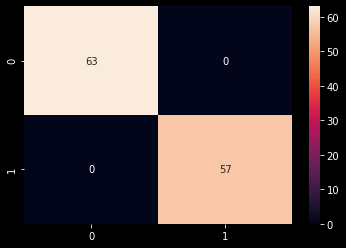

In [54]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import numpy

model = load_model('models/%s.h5' % (start_time))

y_pred = model.predict(x_val/255.)
y_pred_logical = (y_pred > 0.5).astype(np.int)

print ('test acc: %s' % accuracy_score(y_val, y_pred_logical))
cm = confusion_matrix(y_val, y_pred_logical)
sns.heatmap(cm, annot=True)



# Distribution of Prediction

C:\Users\USER\miniconda3\envs\healthcare\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


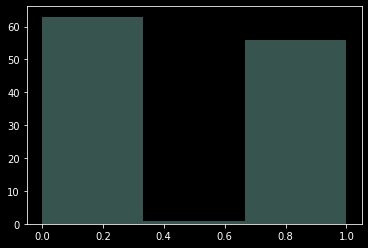

In [48]:
ax = sns.distplot(y_pred, kde=False)

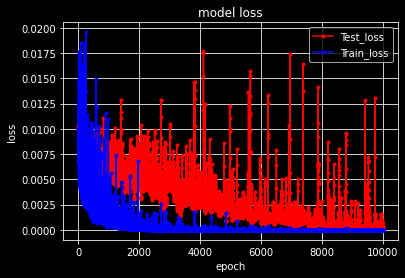

In [55]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import numpy


#테스트셋의 오차
y_vloss = history.history['val_loss']
#학습셋의 오차
y_loss = history.history['loss']
#그래프로 표현
x_len = numpy.arange(len(y_loss))
plt.title('model loss')
plt.plot(x_len,y_vloss,marker='.', c="red", label='Test_loss')
plt.plot(x_len,y_loss,marker='.', c="blue", label='Train_loss')
#그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

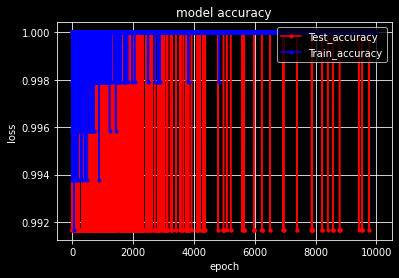

In [56]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import numpy


#테스트셋의 오차
y_vloss = history.history['val_acc']
#학습셋의 오차
y_loss = history.history['acc']
#그래프로 표현
x_len = numpy.arange(len(y_loss))
plt.title('model accuracy')
plt.plot(x_len,y_vloss,marker='.', c="red", label='Test_accuracy')
plt.plot(x_len,y_loss,marker='.', c="blue", label='Train_accuracy')
#그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()